In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tpot import TPOTRegressor
from lightgbm import LGBMRegressor

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [4]:
df_train.shape

(74051, 10)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [6]:
df_test = pd.read_csv("test.csv")
df_test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [7]:
df_test.shape

(49368, 9)

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49368 entries, 0 to 49367
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              49368 non-null  int64  
 1   Sex             49368 non-null  object 
 2   Length          49368 non-null  float64
 3   Diameter        49368 non-null  float64
 4   Height          49368 non-null  float64
 5   Weight          49368 non-null  float64
 6   Shucked Weight  49368 non-null  float64
 7   Viscera Weight  49368 non-null  float64
 8   Shell Weight    49368 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.4+ MB


In [9]:
df_train.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [10]:
df_train.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [11]:
df_train.describe(include='object')

,Sex
count,74051
unique,3
top,M
freq,27084


In [12]:
df_train['Sex'].value_counts()

Sex
M    27084
I    23957
F    23010
Name: count, dtype: int64

In [13]:
numCols = df_train.select_dtypes([np.number]).columns.drop(["Age","id"])
numCols

Index(['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight'],
      dtype='object')

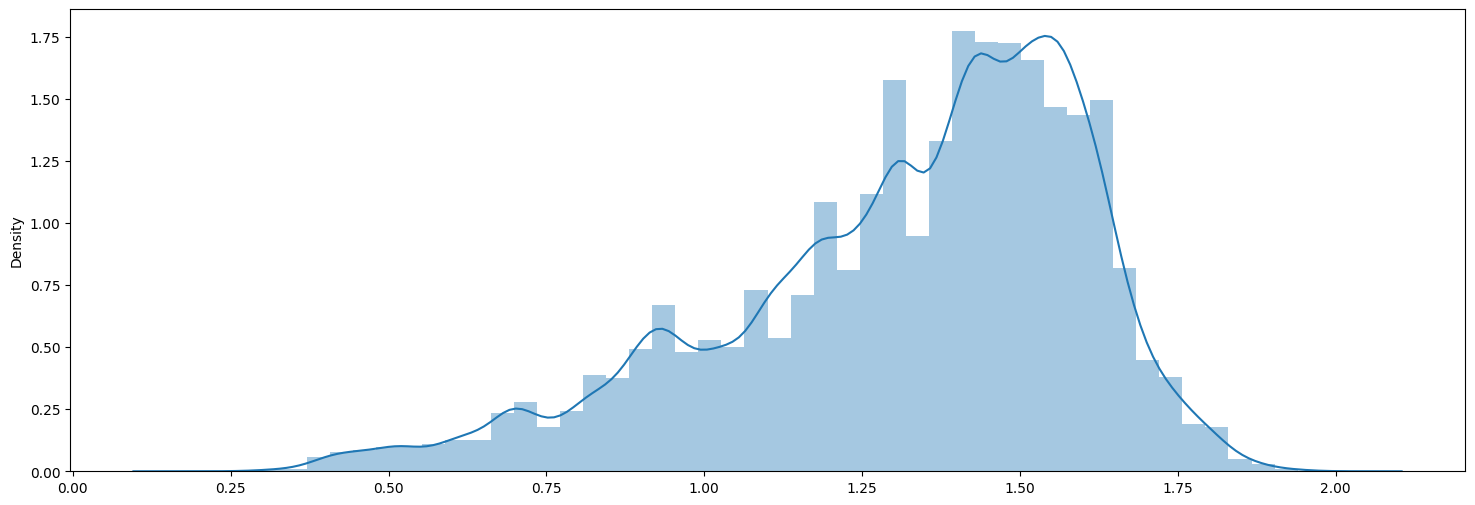

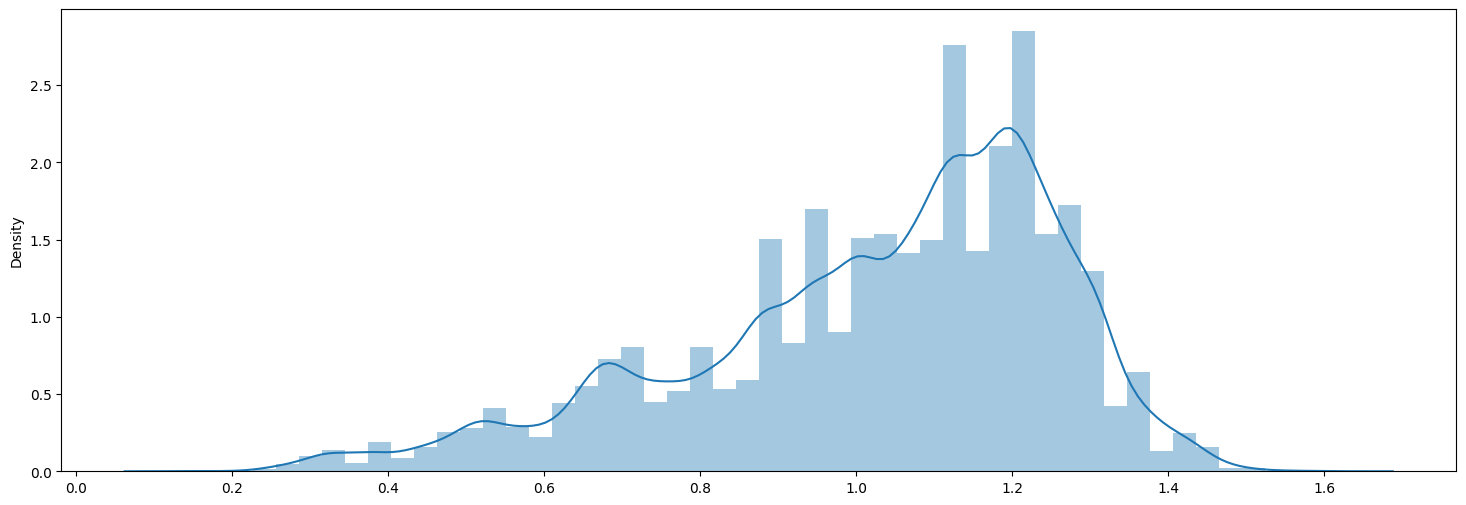

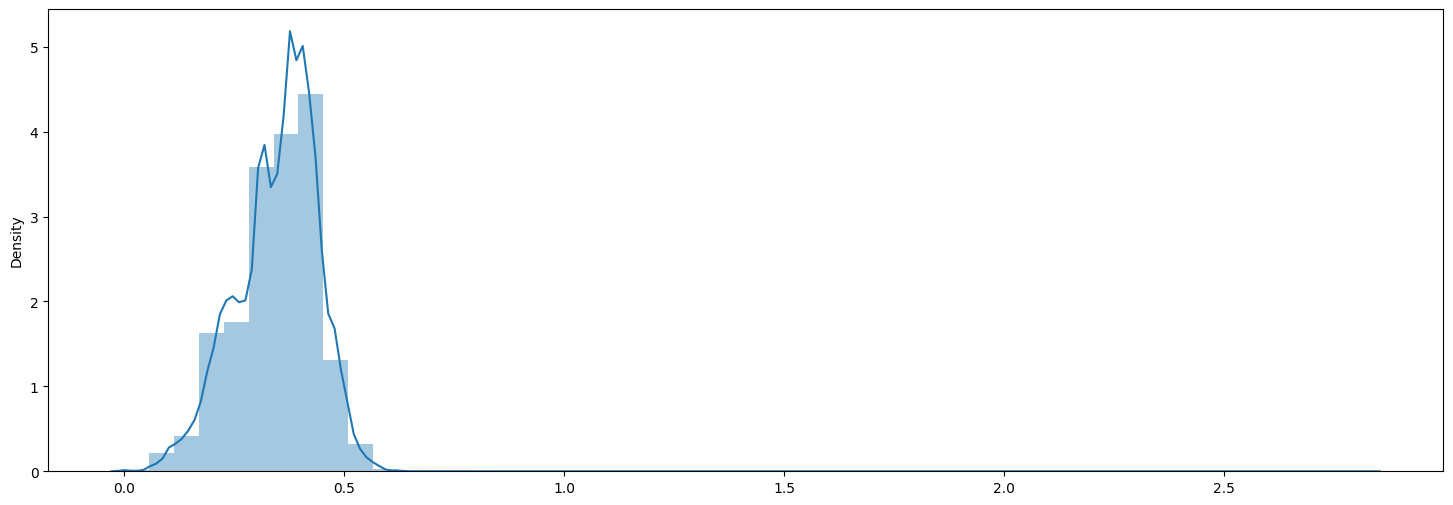

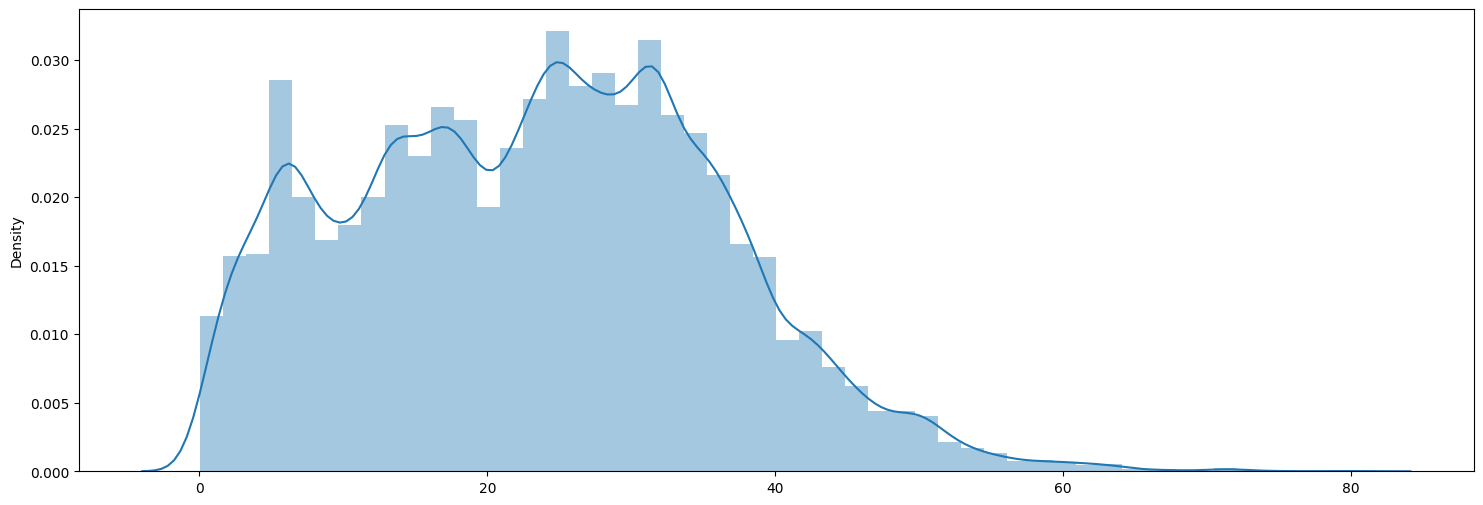

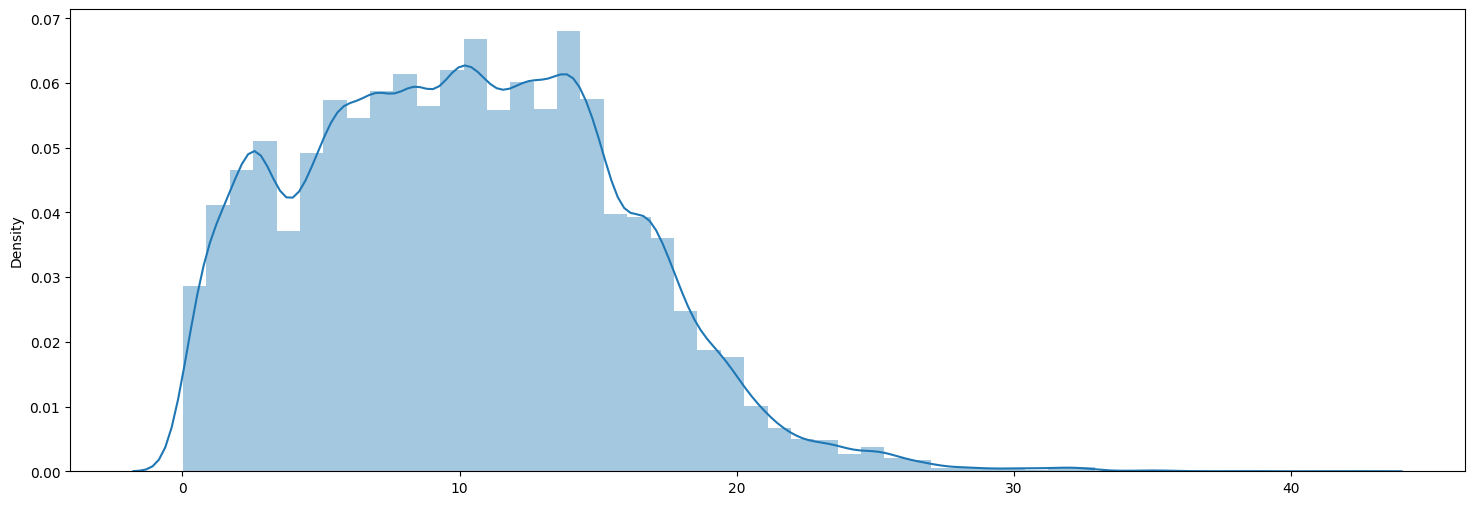

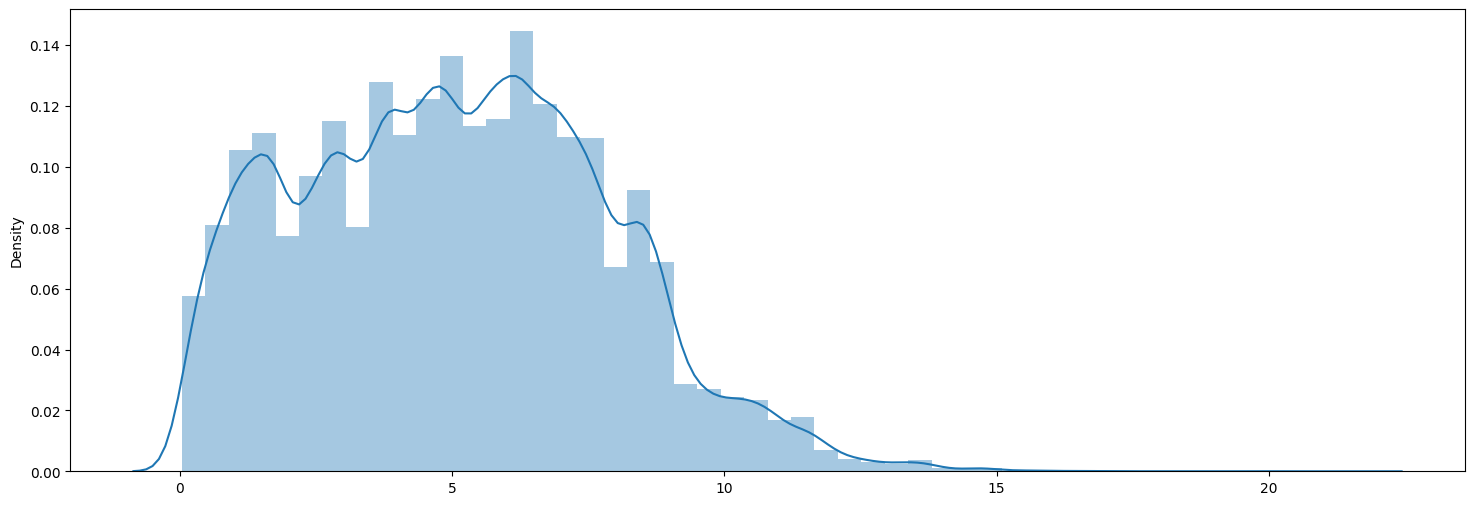

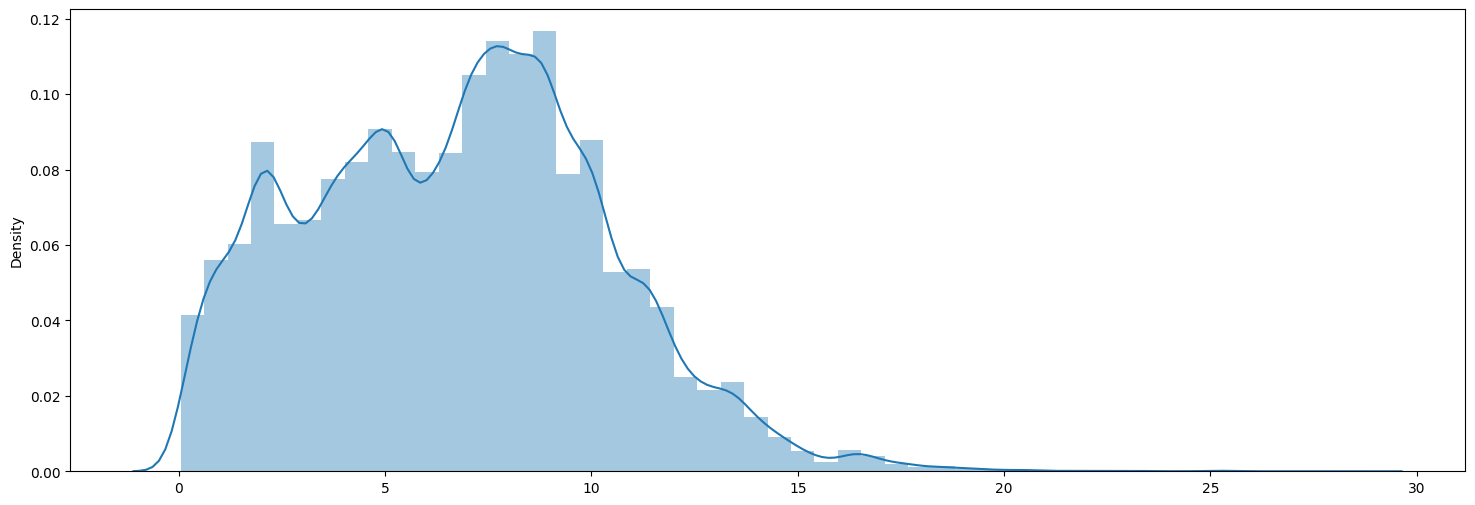

In [14]:
for col in numCols:
    plt.figure(figsize=(18,6))
    sns.distplot(x=df_train[col])
    plt.show()

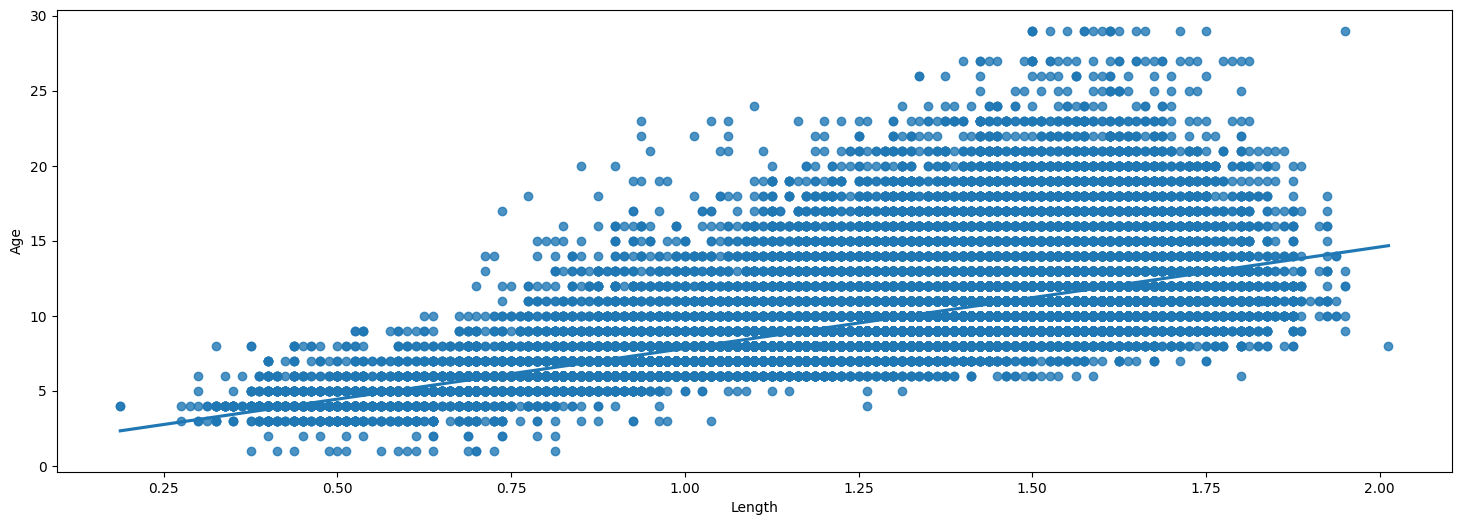

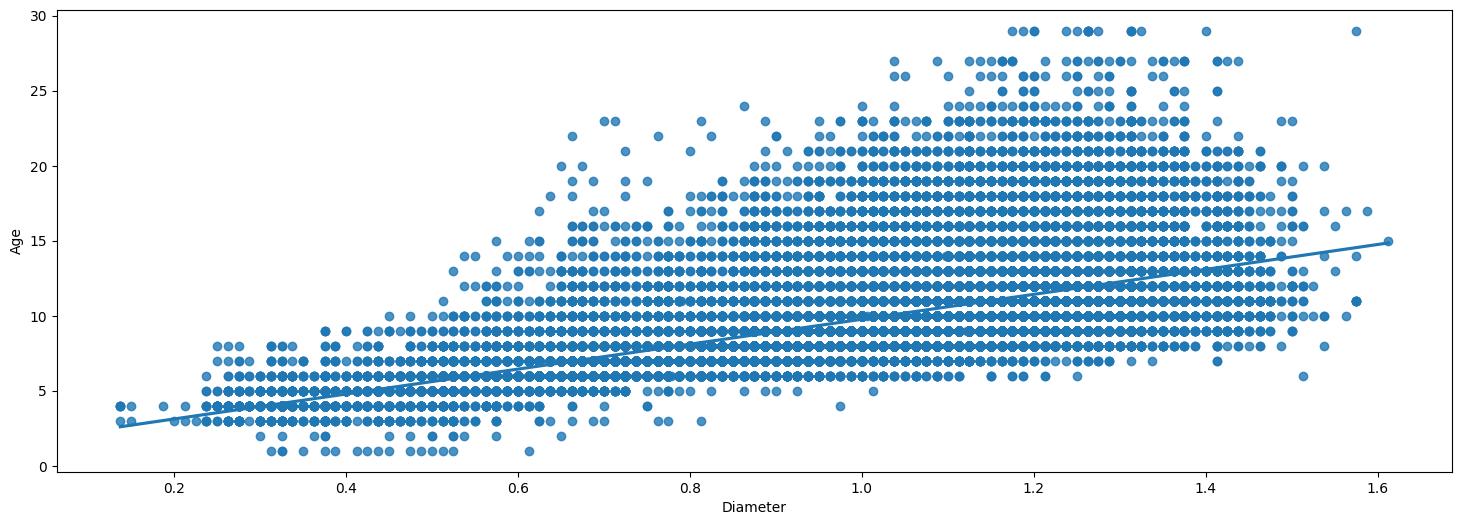

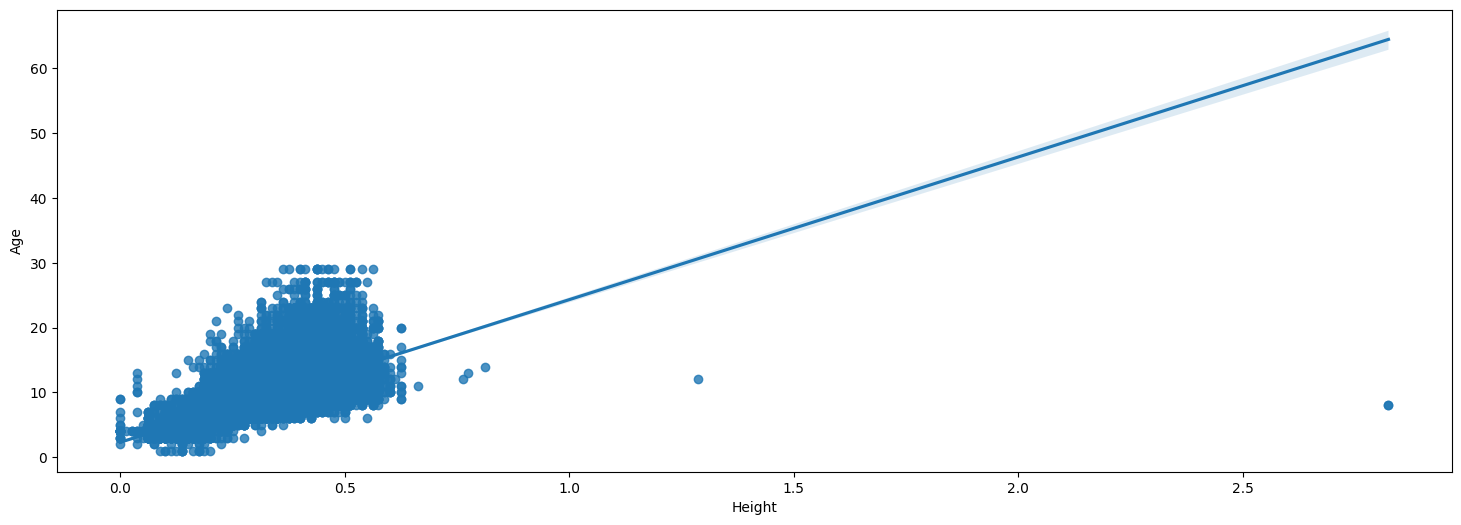

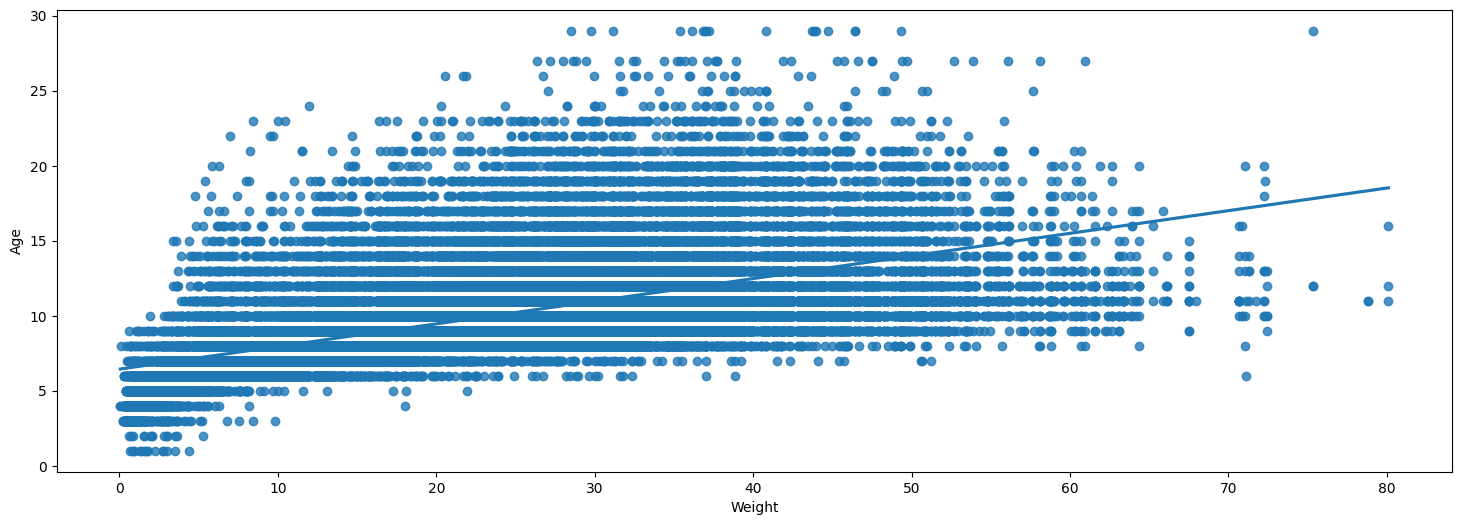

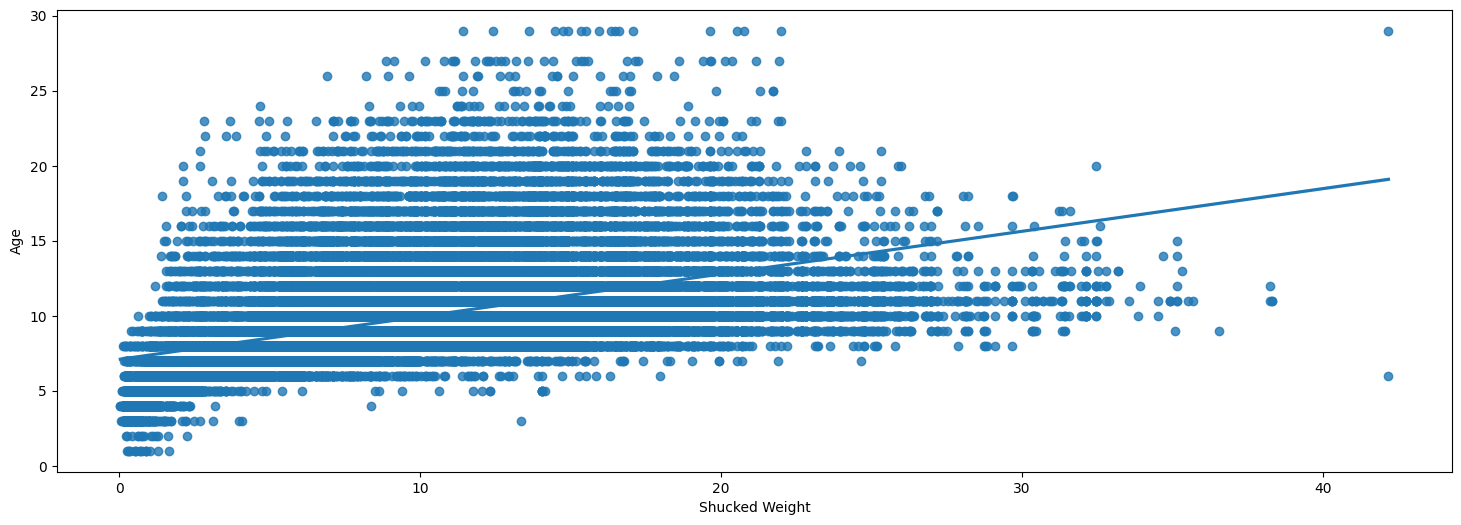

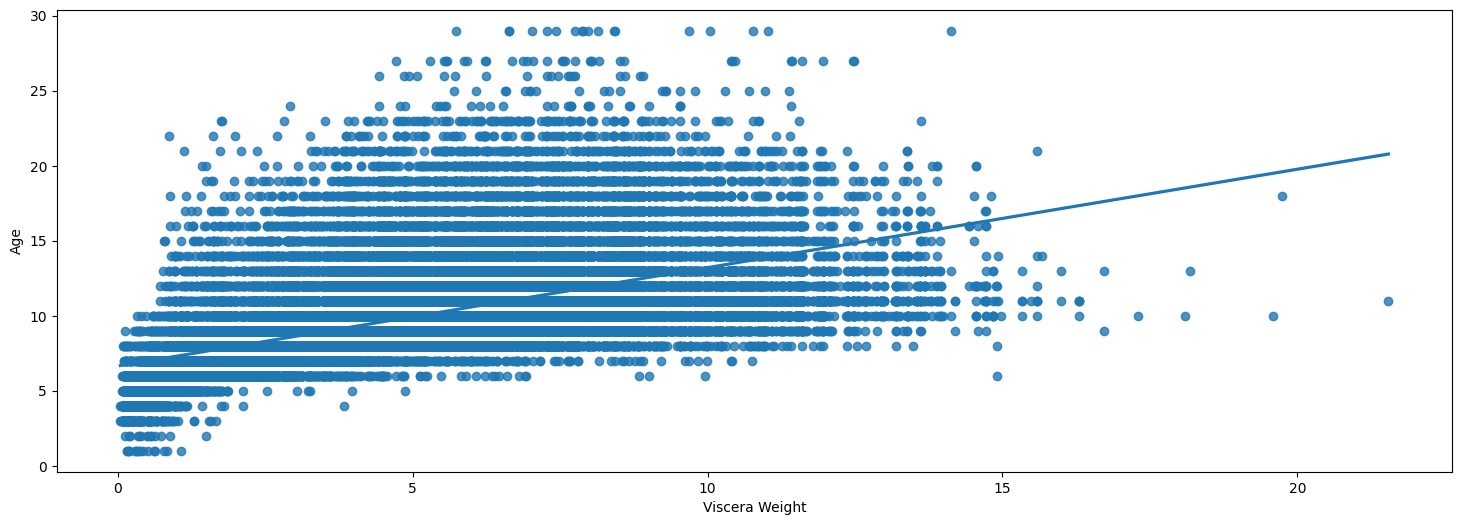

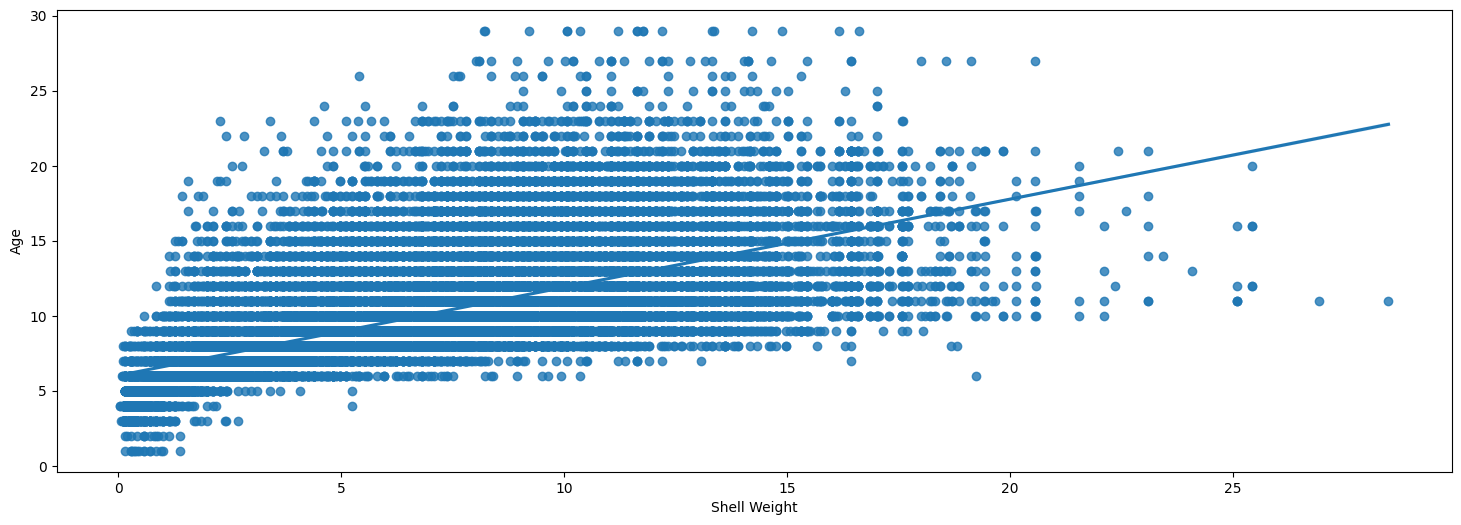

In [15]:
for col in numCols:
    plt.figure(figsize=(18,6))
    sns.regplot(x=col, y="Age", data=df_train)
    plt.show()

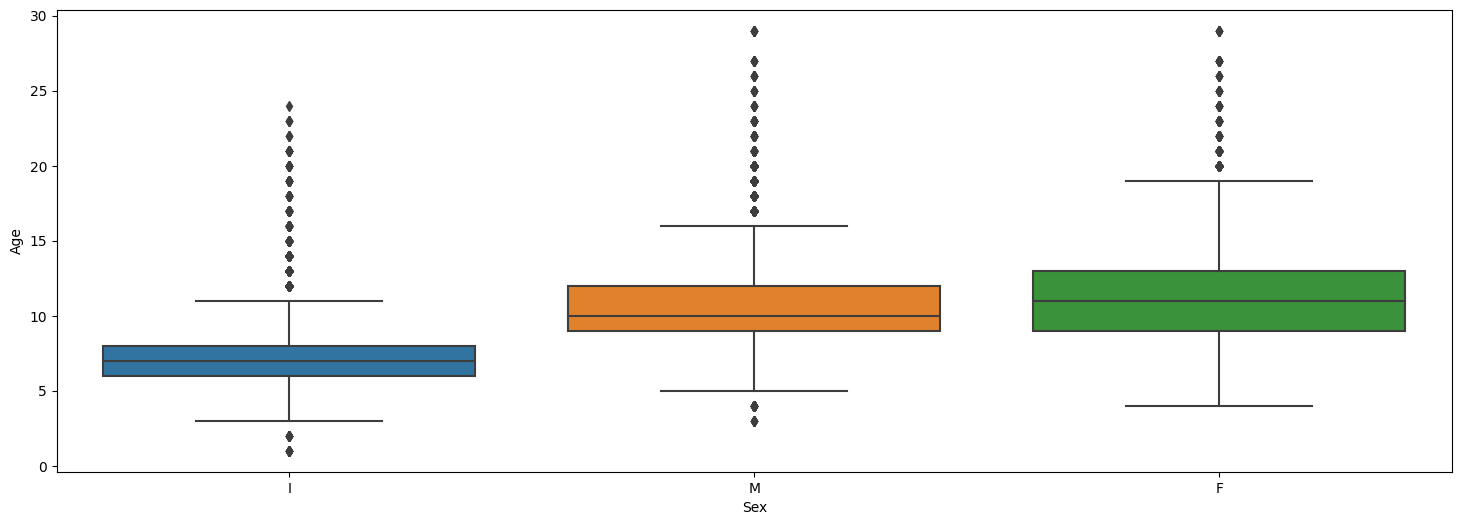

In [16]:
plt.figure(figsize=(18,6))
sns.boxplot(x='Sex', y="Age", data=df_train)
plt.show()

In [17]:
train = df_train.copy()
test = df_test.copy()

In [18]:
print(pd.__version__)

2.0.1


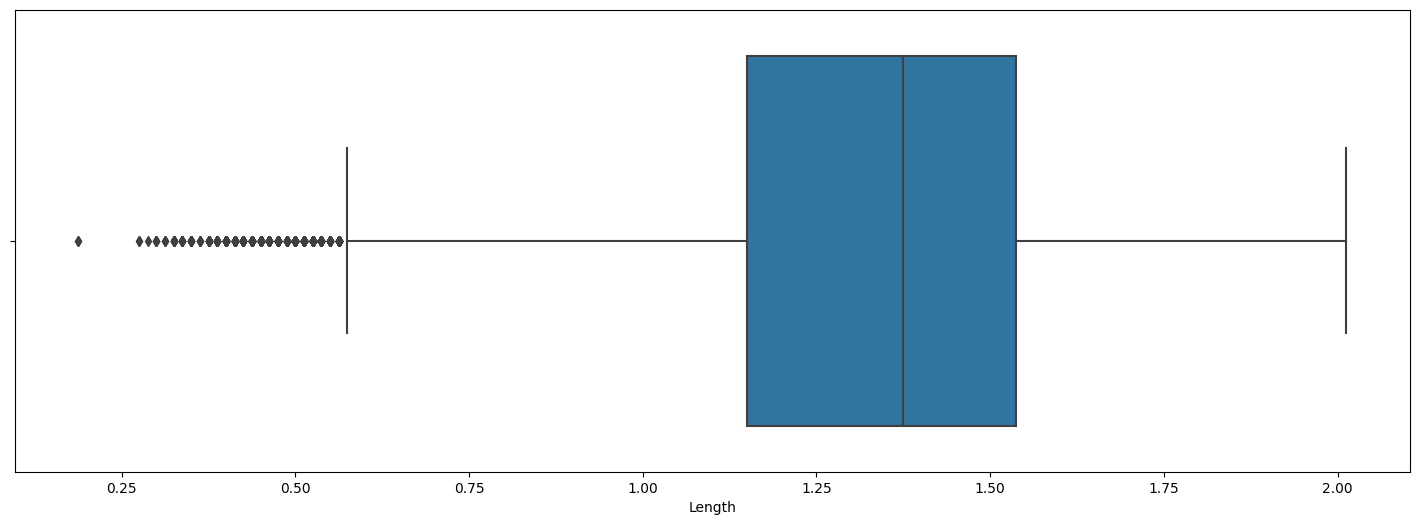

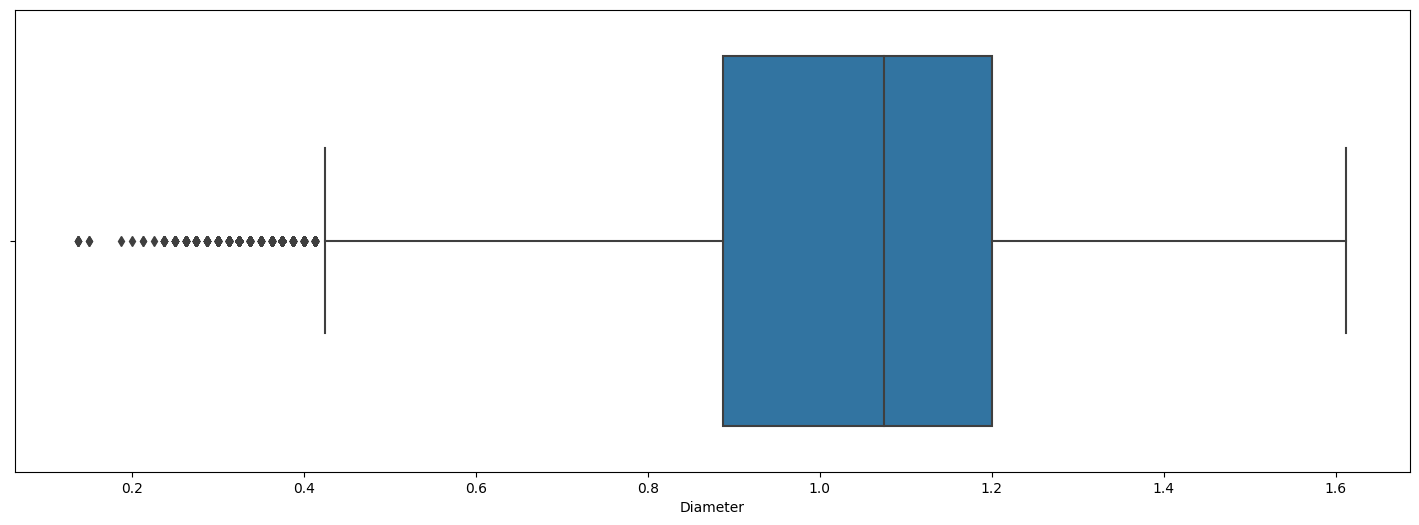

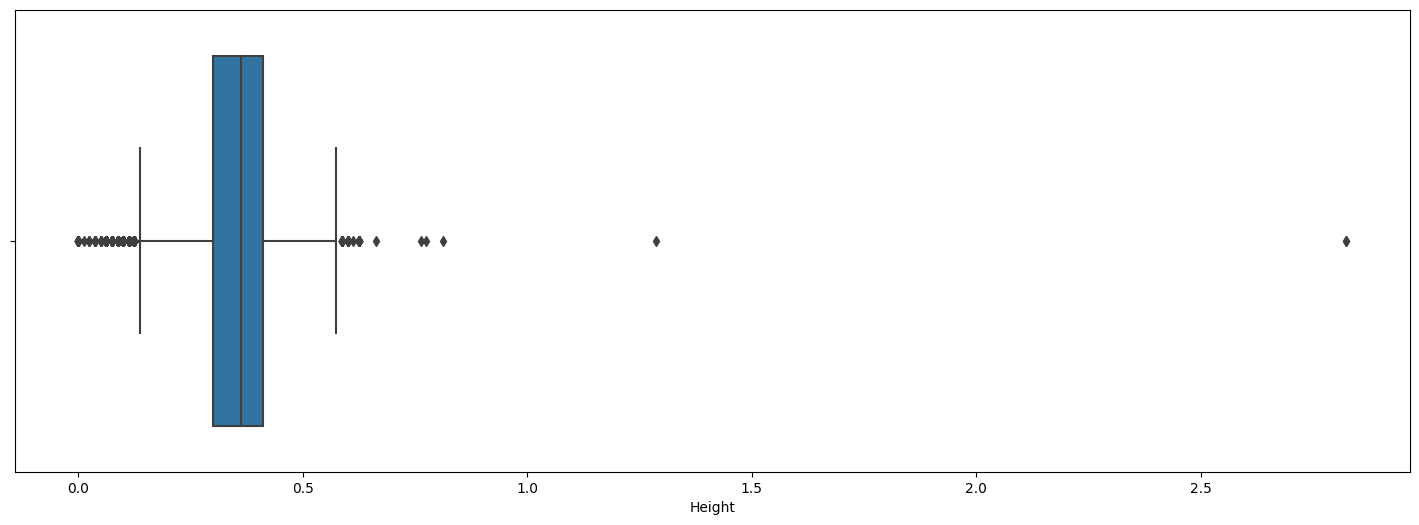

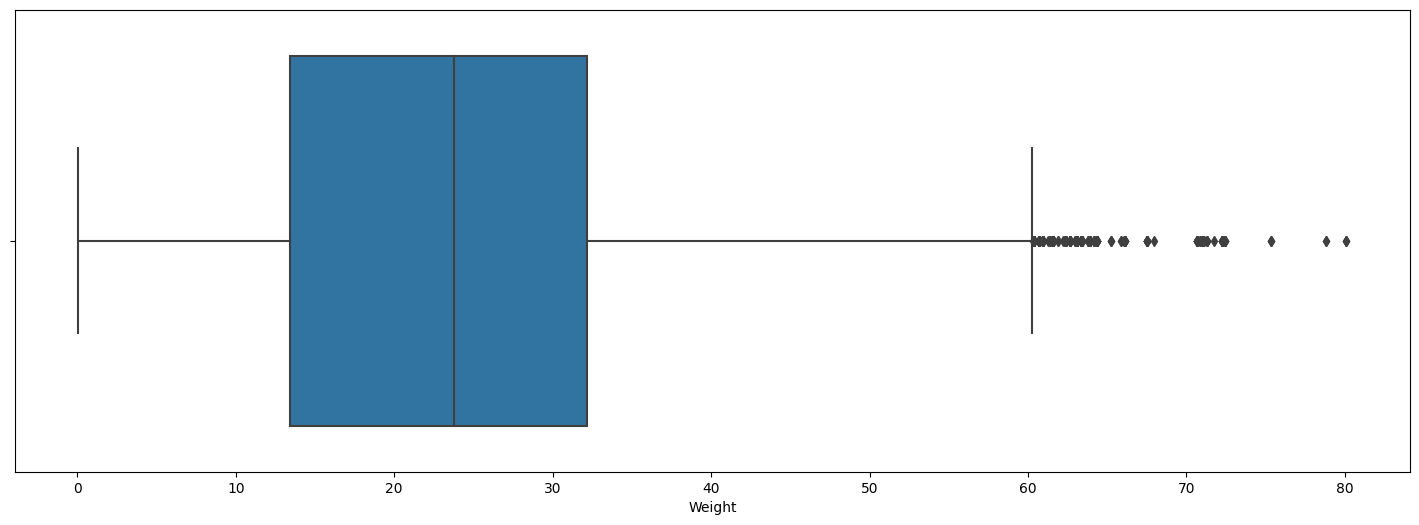

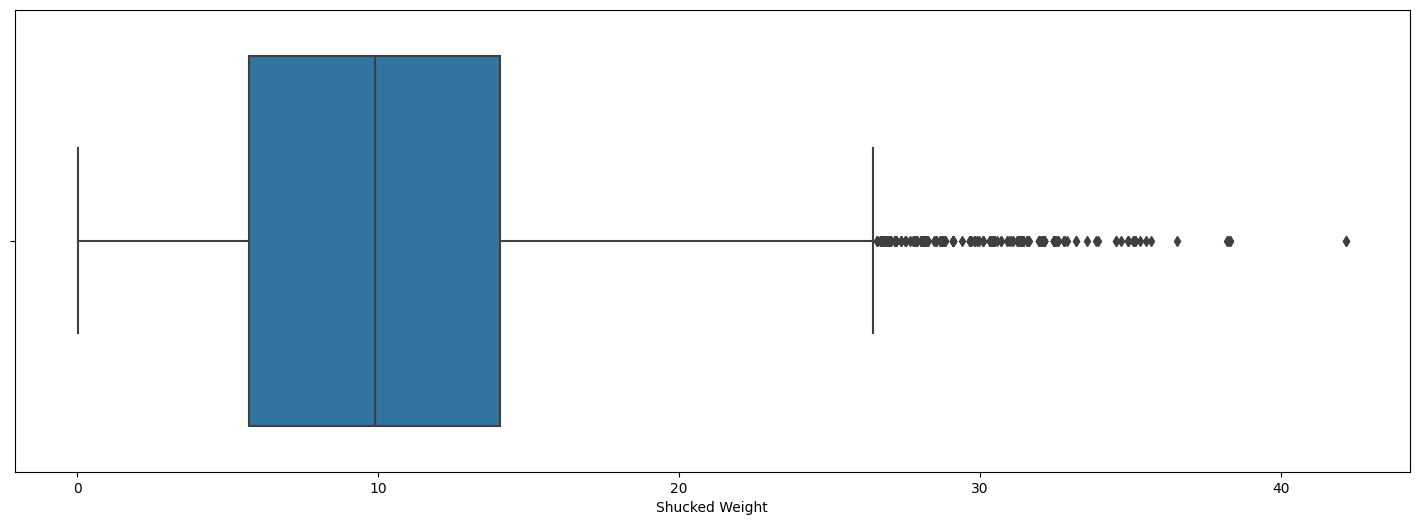

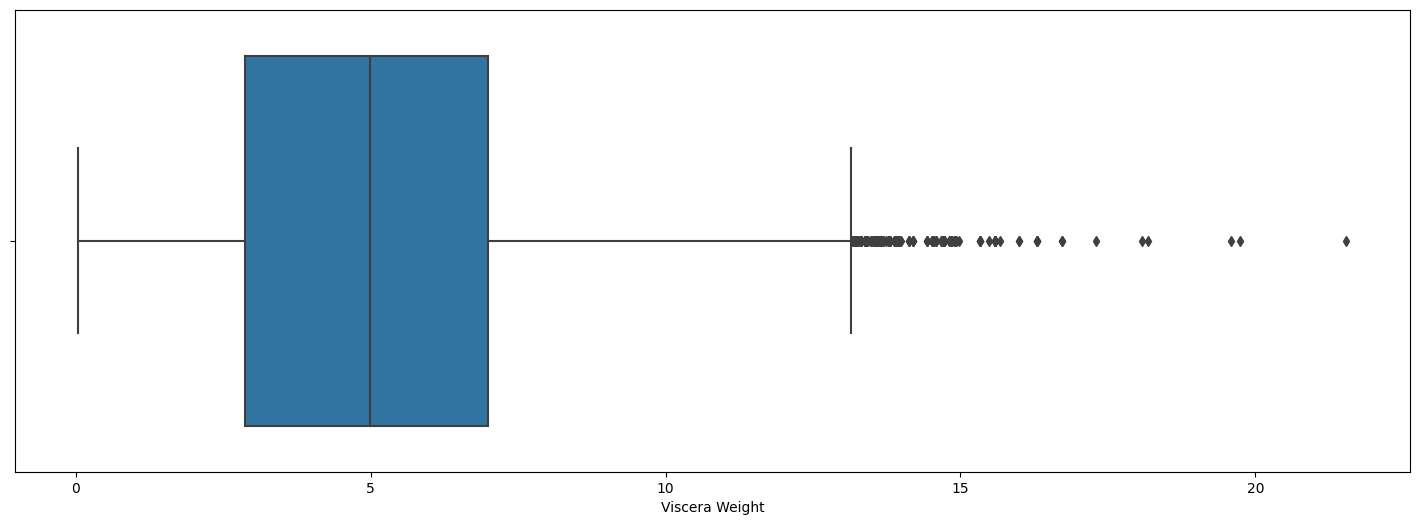

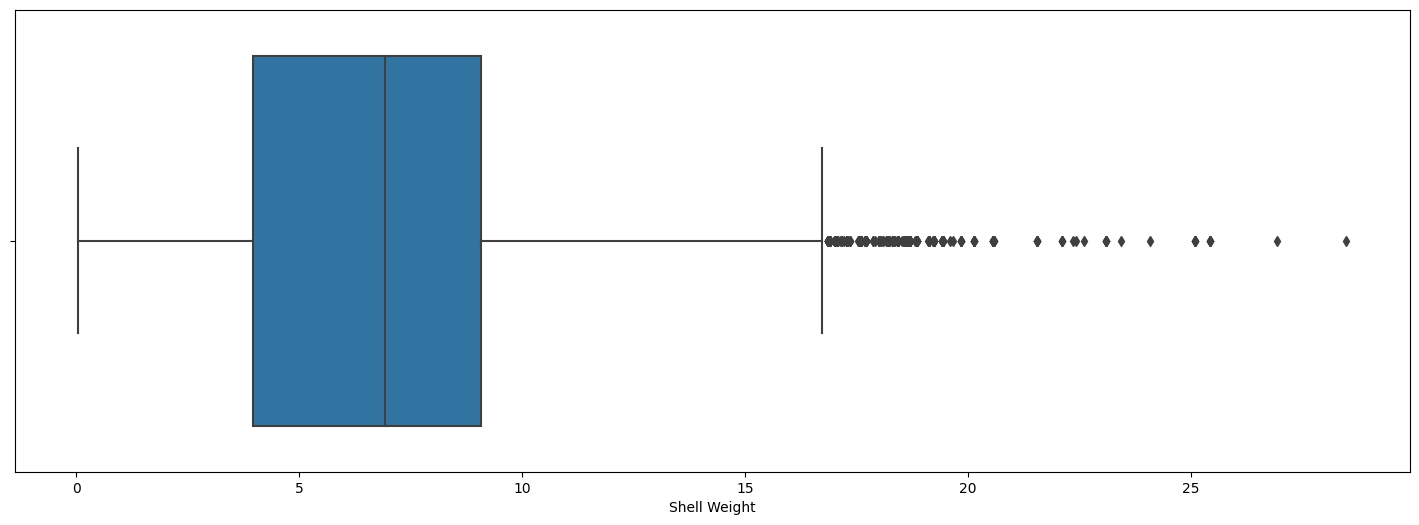

In [19]:
for col in numCols:
    plt.figure(figsize=(18,6))
    sns.boxplot(x=col, data=train)
    plt.show()

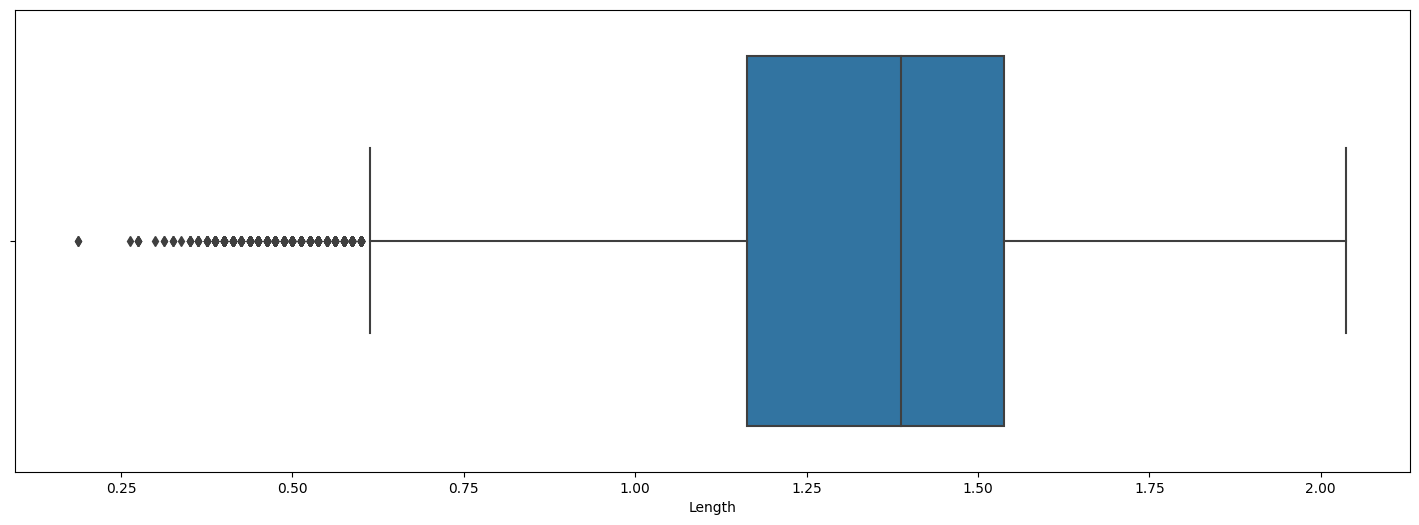

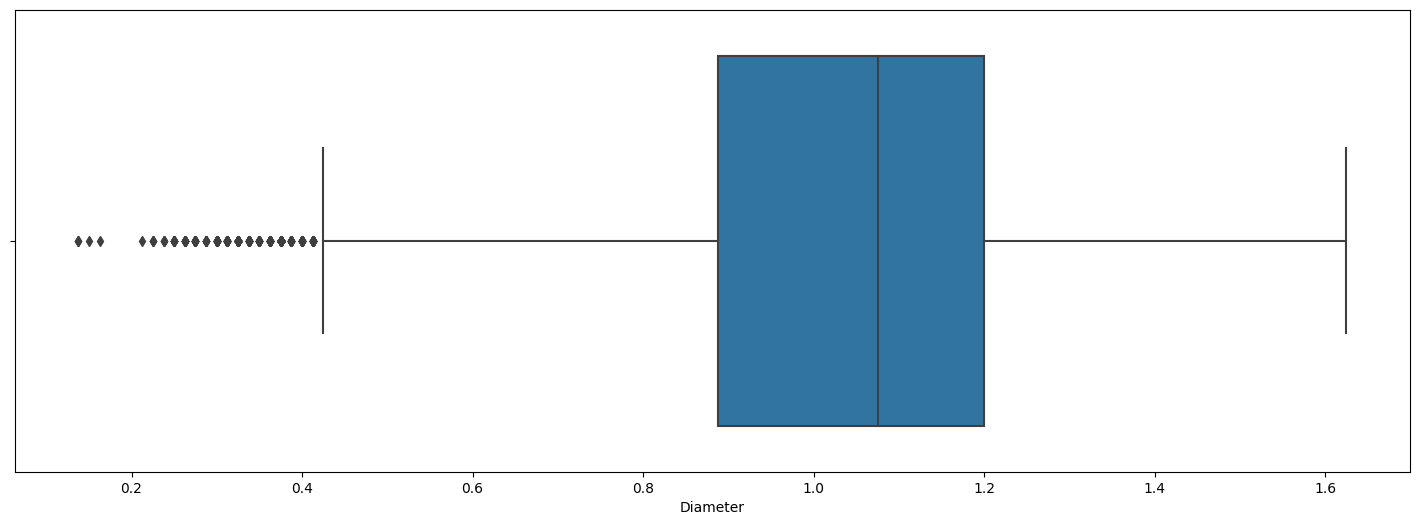

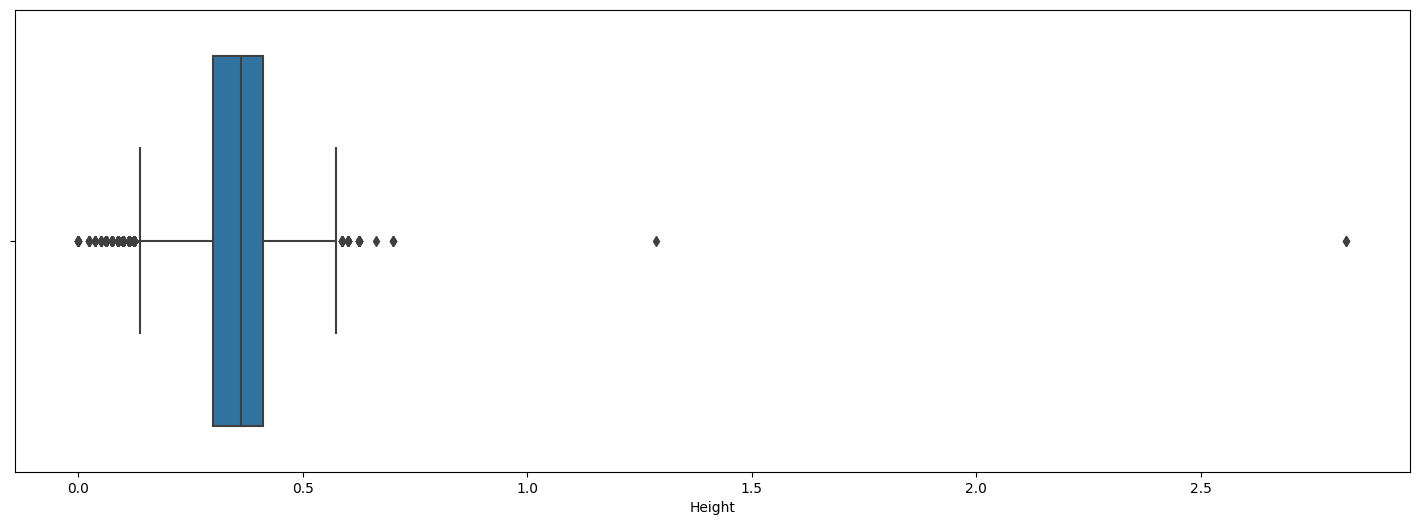

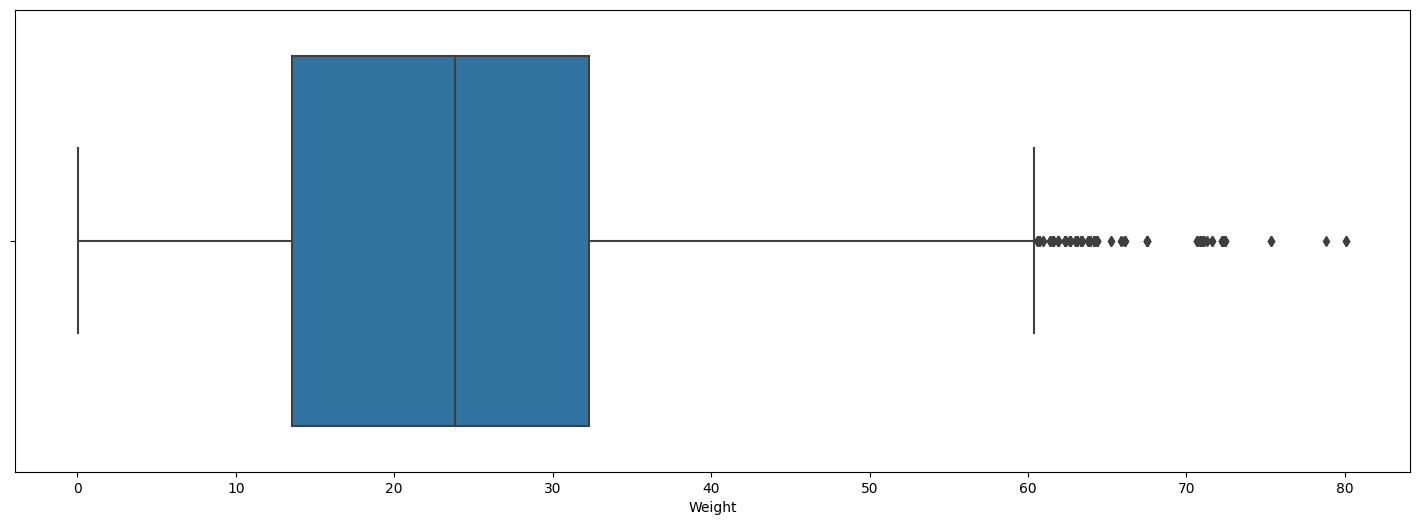

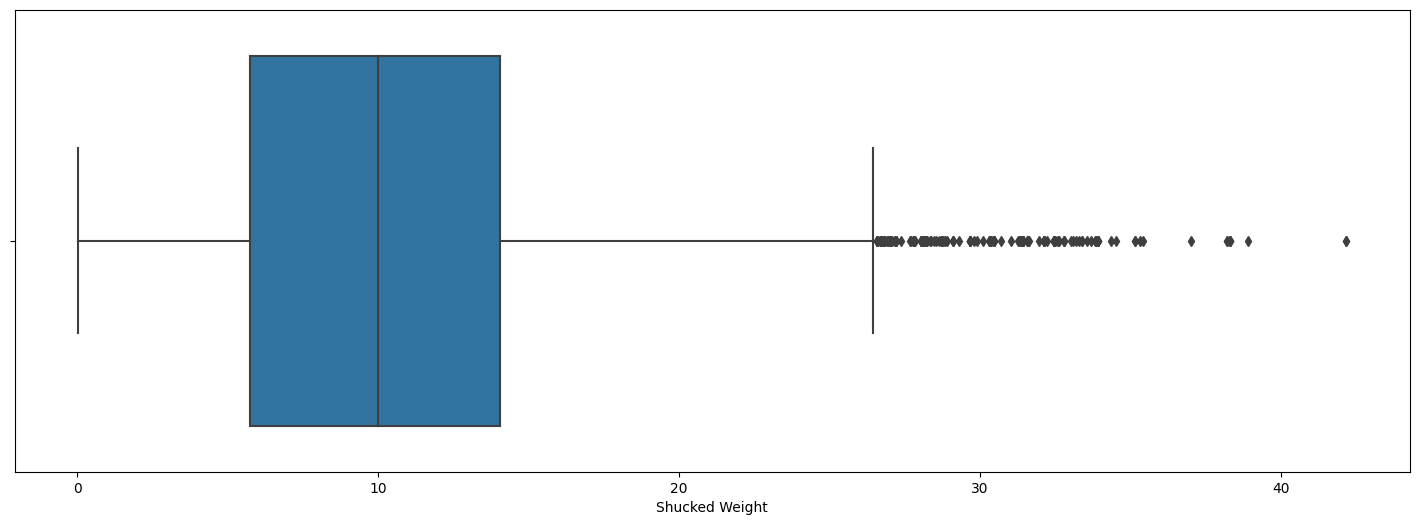

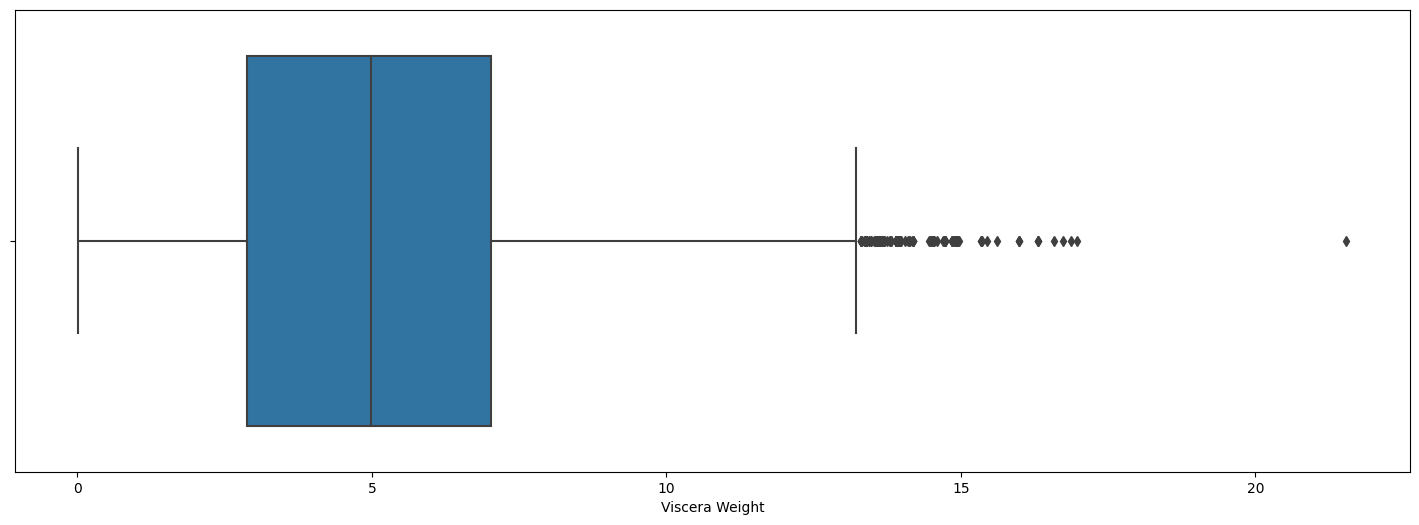

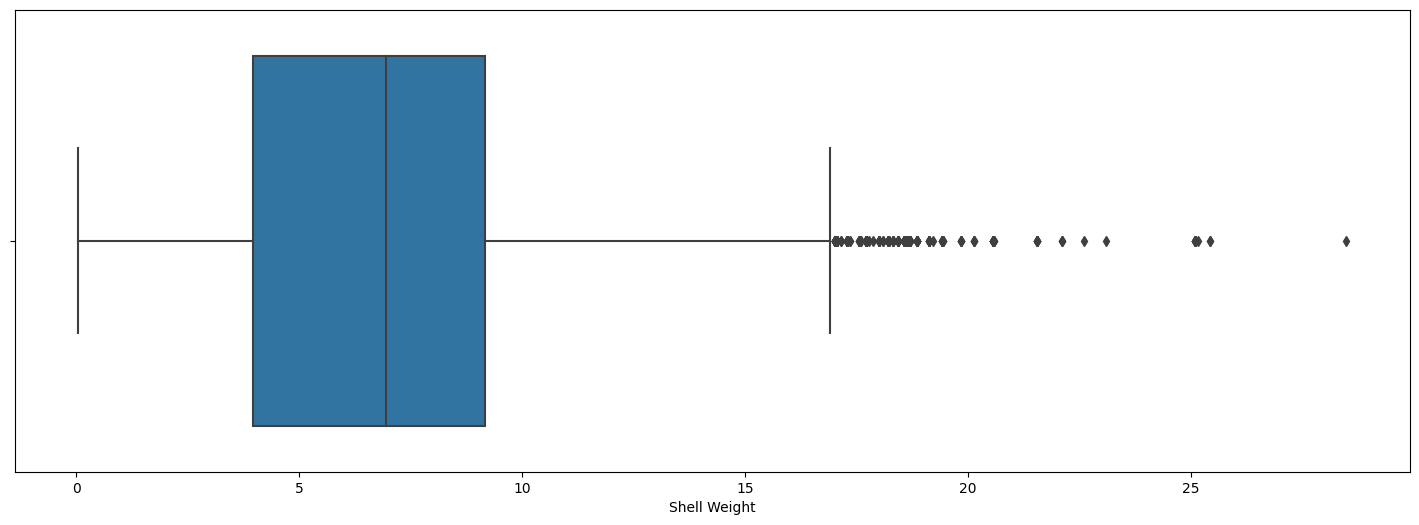

In [20]:
for col in numCols:
    plt.figure(figsize=(18,6))
    sns.boxplot(x=col, data=test)
    plt.show()

In [21]:
def clean_data(data,col='column_name'):
    
    '''Takes a Dataframe column and remove outliers by replacing the outliers greater than maximum 
    with the maximum and outliers lower than the minimum with the minimum
    
    
        Parameters:
            data (2d array): Pandas Dataframe column
    
            col (str) : The Dataframe Column name
    
        Returns:
            Cleaned column: Description of return value
    
    '''
    
    import numpy as np
    import pandas as pd
    import seaborn as sns
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)

    iqr = q3 - q1

    min = q1 - 1.5*(iqr)
    max = q3 + 1.5*(iqr)
    
    for i in data.index:
        if data.loc[i, col] > max:
            data.loc[i, col] = max
        if data.loc[i, col] < min:
            data.loc[i, col] = min
    plt.figure(figsize=(20, 15))        
    sns.boxplot(data[col],orient='v')
    plt.title(f'Cleaned {col} column')
    plt.show()

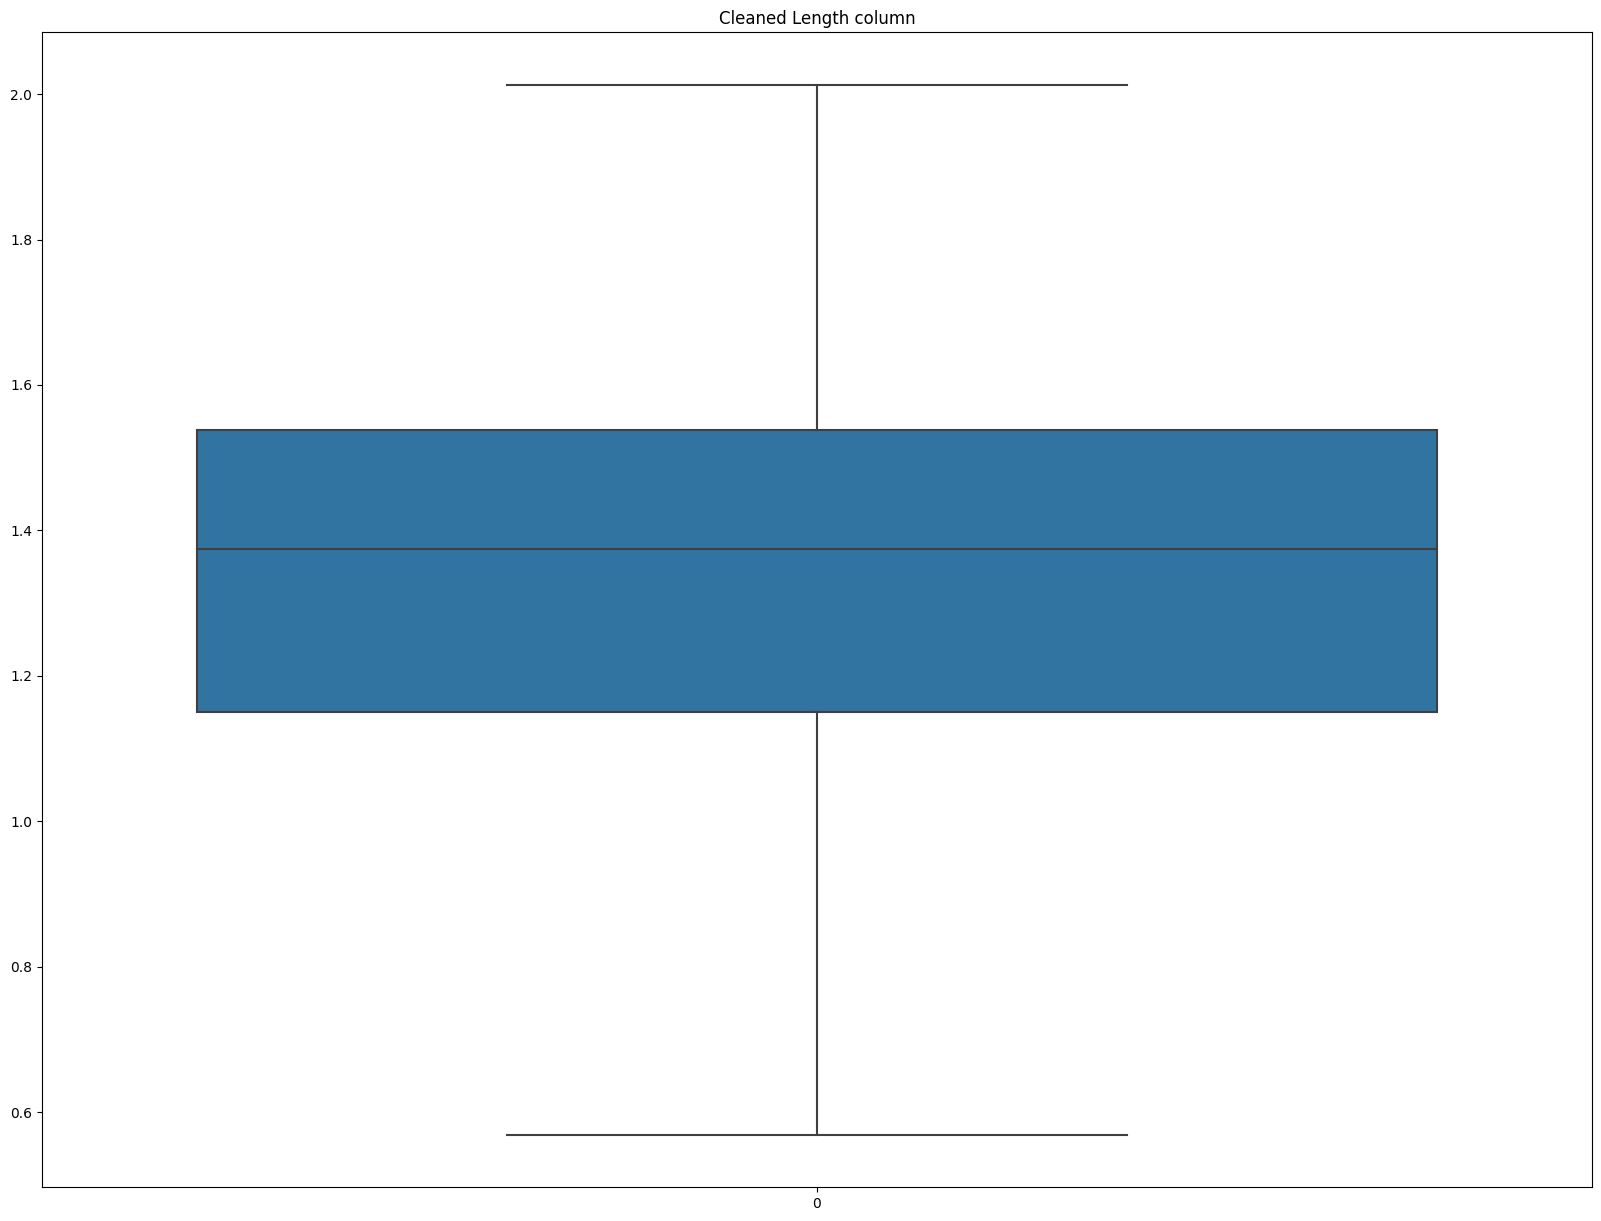

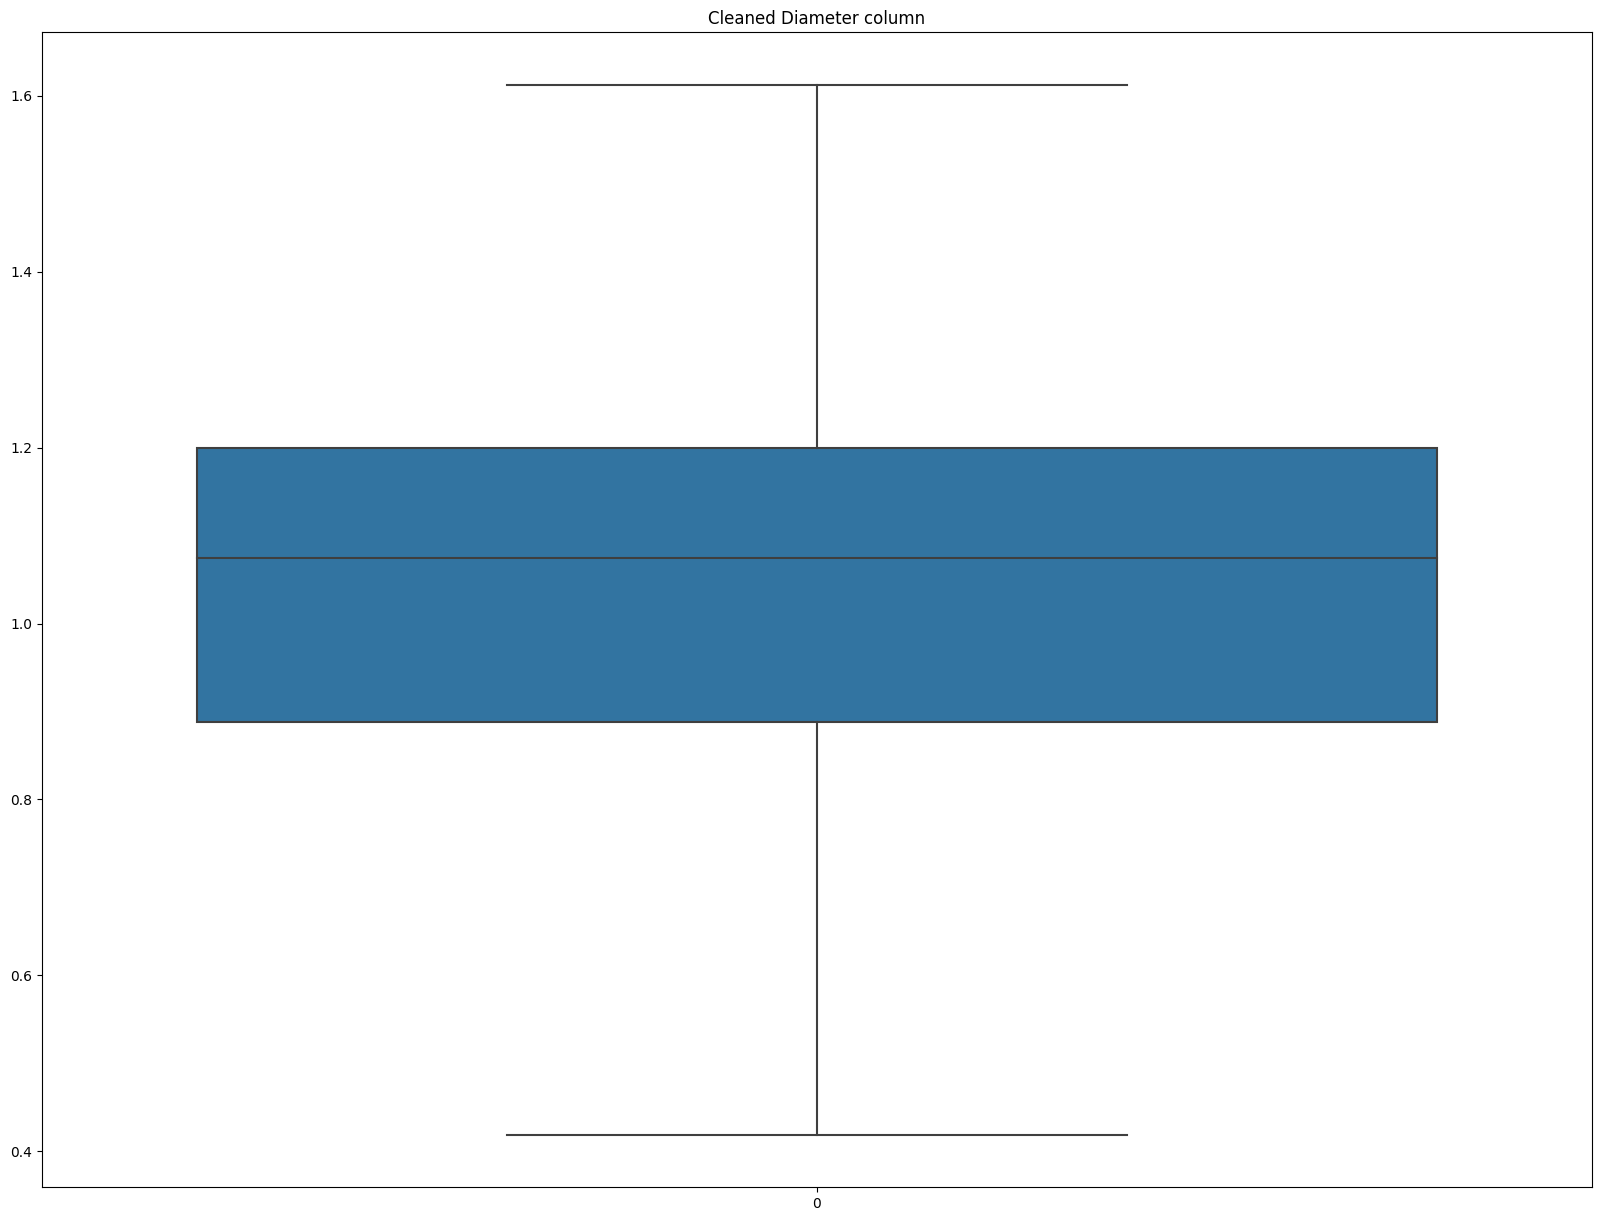

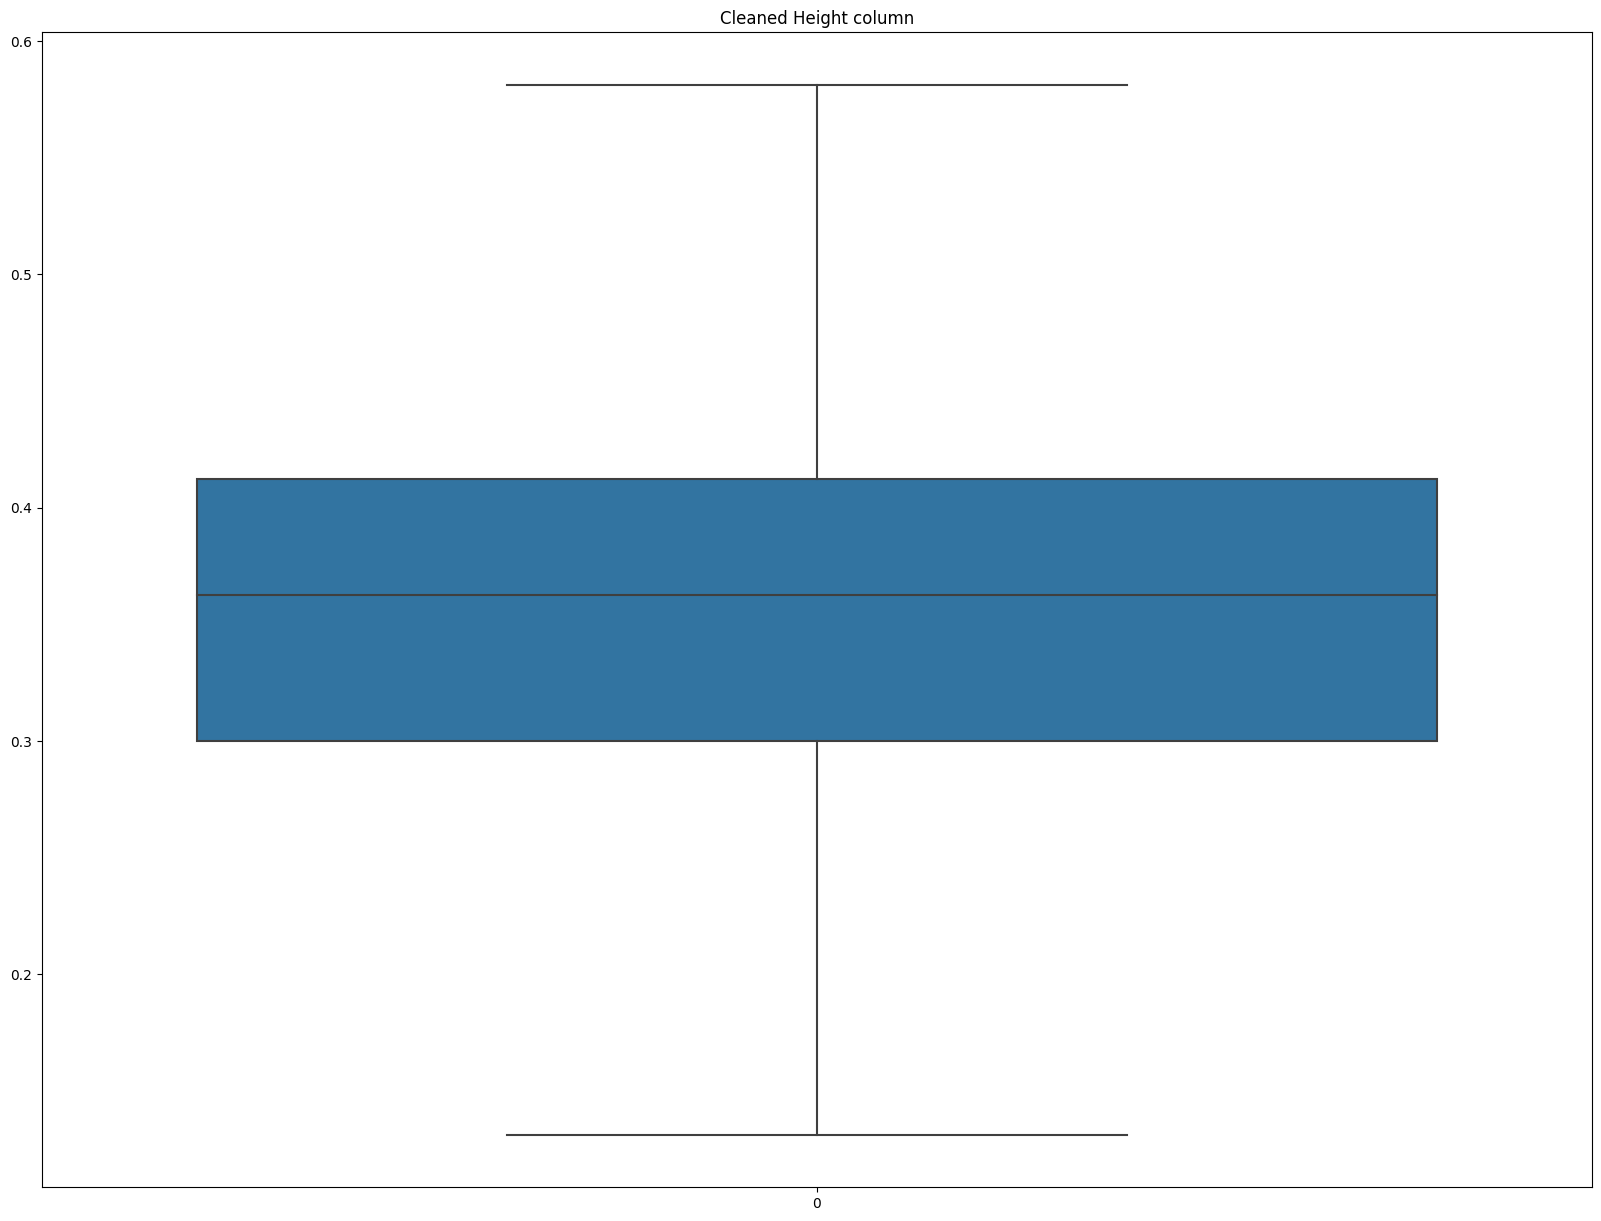

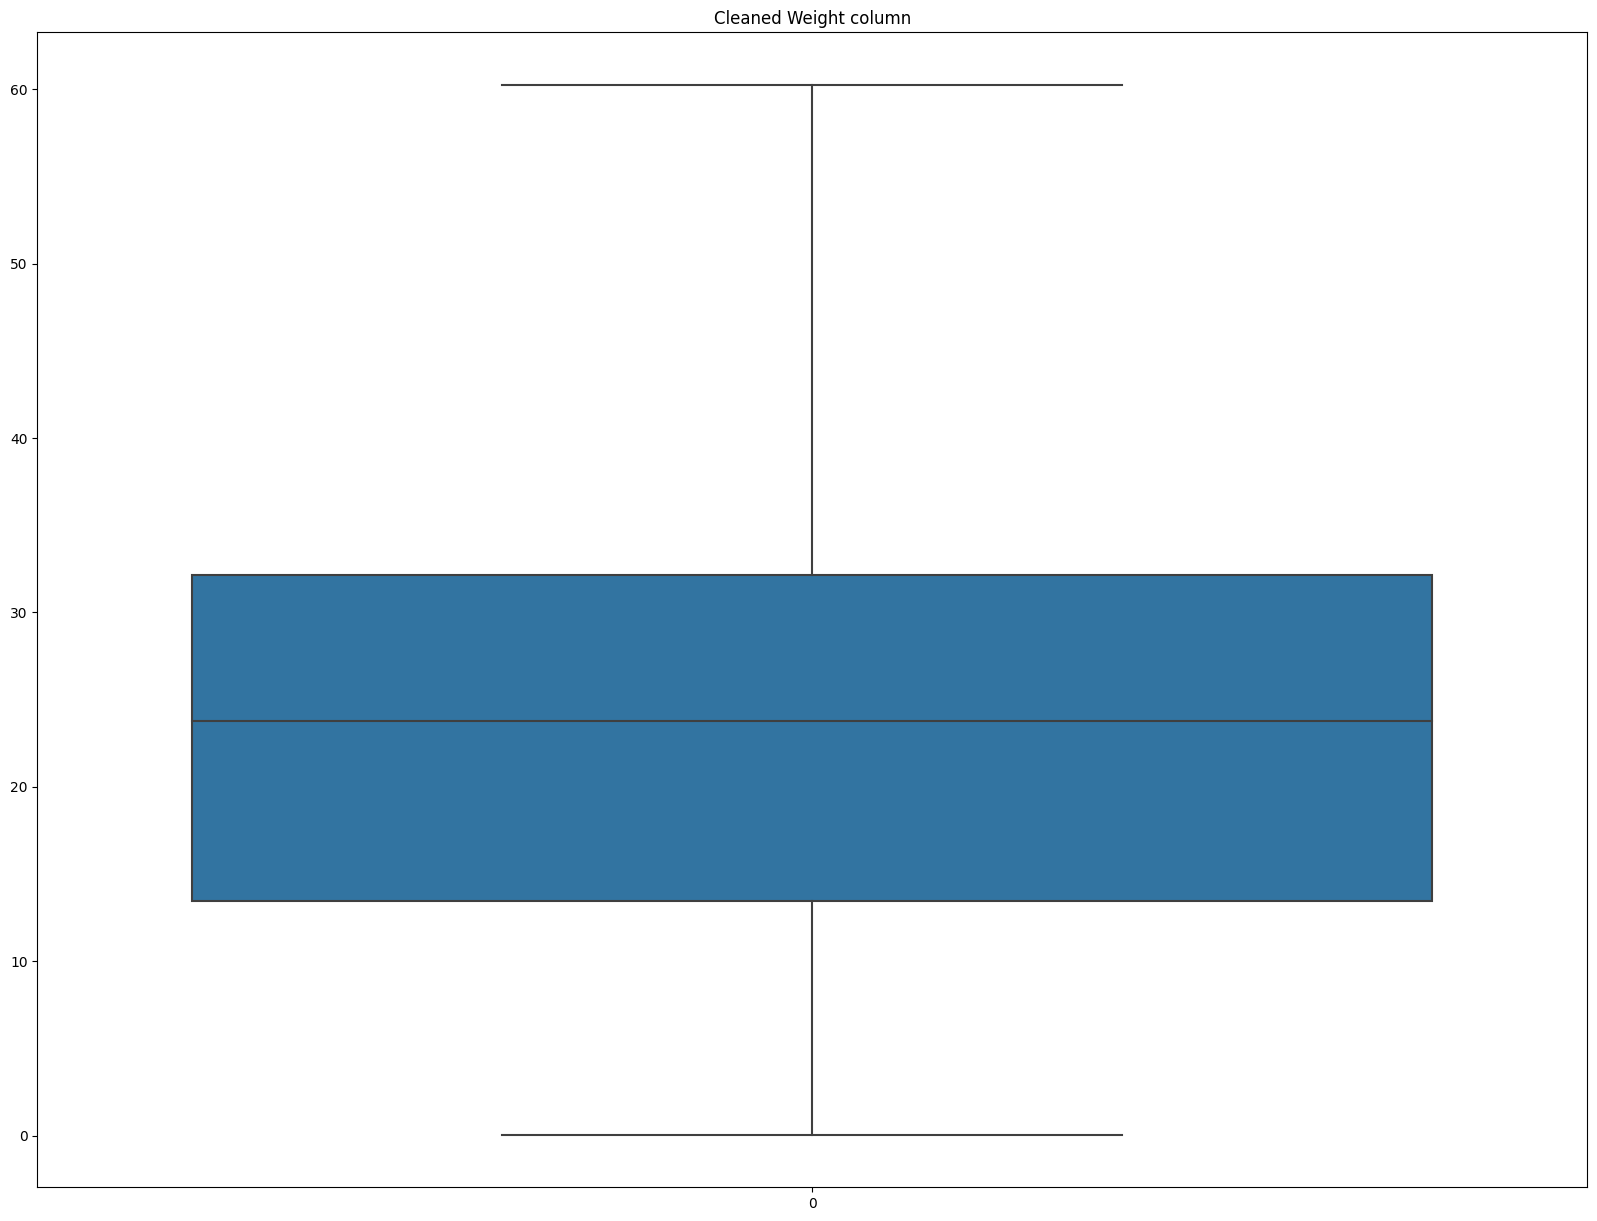

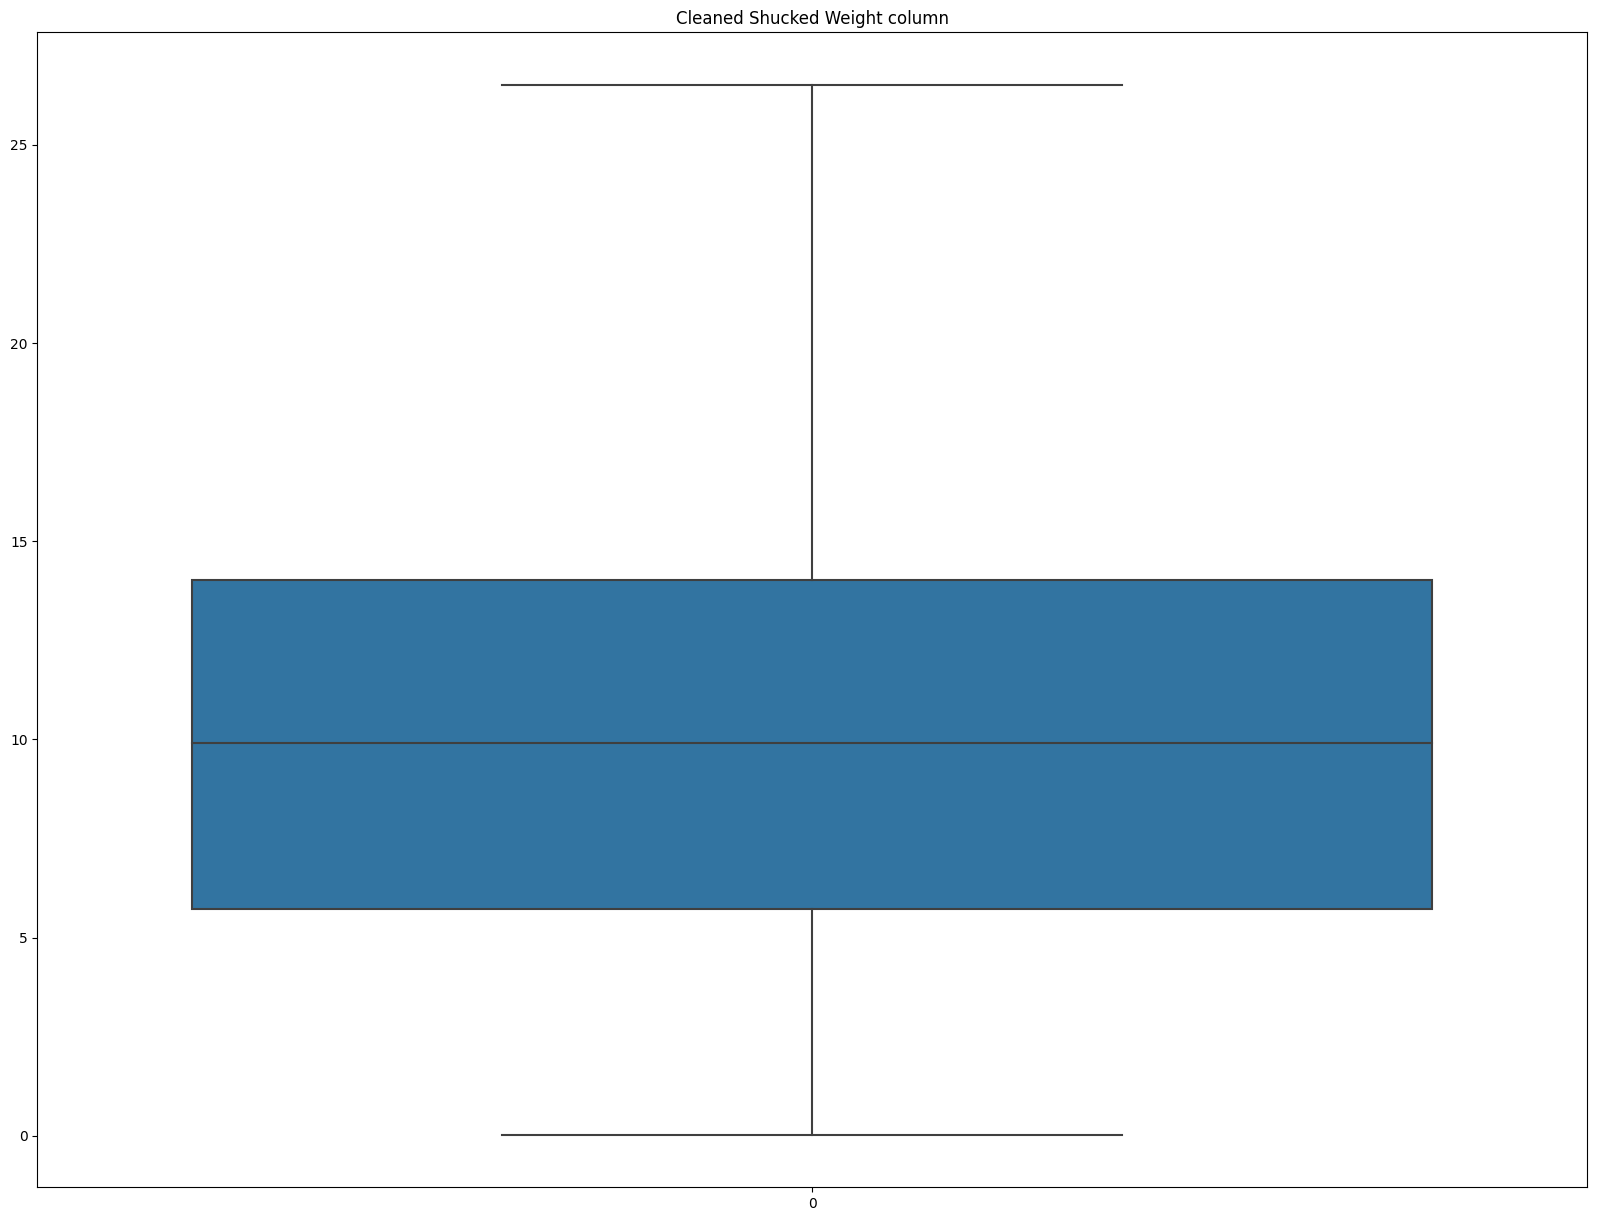

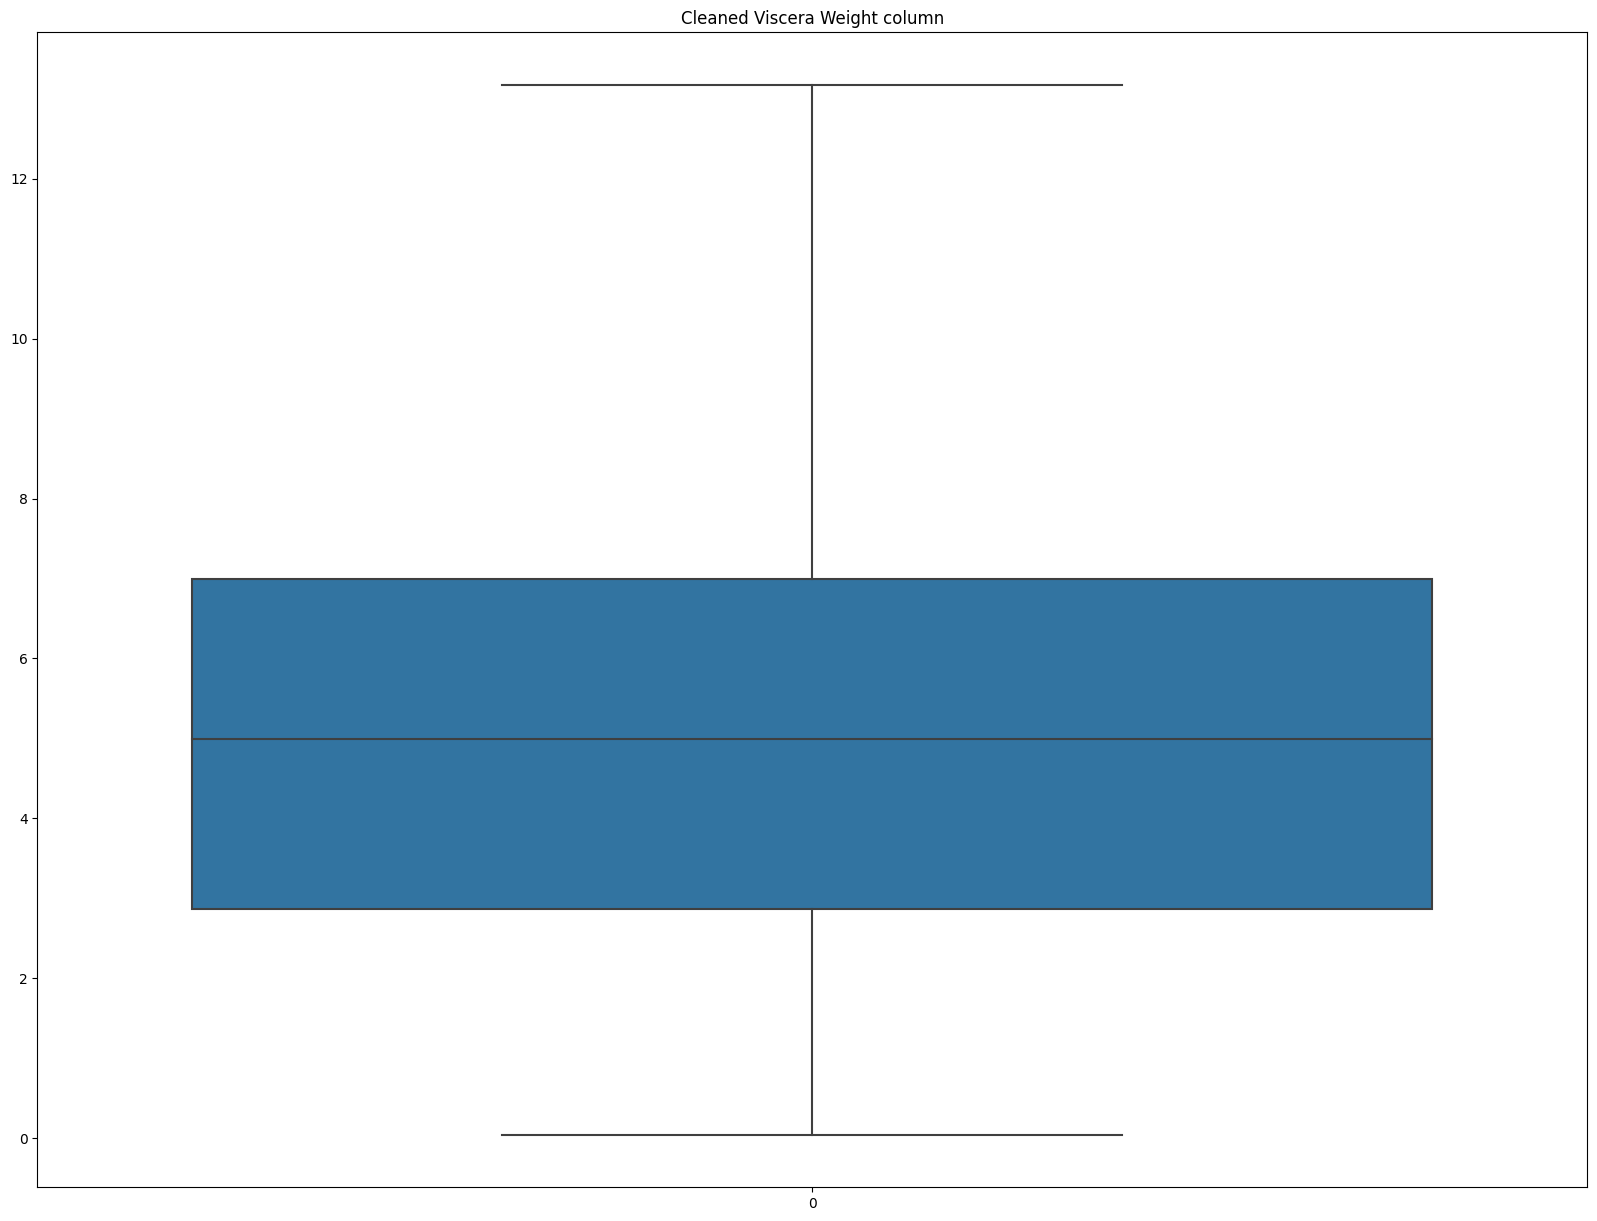

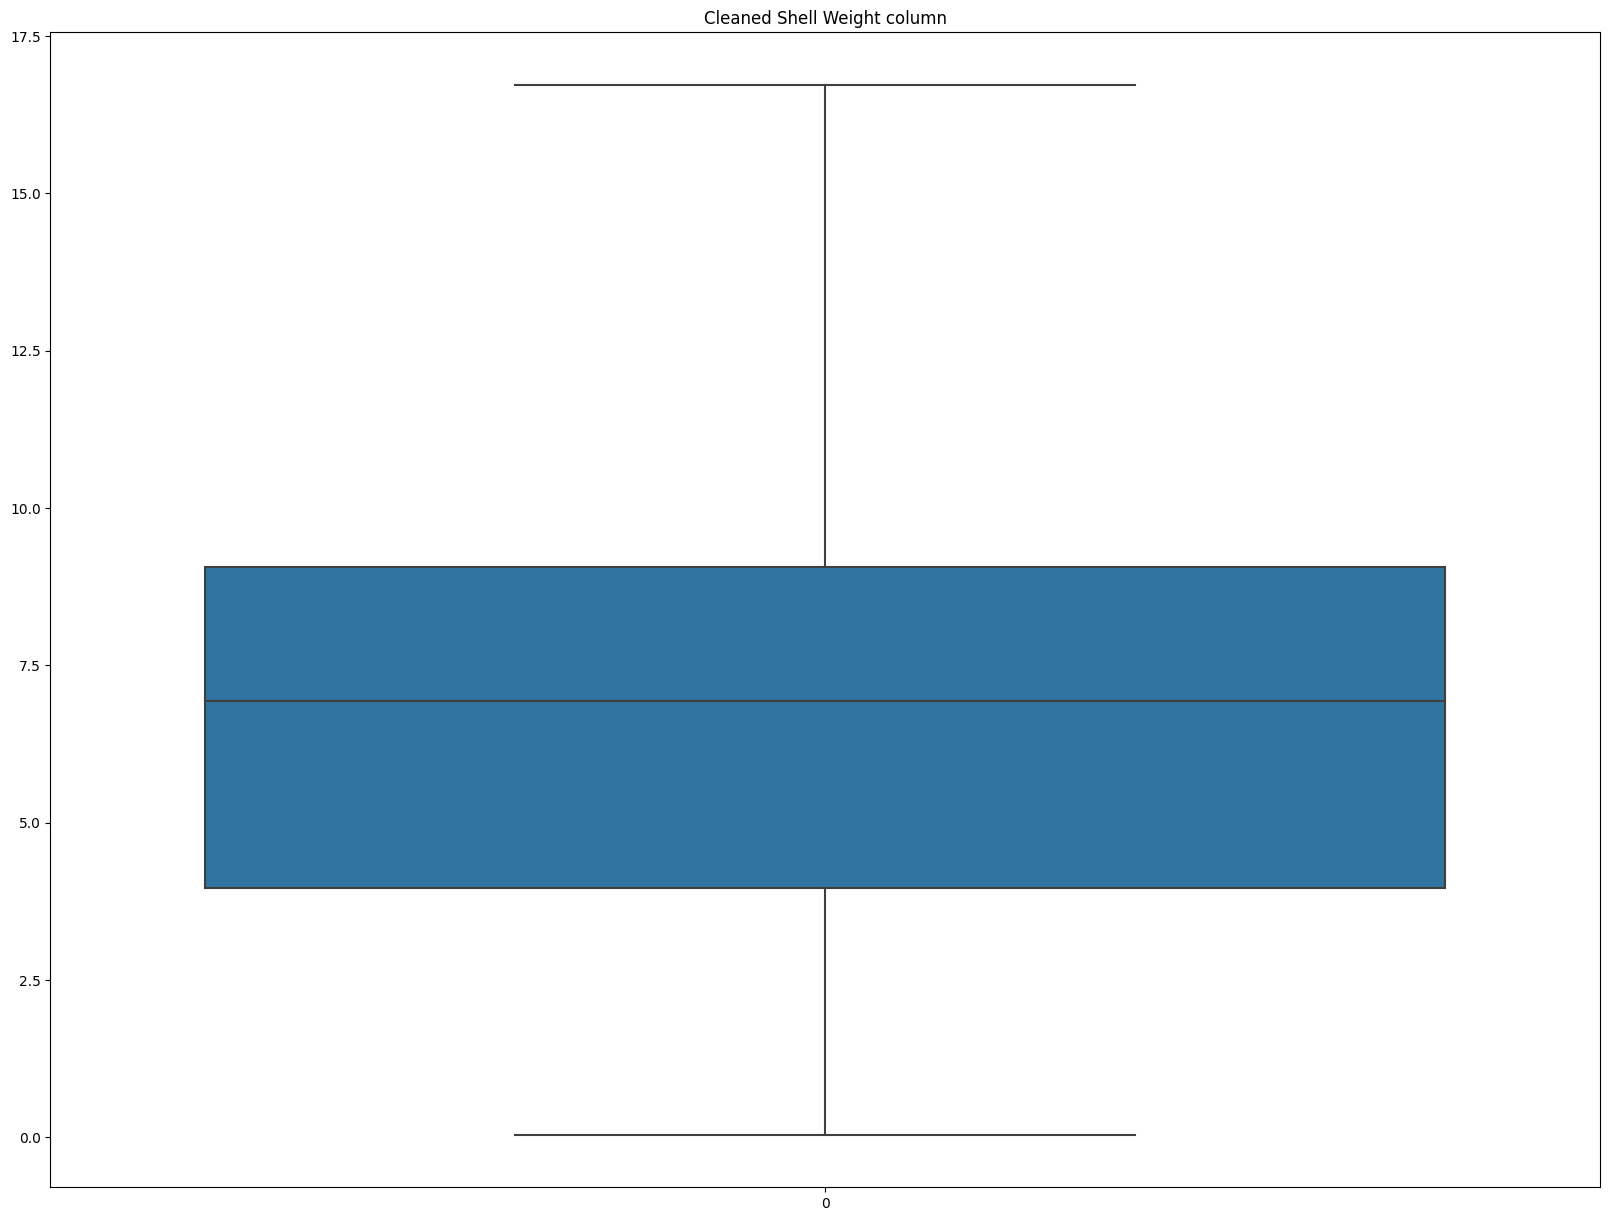

In [22]:
for col in numCols:
    clean_data(train, col)

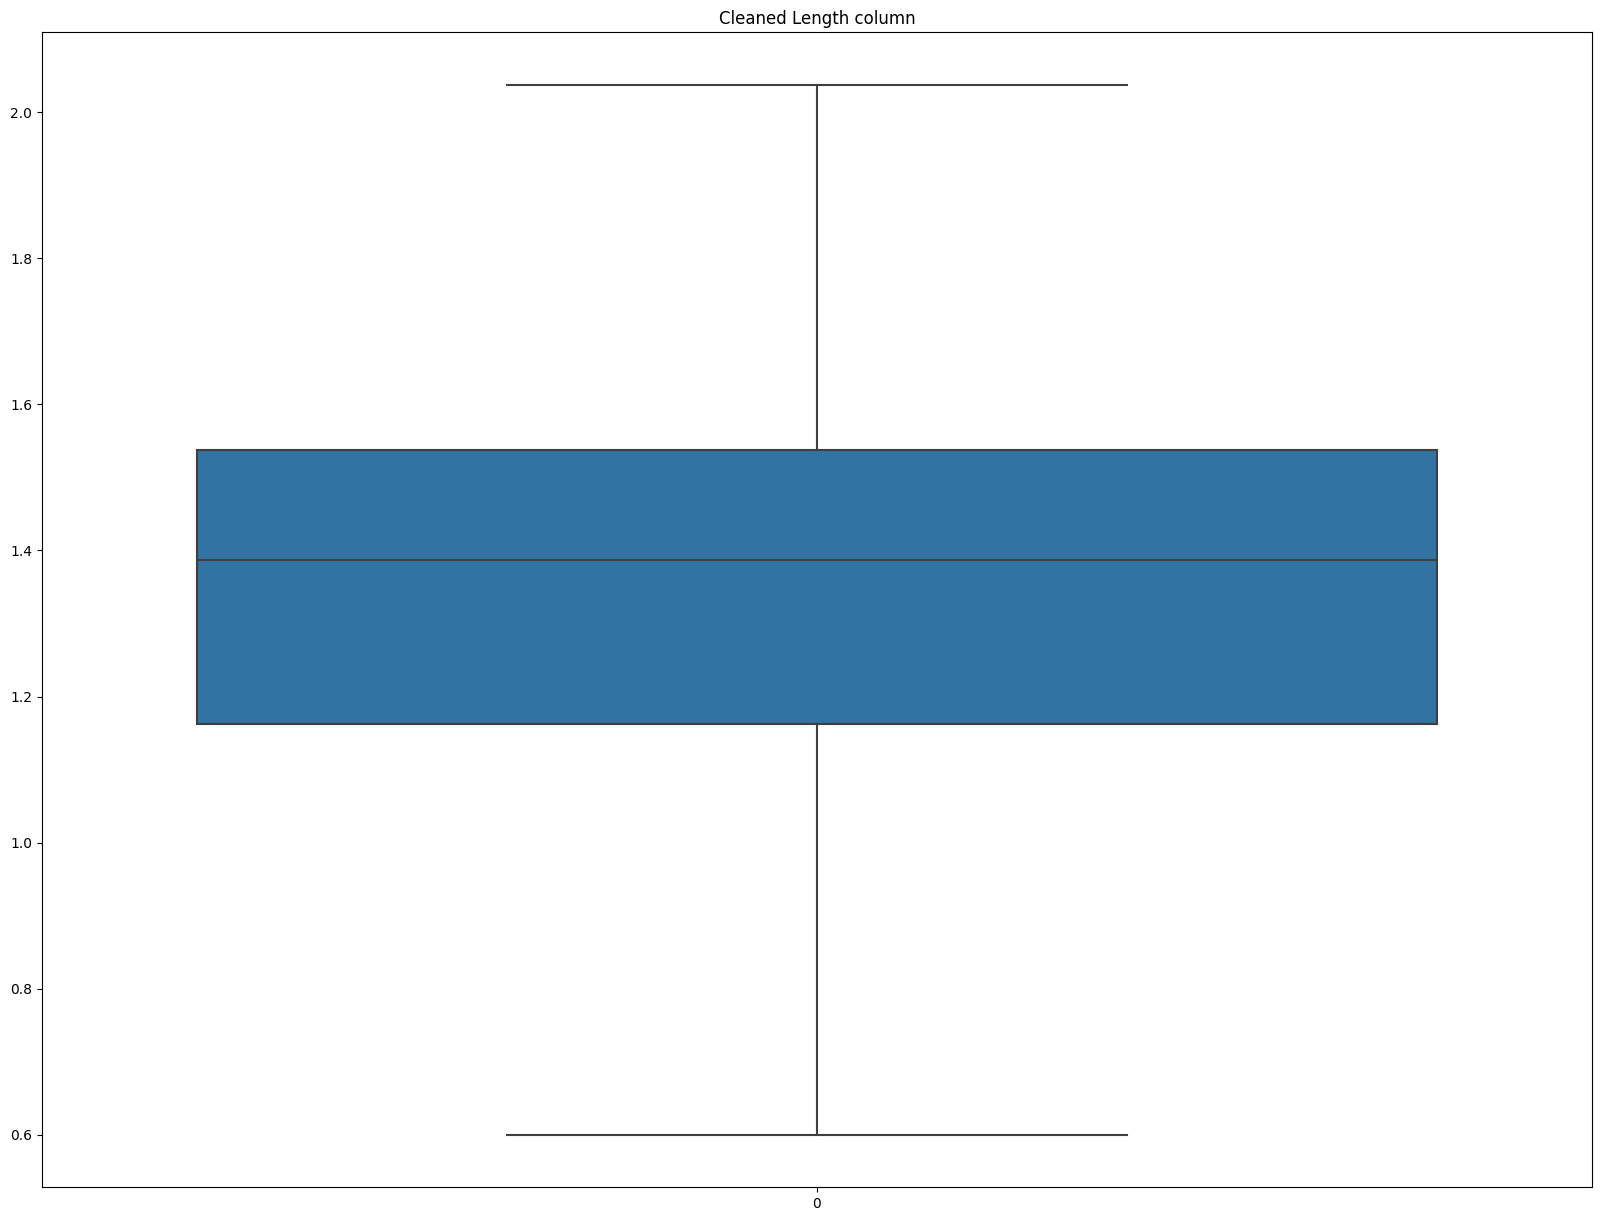

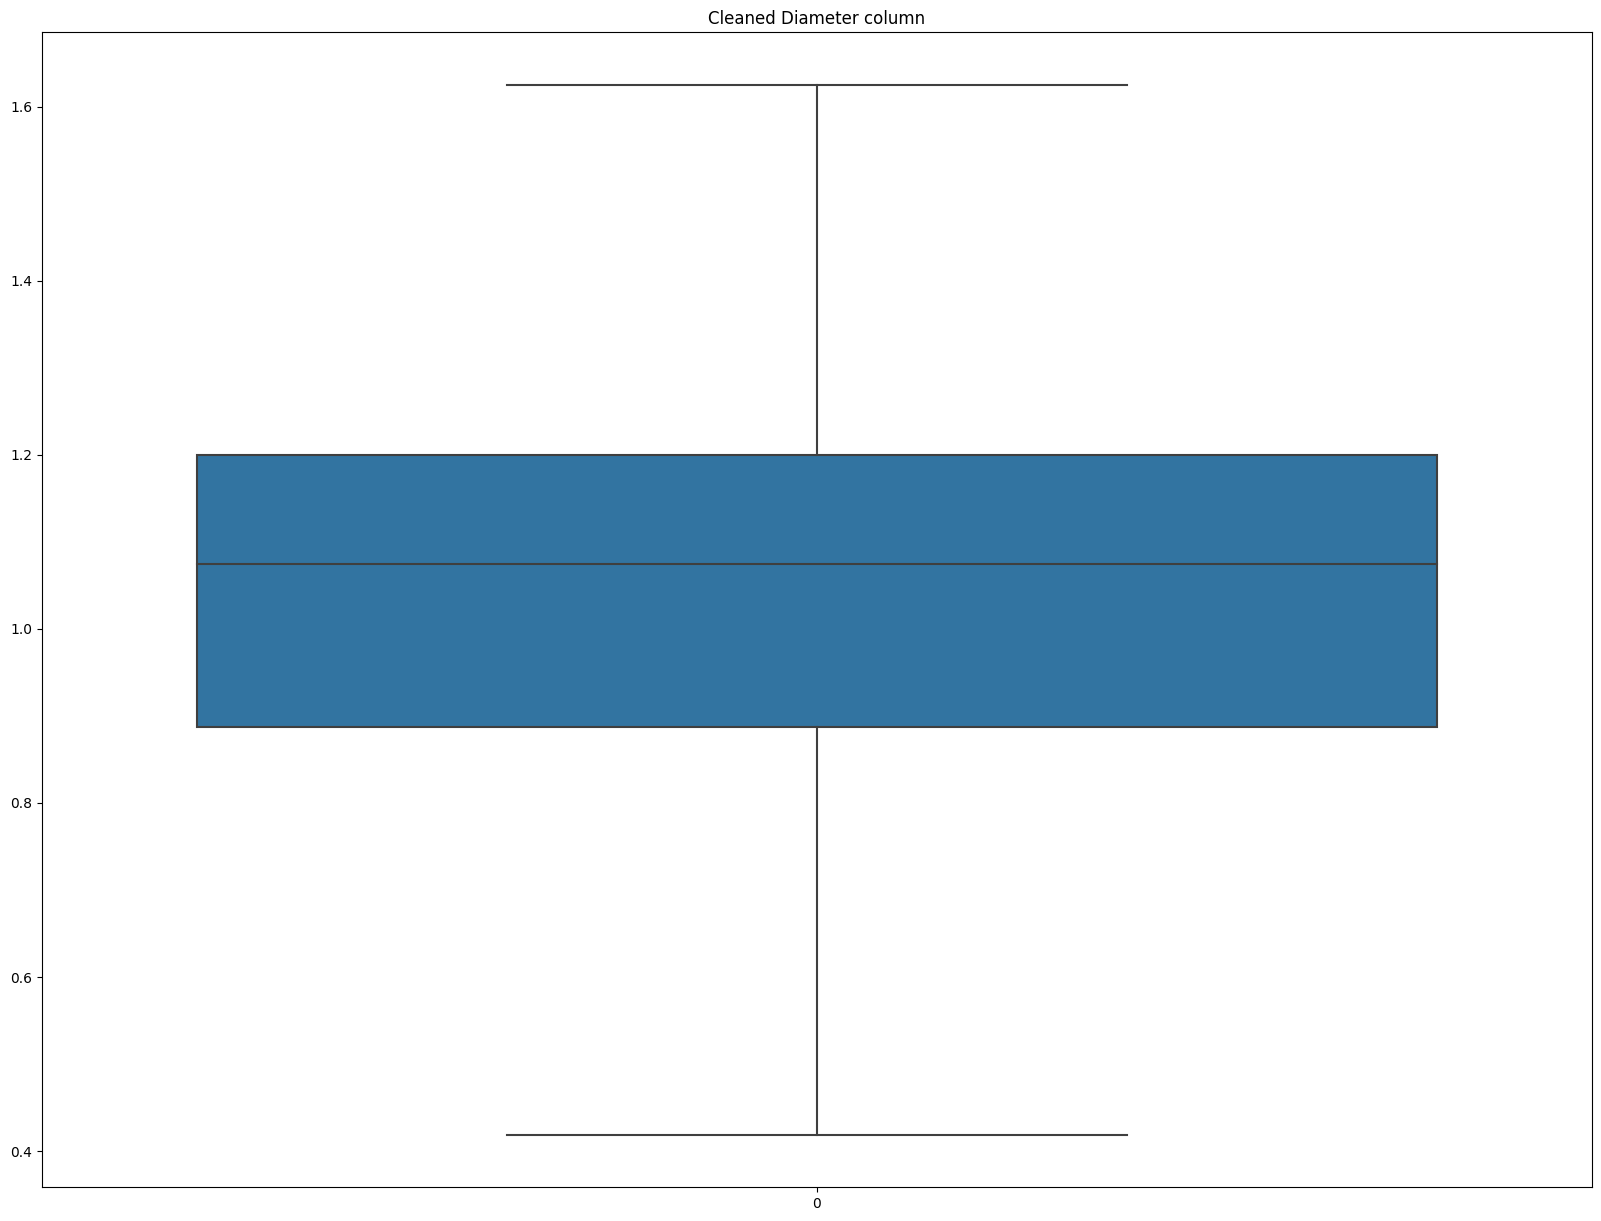

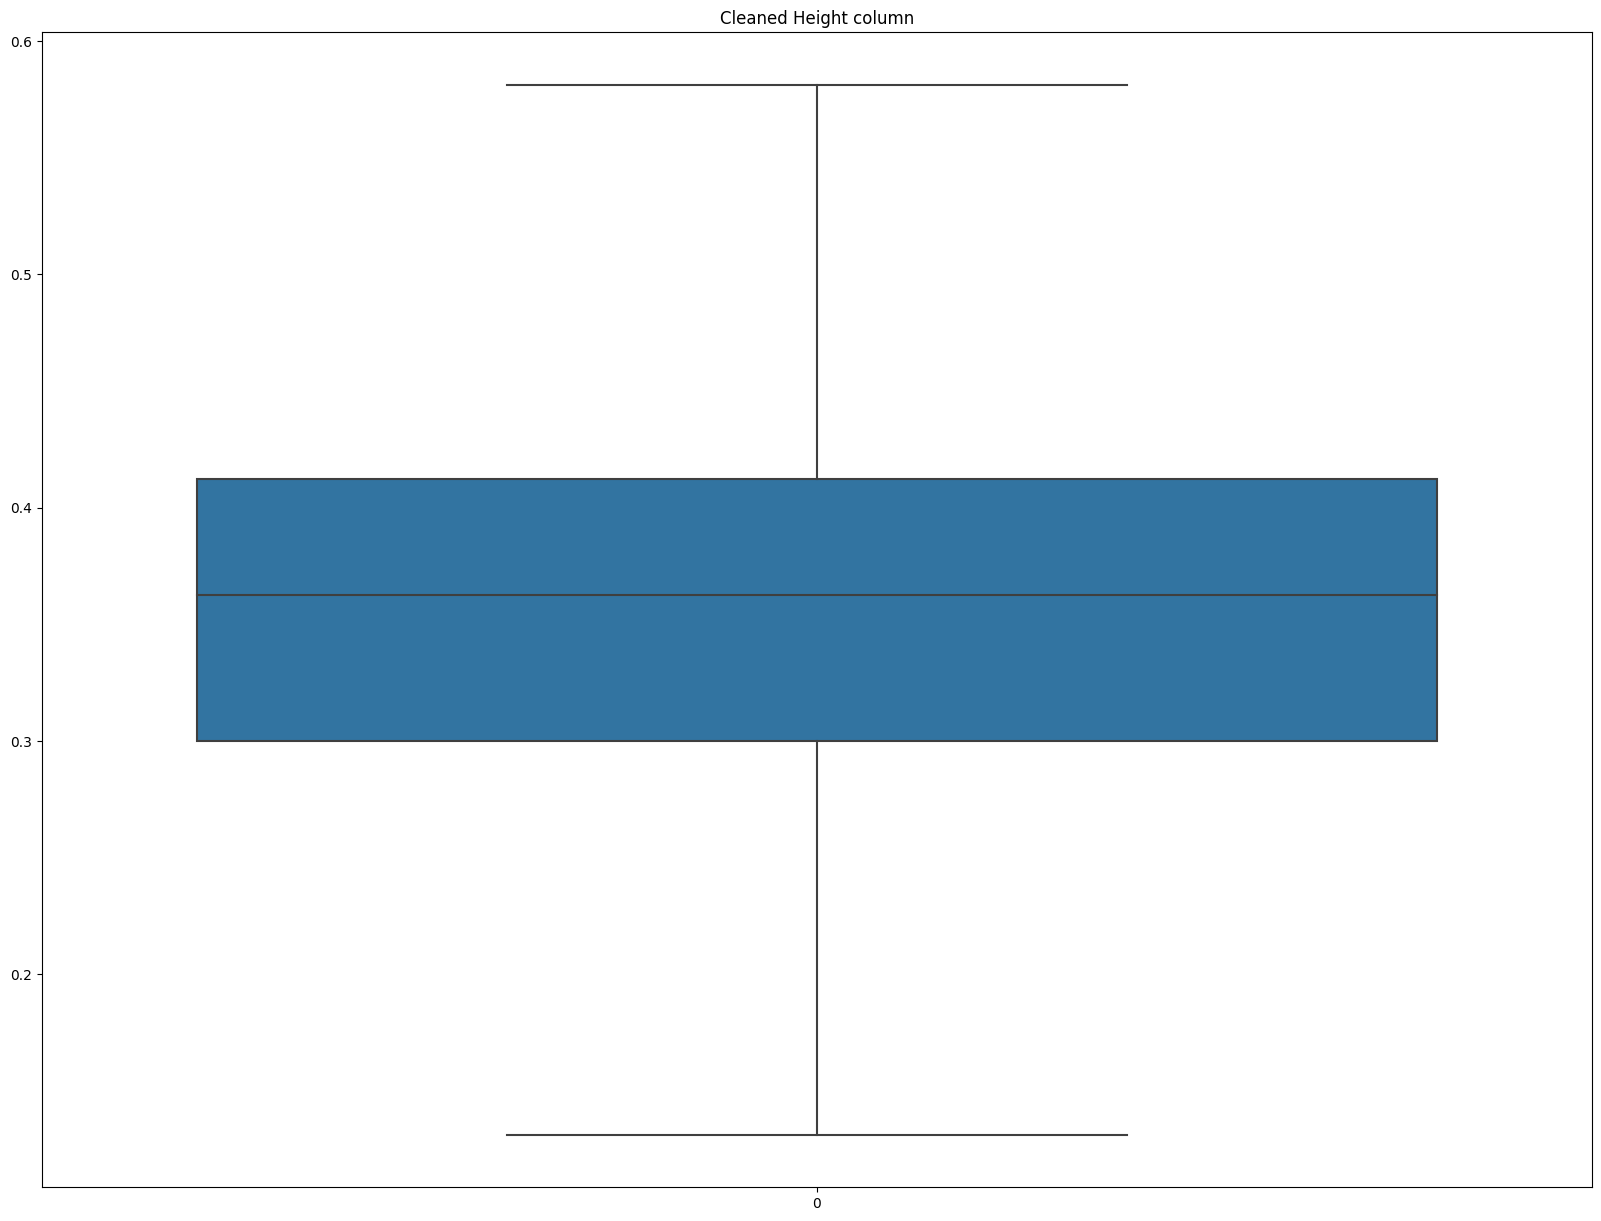

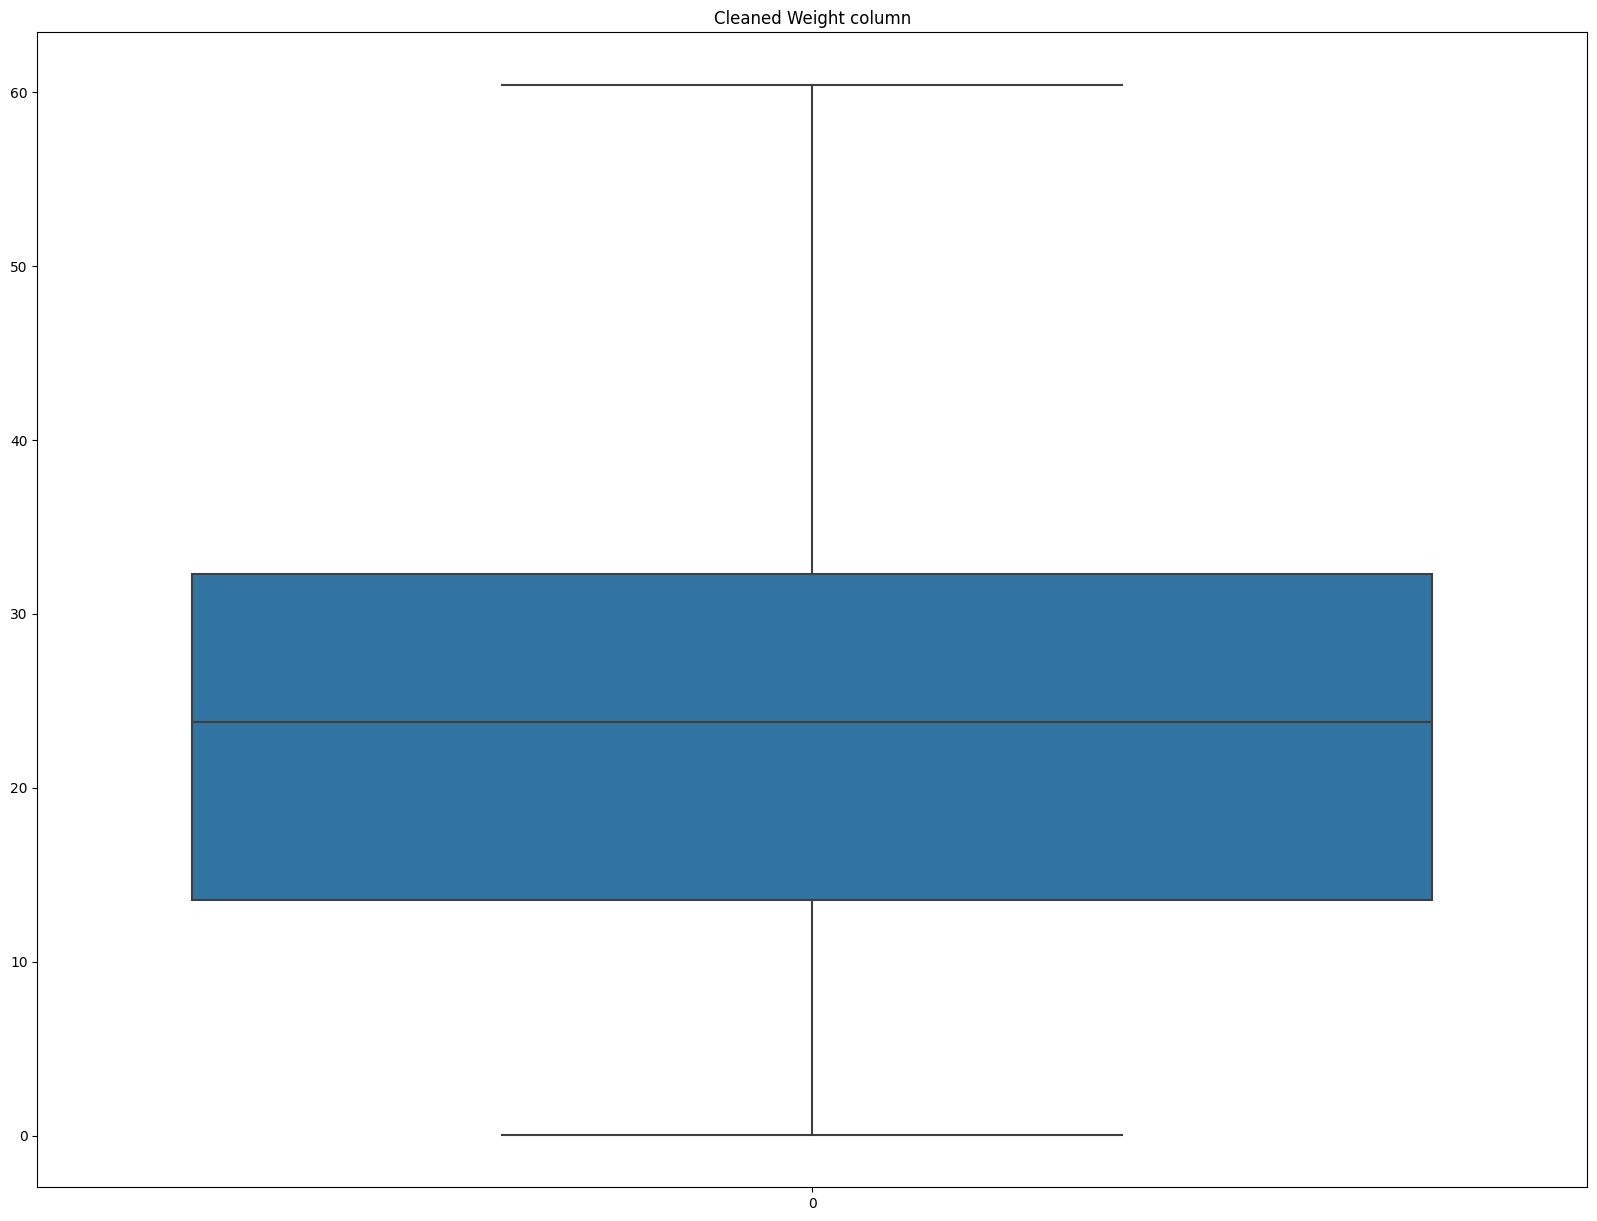

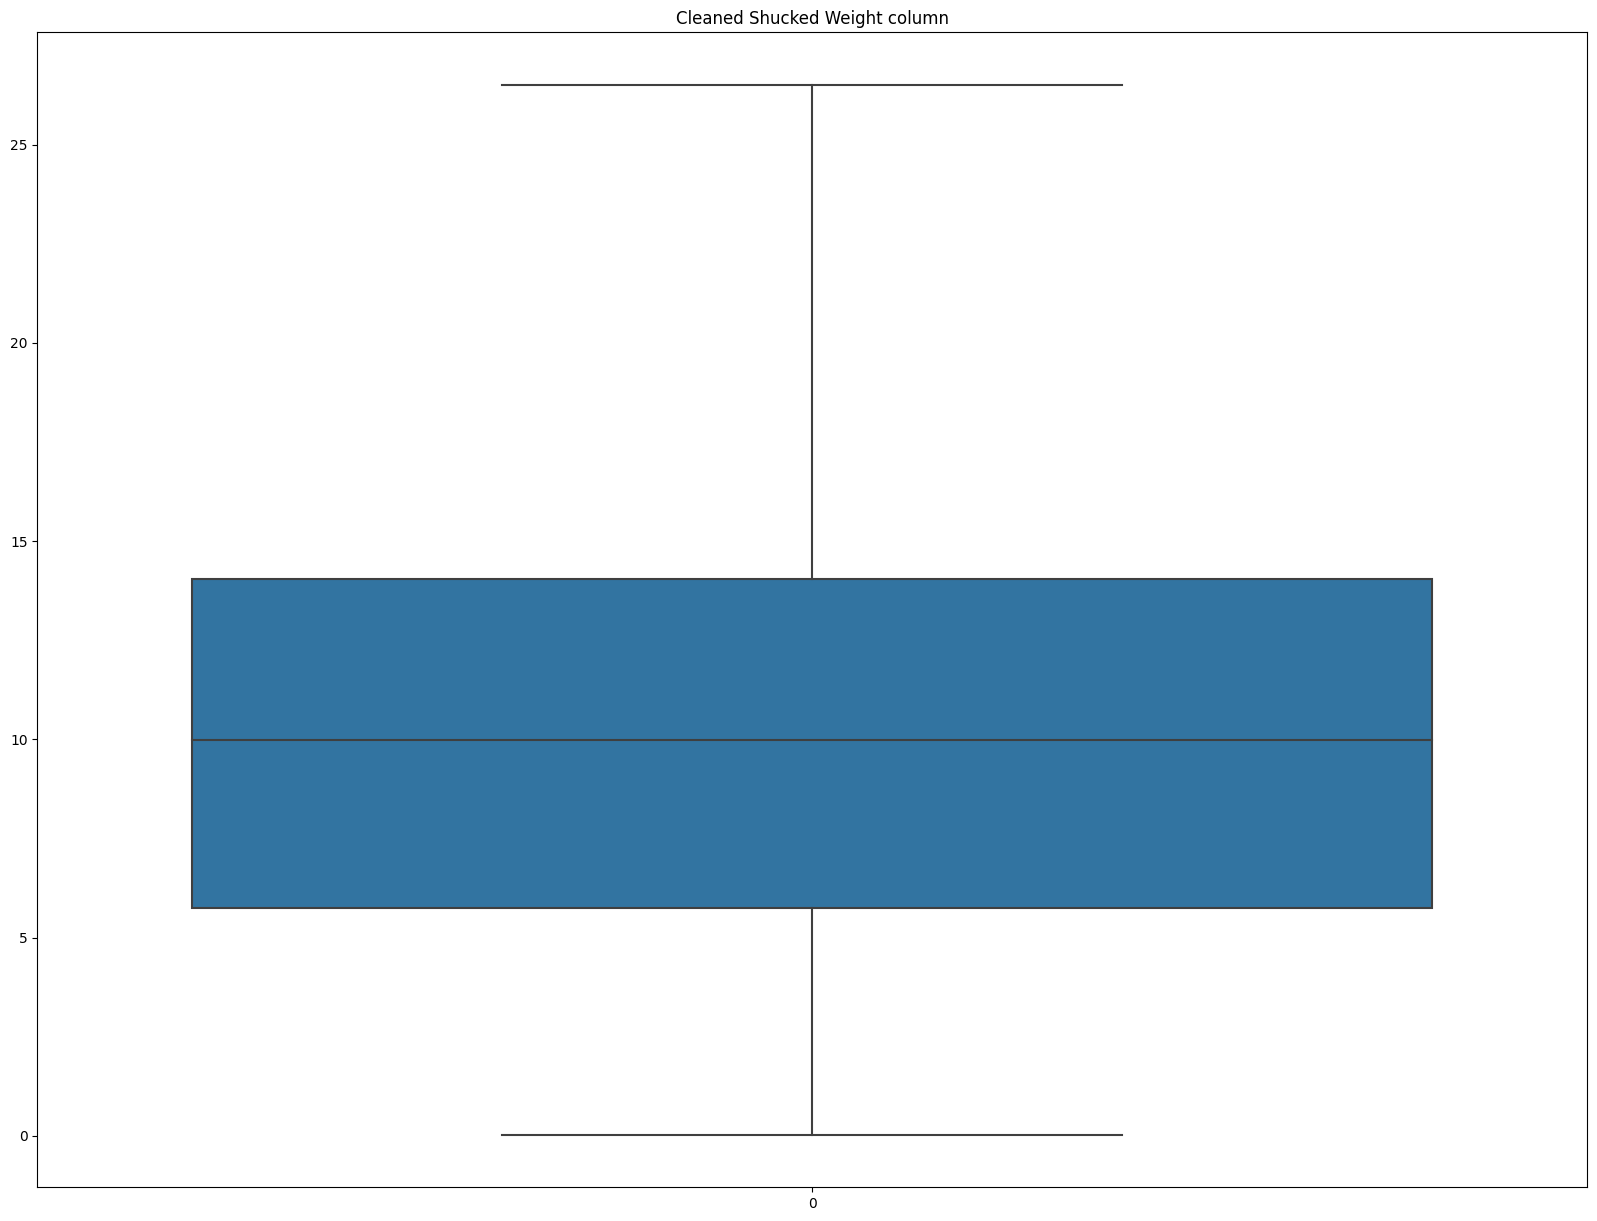

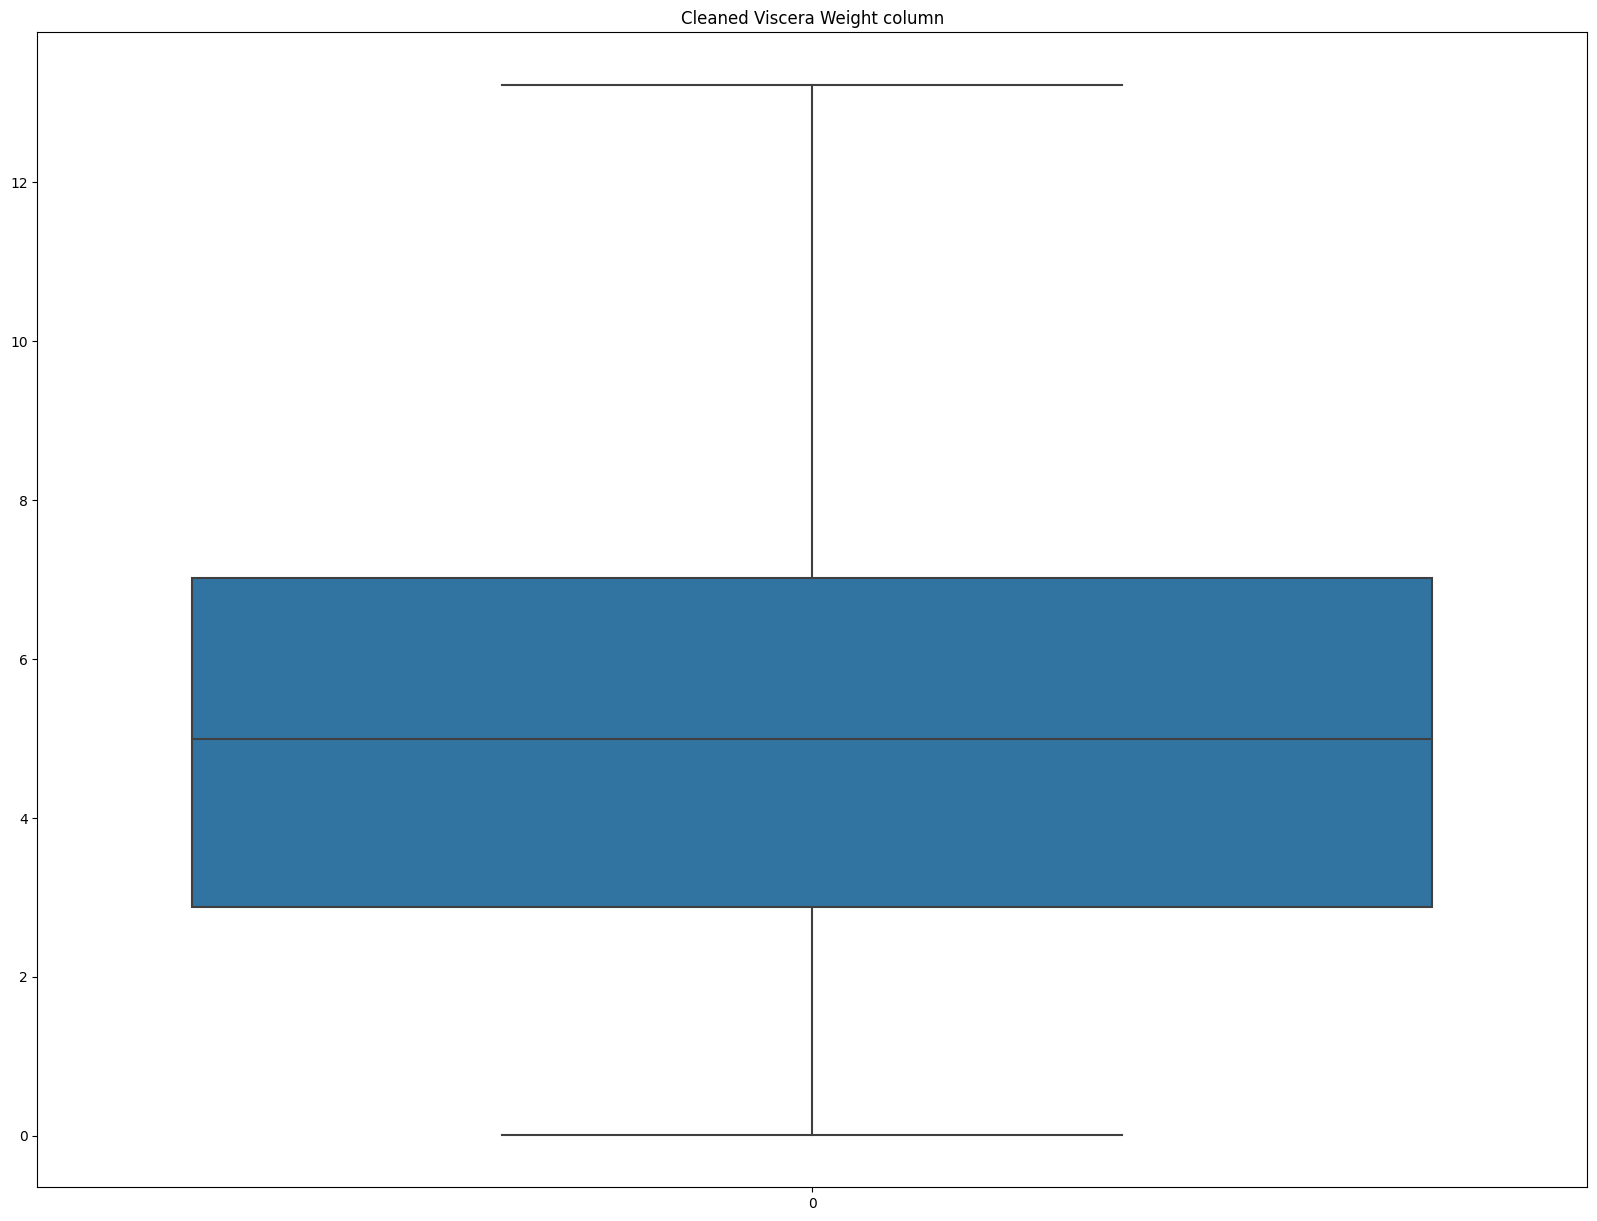

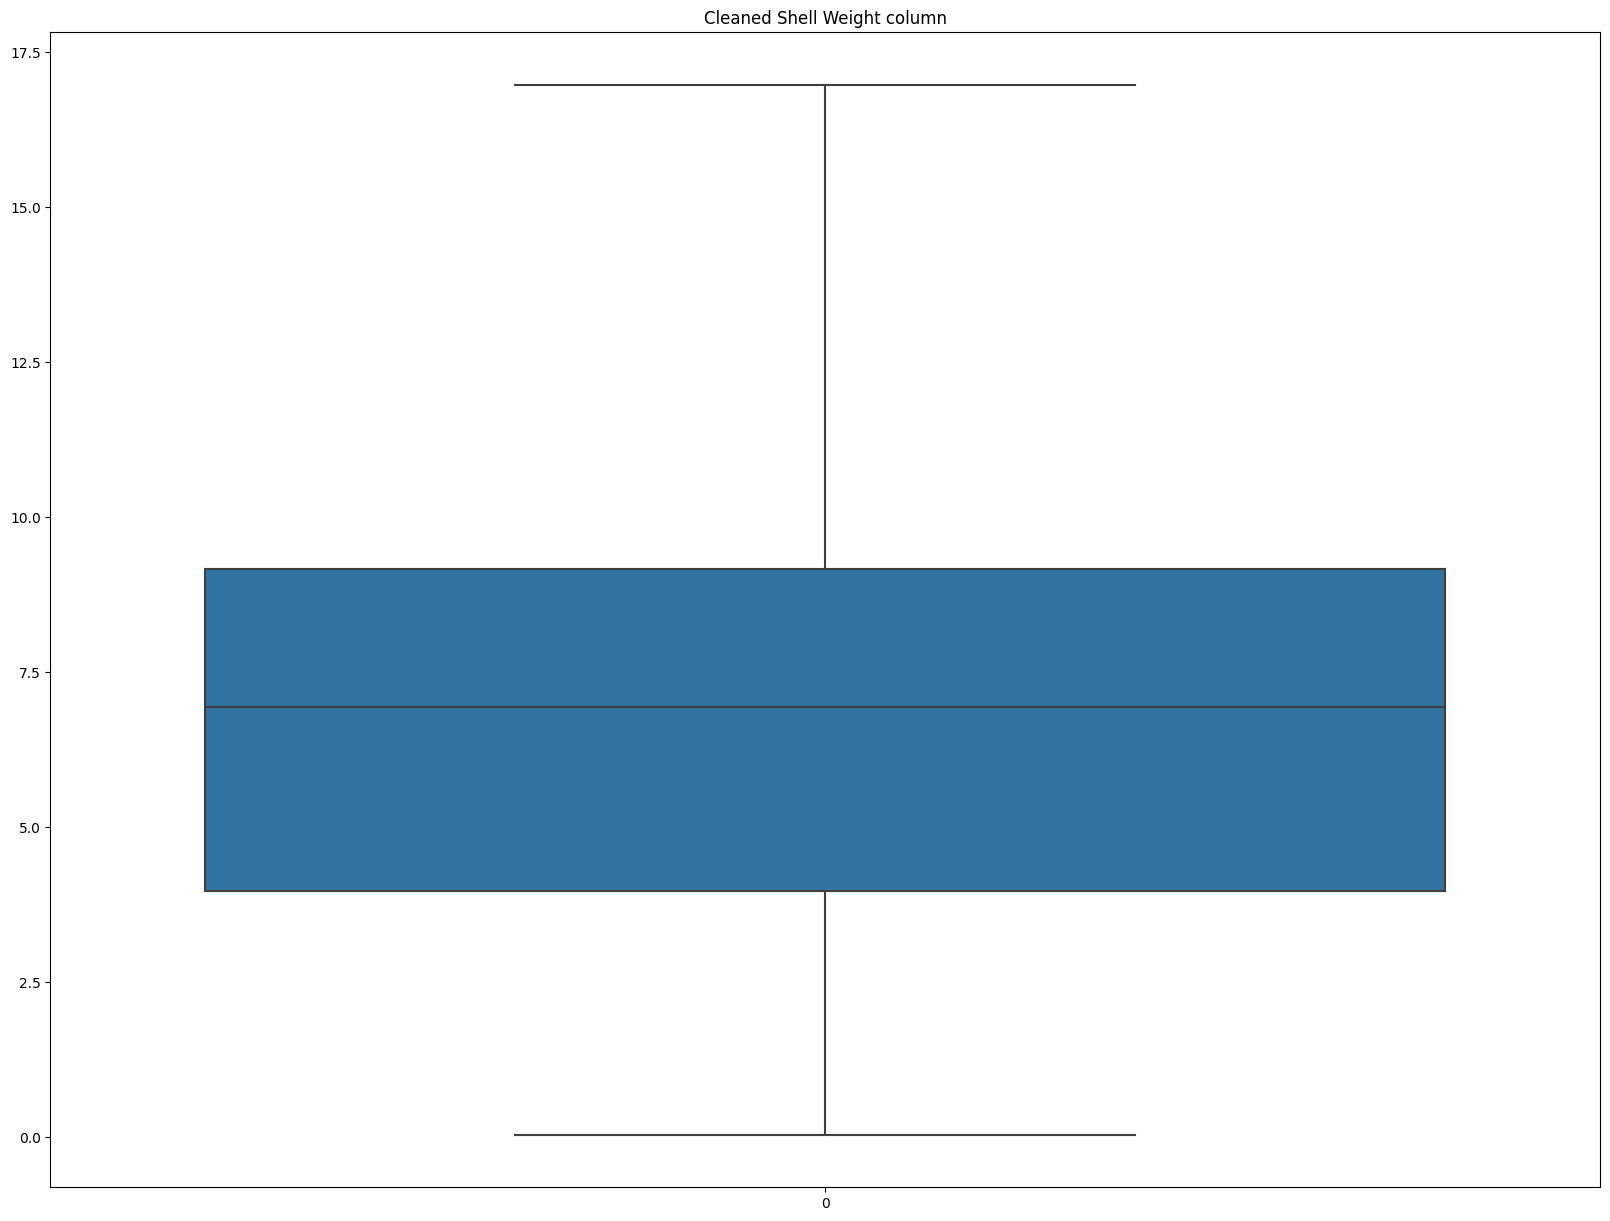

In [23]:
for col in numCols:
    clean_data(test, col)

In [24]:
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
test['Sex'] = le.fit_transform(test['Sex'])

In [25]:
train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [26]:
test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,1,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,1,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,0,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,0,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,1,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  int32  
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int32(1), int64(2)
memory usage: 5.4 MB


In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49368 entries, 0 to 49367
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              49368 non-null  int64  
 1   Sex             49368 non-null  int32  
 2   Length          49368 non-null  float64
 3   Diameter        49368 non-null  float64
 4   Height          49368 non-null  float64
 5   Weight          49368 non-null  float64
 6   Shucked Weight  49368 non-null  float64
 7   Viscera Weight  49368 non-null  float64
 8   Shell Weight    49368 non-null  float64
dtypes: float64(7), int32(1), int64(1)
memory usage: 3.2 MB


In [29]:
train.corr().style.background_gradient(cmap = 'coolwarm')

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,1.000000,-0.002489,0.000076,0.000199,0.000938,-0.000784,-0.000901,-0.000631,-0.000527,0.000089
Sex,-0.002489,1.000000,-0.017777,-0.019194,-0.022827,-0.024656,-0.014040,-0.027730,-0.029993,-0.033541
Length,0.000076,-0.017777,1.000000,0.989315,0.927918,0.943099,0.924193,0.924536,0.925751,0.612700
Diameter,0.000199,-0.019194,0.989315,1.000000,0.930984,0.944534,0.922423,0.924577,0.931114,0.621029
Height,0.000938,-0.022827,0.927918,0.930984,1.000000,0.916626,0.879533,0.897899,0.920425,0.645431
Weight,-0.000784,-0.024656,0.943099,0.944534,0.916626,1.000000,0.972025,0.971746,0.967657,0.602601
Shucked Weight,-0.000901,-0.014040,0.924193,0.922423,0.879533,0.972025,1.000000,0.944205,0.914829,0.506236
Viscera Weight,-0.000631,-0.027730,0.924536,0.924577,0.897899,0.971746,0.944205,1.000000,0.937031,0.578202
Shell Weight,-0.000527,-0.029993,0.925751,0.931114,0.920425,0.967657,0.914829,0.937031,1.000000,0.665524
Age,0.000089,-0.033541,0.612700,0.621029,0.645431,0.602601,0.506236,0.578202,0.665524,1.000000


In [30]:
round(abs(train.corr()['Age']*100).sort_values(ascending=False), 2)

Age               100.00
Shell Weight       66.55
Height             64.54
Diameter           62.10
Length             61.27
Weight             60.26
Viscera Weight     57.82
Shucked Weight     50.62
Sex                 3.35
id                  0.01
Name: Age, dtype: float64

<Axes: >

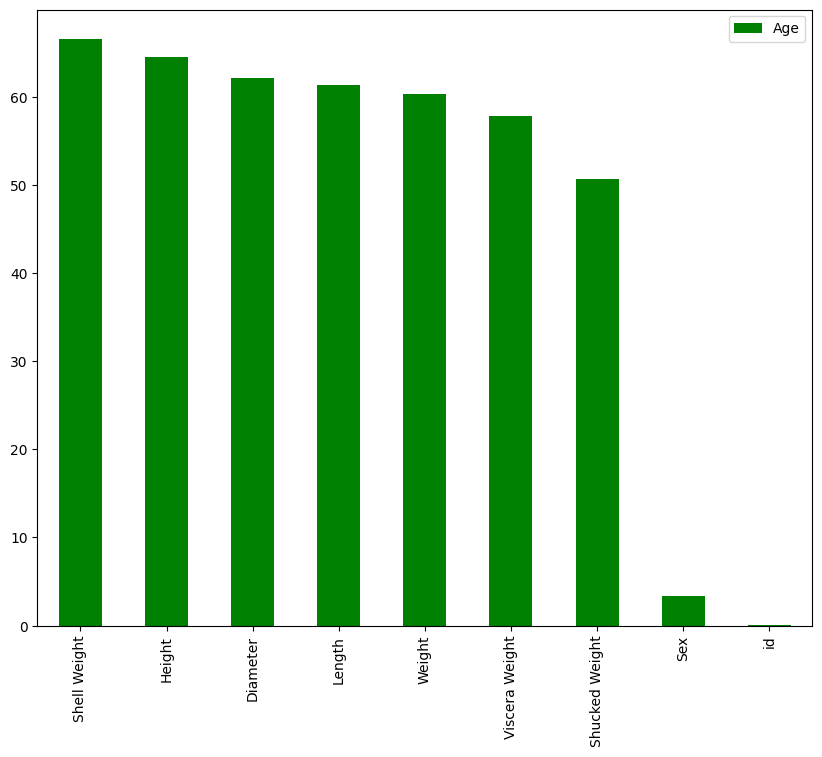

In [34]:
pd.DataFrame(abs(train.corr()['Age'].drop('Age')*100).sort_values(ascending=False)).plot.bar(figsize = (10,8), color='g')

In [35]:
X = train.drop(['id', 'Age'], axis=1)
y = train[['Age']]
test.drop('id', axis=1, inplace=True)

In [36]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Age')
    plt.ylabel('Proportion')
    plt.legend()

    plt.show()
    plt.close()

In [37]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (51835, 8) (51835, 1)
Test set: (22216, 8) (22216, 1)


In [38]:
ss = StandardScaler()
X_mm = ss.fit_transform(X_train)
X_mmt = ss.transform(X_test)
test_mm = ss.transform(test)

### Using LGBMRegressor

In [35]:
LG = LGBMRegressor()
LG.fit(X_mm, y_train)

LGBMRegressor()

In [36]:
yhat_lg = LG.predict(X_mmt)
print("R^2:",metrics.r2_score(y_test, yhat_lg))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, yhat_lg))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, yhat_lg))
print("MSE:",metrics.mean_squared_error(y_test, yhat_lg))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, yhat_lg)))

R^2: 0.5816647796413584
Adjusted R^2: 0.58151407572985
MAE: 1.3941558151955762
MSE: 4.144984044194017
RMSE: 2.035923388586618


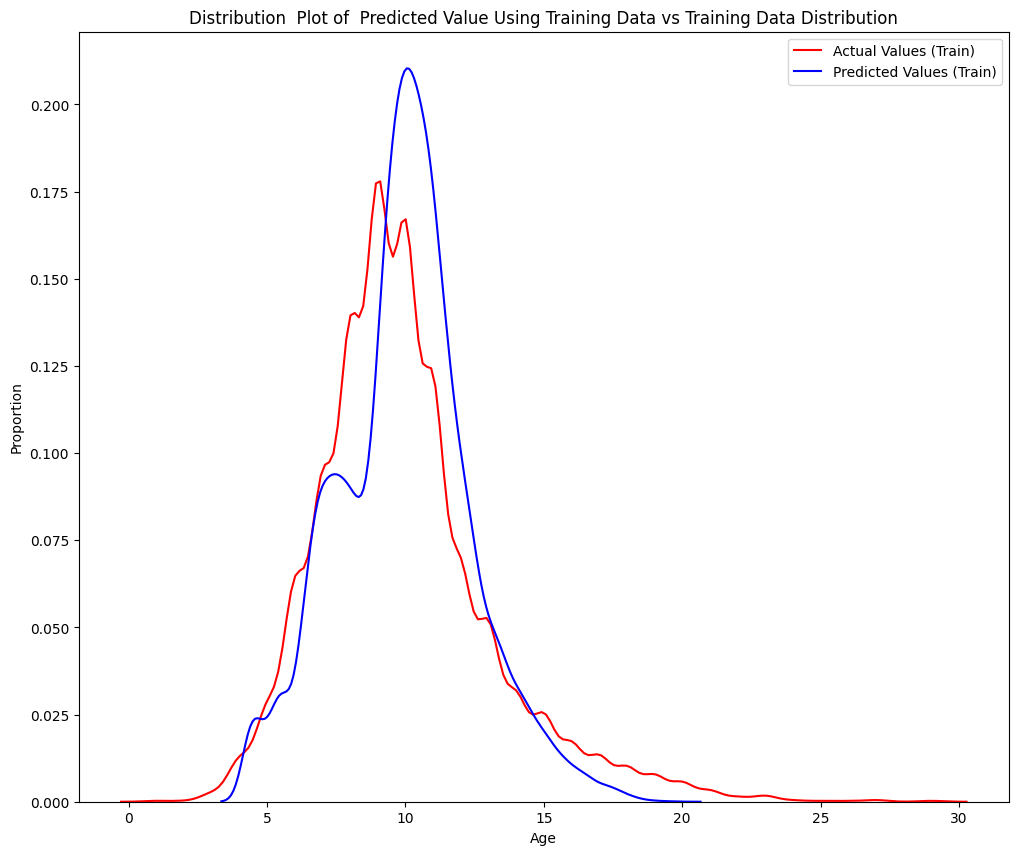

In [37]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, yhat_lg, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [38]:
pred_LG = LG.predict(test_mm)
df_id = pd.DataFrame({'id':df_test['id']})
df_LG = pd.DataFrame(pred_LG,columns=['Age'])  
df_LG = pd.concat([df_id, df_LG],axis=1)
df_LG.head()

,id,Age
0,74051,7.523182
1,74052,7.808810
2,74053,10.881123
3,74054,9.543397
4,74055,7.473205


In [40]:
df_LG.to_csv('Age_LG.csv',index=False) 

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Sex'),
  Text(1, 0, 'Length'),
  Text(2, 0, 'Diameter'),
  Text(3, 0, 'Height'),
  Text(4, 0, 'Weight'),
  Text(5, 0, 'Shucked Weight'),
  Text(6, 0, 'Viscera Weight'),
  Text(7, 0, 'Shell Weight')])

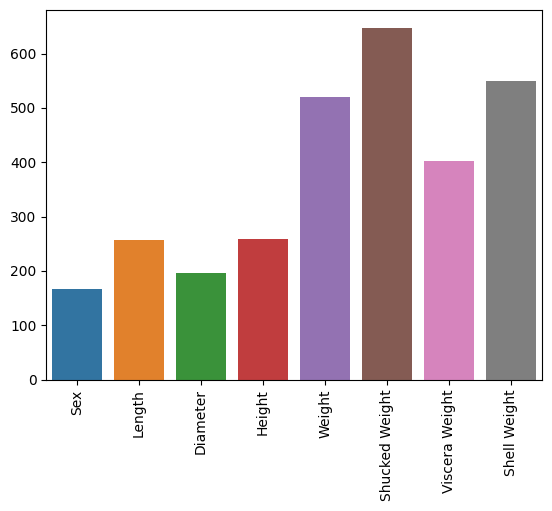

In [50]:
importances = LG.feature_importances_
feat = LG.feature_name_

sns.barplot(x=test.columns, y= importances)
plt.xticks(rotation=90)

### GridSearchCV on LGBMRegressor

In [56]:
param_grid = {
    'num_leaves': [30, 40, 50],
    'learning_rate': [1, 0.1,0.01],
    'n_estimators': [50, 100, 200]}

In [57]:
grid_search = GridSearchCV(estimator = LG, param_grid = param_grid, scoring='neg_mean_absolute_error', cv = 5)

grid_search.fit(X_mm, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [1, 0.1, 0.01],
                         'n_estimators': [50, 100, 200],
                         'num_leaves': [30, 40, 50]},
             scoring='neg_mean_absolute_error')

In [58]:
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 30}
Best score:  -1.4121212569600092


In [59]:
best_grid = grid_search.best_estimator_
pred_lg = best_grid.predict(X_mmt)
print("R^2:",metrics.r2_score(y_test, pred_lg))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred_lg))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred_lg))
print("MSE:",metrics.mean_squared_error(y_test, pred_lg))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_lg)))

R^2: 0.5826474638378846
Adjusted R^2: 0.5824971139351829
MAE: 1.3932026429641766
MSE: 4.13524733038926
RMSE: 2.0335307547193033


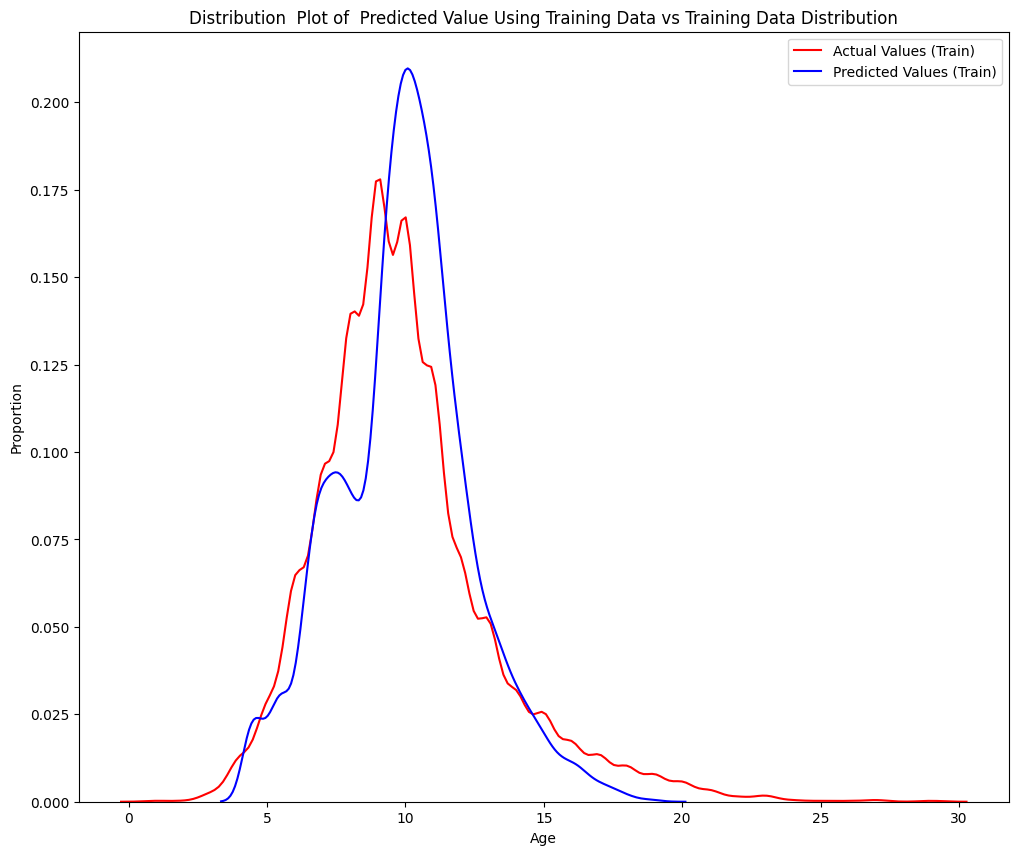

In [60]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, pred_lg, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [61]:
pred_LG = best_grid.predict(test_mm)
df_id = pd.DataFrame({'id':df_test['id']})
df_LG = pd.DataFrame(pred_LG,columns=['Age'])  
df_LG = pd.concat([df_id, df_LG],axis=1)
df_LG.head()

,id,Age
0,74051,7.691225
1,74052,7.806254
2,74053,10.831897
3,74054,9.622562
4,74055,7.469508


In [62]:
df_LG.to_csv('Age_LG1.csv',index=False) 

In [72]:
df_LG2 = pd.read_csv('AGE_LG1.csv')
df_LG2['Age'] = df_LG2['Age'].round().astype(int)
df_LG2.head()

,id,Age
0,74051,8
1,74052,8
2,74053,11
3,74054,10
4,74055,7


In [73]:
df_LG2.to_csv('Age_LG2.csv',index=False) 

In [74]:
df_de = pd.read_csv('AGE_deep2.csv')
df_de['Age'] = df_LG2['Age'].round().astype(int)
df_de.head()

,id,Age
0,74051,8
1,74052,8
2,74053,11
3,74054,10
4,74055,7


In [75]:
df_de.to_csv('Age_deep3.csv',index=False) 

### DEEP LEARNING

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [36]:
model = None

In [37]:
model = Sequential([
    Dense(128, activation='relu', kernel_initializer='normal', input_shape=(8,)),
    
    Dense(256, activation='relu', kernel_initializer='normal'),
    
    Dense(512, activation='relu', kernel_initializer='normal'),
    
    Dense(256, activation='relu', kernel_initializer='normal'),
    
    Dense(1, activation='relu'),
])

# kernel_initializer='normal'
# kernel_regularizer='l2'
# kernel_regularizer=tf.keras.regularizers.l2(0.1)
# kernel_regularizer=tf.keras.regularizers.l1(0.1)
# Dropout(0.2),
#model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

monitor_val_acc = EarlyStopping(monitor = 'val_mae', patience = 10)

model_checkpoint = ModelCheckpoint('play_s3_e11_model.hdf5', save_best_only = True)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 297,345
Trainable params: 297,345
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Train the model #try reducing epoch 
history = model.fit(X_mm, y_train, epochs=60, batch_size=10, validation_data=(X_mmt, y_test), 
                    callbacks = [monitor_val_acc, model_checkpoint], verbose=2)

#history = model.fit(X_mm, y_train, epochs=60, batch_size=15, validation_data=(X_mmt, y_test), verbose=2)

Epoch 1/60
5184/5184 - 42s - loss: 5.3514 - mae: 1.6070 - val_loss: 8.2184 - val_mae: 2.3543 - 42s/epoch - 8ms/step
Epoch 2/60
5184/5184 - 41s - loss: 4.6748 - mae: 1.5128 - val_loss: 4.6868 - val_mae: 1.6365 - 41s/epoch - 8ms/step
Epoch 3/60
5184/5184 - 41s - loss: 4.5974 - mae: 1.4937 - val_loss: 4.3703 - val_mae: 1.3854 - 41s/epoch - 8ms/step
Epoch 4/60
5184/5184 - 41s - loss: 4.5344 - mae: 1.4807 - val_loss: 4.2800 - val_mae: 1.4402 - 41s/epoch - 8ms/step
Epoch 5/60
5184/5184 - 39s - loss: 4.4767 - mae: 1.4709 - val_loss: 4.3432 - val_mae: 1.4075 - 39s/epoch - 8ms/step
Epoch 6/60
5184/5184 - 43s - loss: 4.4452 - mae: 1.4651 - val_loss: 4.3358 - val_mae: 1.4286 - 43s/epoch - 8ms/step
Epoch 7/60
5184/5184 - 41s - loss: 4.4305 - mae: 1.4621 - val_loss: 4.3095 - val_mae: 1.4137 - 41s/epoch - 8ms/step
Epoch 8/60
5184/5184 - 42s - loss: 4.4530 - mae: 1.4685 - val_loss: 4.3370 - val_mae: 1.4145 - 42s/epoch - 8ms/step
Epoch 9/60
5184/5184 - 56s - loss: 4.4365 - mae: 1.4618 - val_loss: 4.28

In [39]:
mae = model.evaluate(X_mmt, y_test, verbose=0)
print('Test MAE:', mae[1])

# Make predictions
predictions = model.predict(X_mmt)
#predictions = mmscaler.inverse_transform(np.concatenate((test_dp, predictions), axis=1))[:, -1]
# Print the predicted cost
print('Predicted Age:', predictions)

Test MAE: 1.3961503505706787
695/695 [==============================] - 2s 3ms/step
Predicted Age: [[ 5.009019 ]
 [13.683635 ]
 [ 8.423212 ]
 ...
 [13.417514 ]
 [ 5.3252397]
 [ 6.7831454]]


In [40]:
print("R^2:",metrics.r2_score(y_test, predictions))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predictions))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predictions))
print("MSE:",metrics.mean_squared_error(y_test, predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R^2: 0.5745339387171589
Adjusted R^2: 0.5743806659432469
MAE: 1.3961509124040175
MSE: 4.215638439076555
RMSE: 2.053201996657064


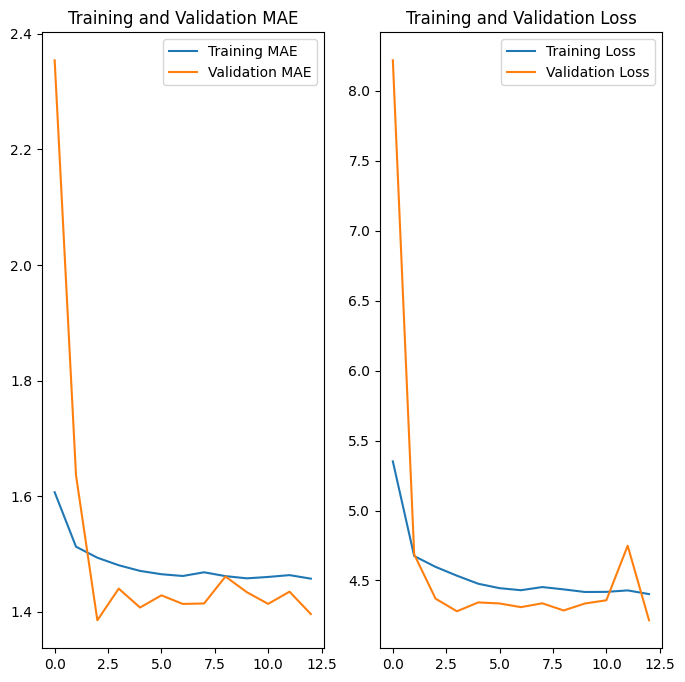

In [41]:
mae = history.history['mae']
val_mae = history.history['val_mae']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(13)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, mae, label='Training MAE')
plt.plot(epochs_range, val_mae, label='Validation MAE')
plt.legend(loc='upper right')
plt.title('Training and Validation MAE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
#plt.savefig('./foo.png')
plt.show()

In [42]:
pred = model.predict(test_mm)
l_id = pd.DataFrame({'id':df_test['id']})
l_predp = pd.DataFrame(pred,columns=['Age'])
l_dp = pd.concat([l_id,l_predp],axis=1)
l_dp.head()

1543/1543 [==============================] - 4s 3ms/step


,id,Age
0,74051,7.754475
1,74052,8.046021
2,74053,10.539754
3,74054,9.440121
4,74055,7.624732


In [43]:
l_dp['Age'] = l_dp['Age'].round().astype(int)
l_dp.head()

,id,Age
0,74051,8
1,74052,8
2,74053,11
3,74054,9
4,74055,8


In [44]:
l_dp.to_csv('Age_deep3.csv',index=False) 

695/695 [==============================] - 2s 3ms/step


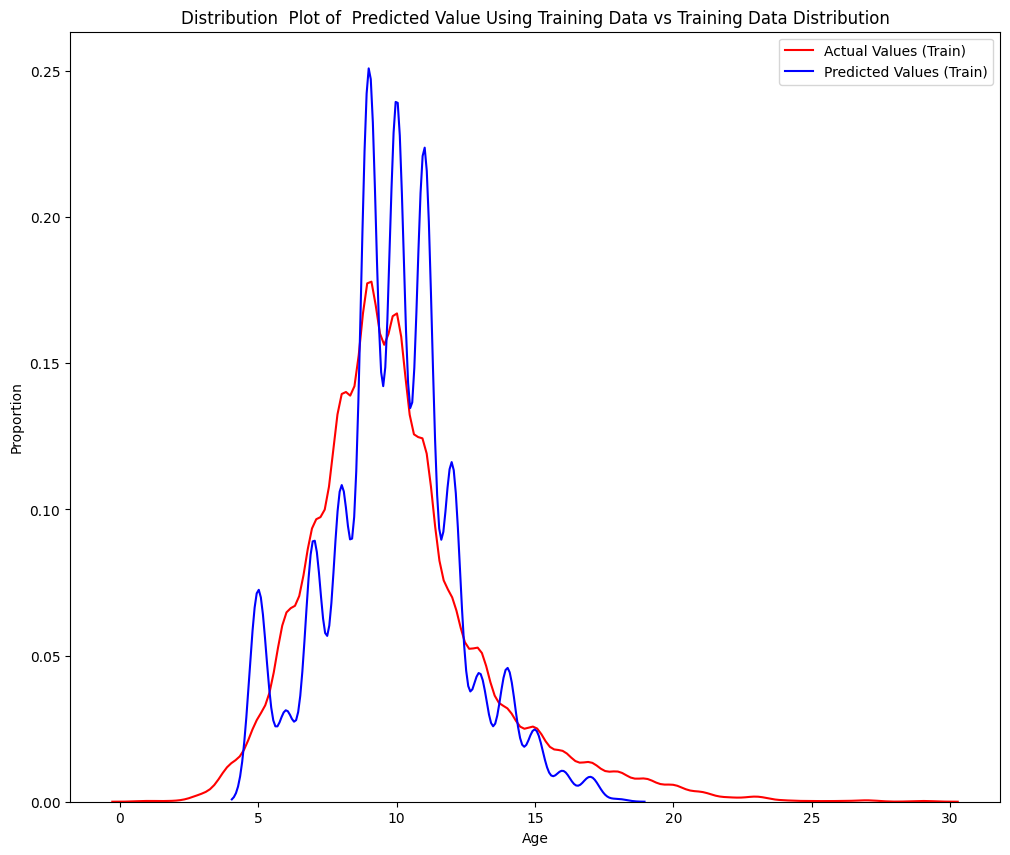

In [45]:
yhat = model.predict(X_mmt)
yhat = yhat.round().astype(int)
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, yhat, "Actual Values (Train)", "Predicted Values (Train)", Title)

### Using TPOTRegressor

In [72]:
tpot_clf = TPOTRegressor(generations=50, population_size=50,
                          offspring_size=20, scoring='neg_mean_absolute_error', #neg_mean_absolute_error #neg_root_mean_squared_error
                          verbosity=2, random_state=2, cv=2)
tpot_clf.fit(X_mm, y_train)

Version 0.11.7 of tpot is outdated. Version 0.12.0 was released 6 days ago.


Optimization Progress:   0%|          | 0/1050 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1.4270523109186288

Generation 2 - Current best internal CV score: -1.4244895692077448

Generation 3 - Current best internal CV score: -1.4244895692077448

Generation 4 - Current best internal CV score: -1.4244895692077448

Generation 5 - Current best internal CV score: -1.4244895692077448

Generation 6 - Current best internal CV score: -1.424087969574137

Generation 7 - Current best internal CV score: -1.4062065680931322

Generation 8 - Current best internal CV score: -1.4062065680931322

Generation 9 - Current best internal CV score: -1.4062065680931322

Generation 10 - Current best internal CV score: -1.4062065680931322

Generation 11 - Current best internal CV score: -1.4062065680931322


TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: DecisionTreeRegressor(KNeighborsRegressor(RidgeCV(input_matrix), n_neighbors=38, p=1, weights=distance), max_depth=8, min

TPOTRegressor(cv=2, generations=50, offspring_size=20, population_size=50,
              random_state=2, scoring='neg_mean_absolute_error', verbosity=2)

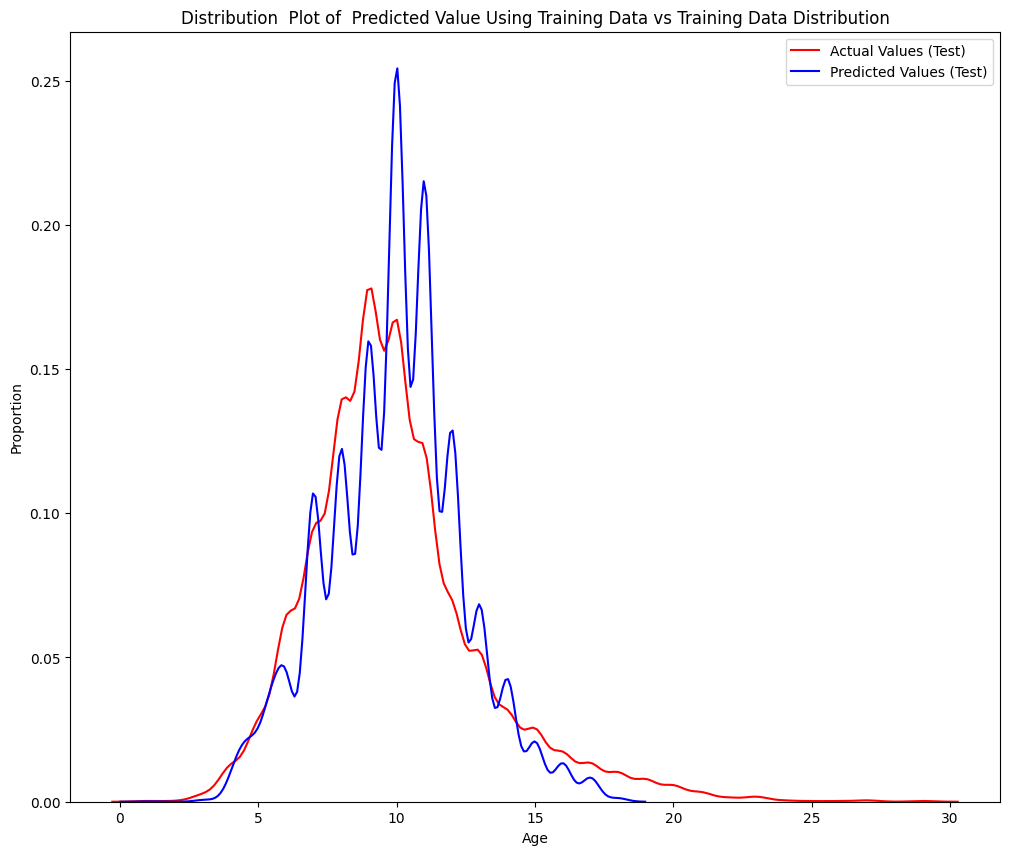

In [75]:
tpot_test = tpot_clf.predict(X_mmt)
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, tpot_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [76]:
print("R^2:",metrics.r2_score(y_test, tpot_test))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, tpot_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, tpot_test))
print("MSE:",metrics.mean_squared_error(y_test, tpot_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, tpot_test)))

R^2: 0.5621462505447202
Adjusted R^2: 0.5619885151461683
MAE: 1.3911459329880713
MSE: 4.338379167851888
RMSE: 2.082877617108573


In [77]:
pred_tpot = tpot_clf.predict(test_mm)
df_id = pd.DataFrame({'id':df_test['id']})
df_tpot = pd.DataFrame(pred_tpot,columns=['Age'])  
df_tpot = pd.concat([df_id, df_tpot],axis=1)
df_tpot.head()

,id,Age
0,74051,8.0
1,74052,8.0
2,74053,11.0
3,74054,9.0
4,74055,8.0


In [79]:
df_tpot.to_csv('Age_tpot.csv',index=False)

In [54]:
df1 = pd.read_csv('Age_tpot.csv')
df1['Age'] = df1['Age'].round().astype(int) 
df1.to_csv('Age_tpot1.csv',index=False)

### Using Several Regression models

In [64]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_pr=Pipeline([("polylr", PolynomialFeatures(degree=3, include_bias=False)),("scalar1",StandardScaler()),
                     ("pr_classifier",LinearRegression())])

pipeline_gb=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",GradientBoostingRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

pipeline_xgbf = Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRFRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_pr, pipeline_gb, pipeline_rf, pipeline_kn, pipeline_xgb, pipeline_xgbf]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1:"Polynomial LR", 2: "GradientBoost", 3: "RandomForest",4: "KNeighbors", 5: "XGBRegressor", 6: "XGBRFRegressor"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [65]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_mean_absolute_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], -1*cv_score.mean()))
#neg_root_mean_squared_error #neg_mean_absolute_error

LinearRegression: 1.511943 
Polynomial LR: 1.431014 
GradientBoost: 1.427348 
RandomForest: 1.477992 
KNeighbors: 1.560054 
XGBRegressor: 1.432912 
XGBRFRegressor: 1.462977 


In [66]:
# Model prediction on test data using Gradient Boosting
pred_gb = pipeline_gb.predict(X_test)

# Model Evaluation XGBRegressor
print("R^2:",metrics.r2_score(y_test, pred_gb))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred_gb))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred_gb))
print("MSE:",metrics.mean_squared_error(y_test, pred_gb))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_gb)))

R^2: 0.5754760317623128
Adjusted R^2: 0.5753230983743765
MAE: 1.411748675344635
MSE: 4.206303913915224
RMSE: 2.050927574029669


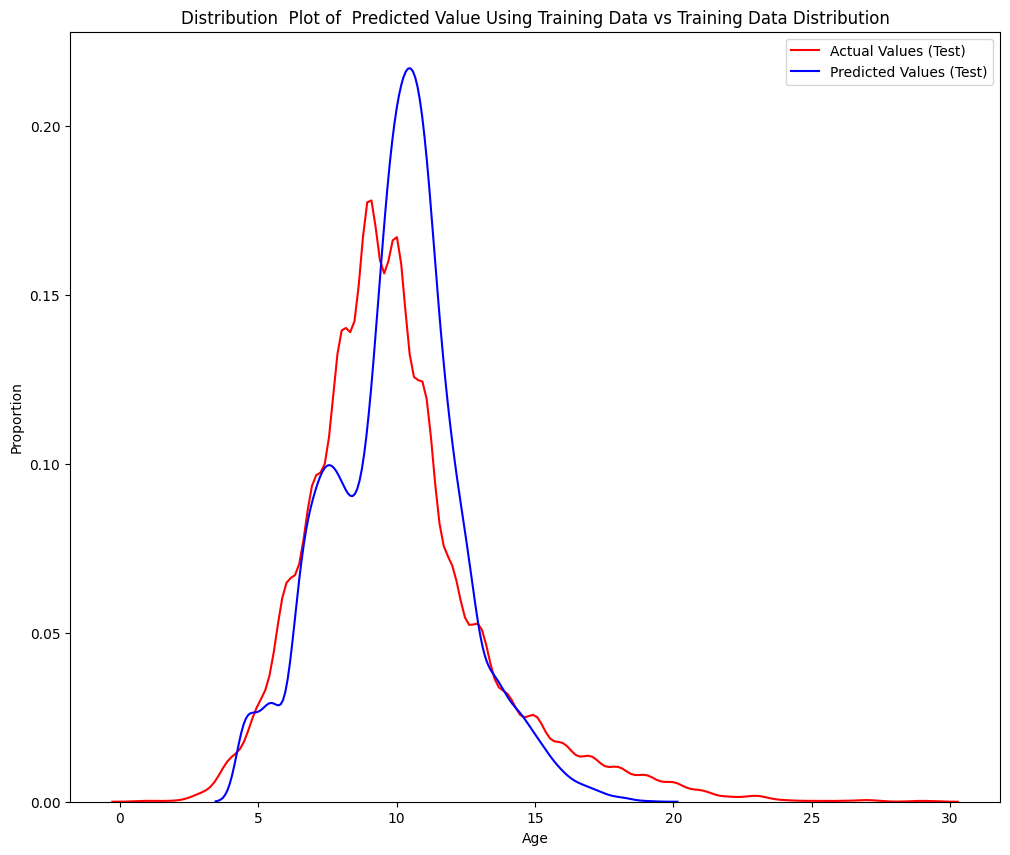

In [67]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, pred_gb, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [68]:
predgb = pipeline_gb.predict(test)
df_id = pd.DataFrame({'id':df_test['id']})
df_gb = pd.DataFrame(predgb,columns=['Age'])  
df_gb = pd.concat([df_id, df_gb],axis=1)
df_gb.head()

,id,Age
0,74051,7.496544
1,74052,7.604776
2,74053,10.595785
3,74054,9.699012
4,74055,7.621723


In [69]:
df_gb.to_csv('Age_gb.csv',index=False)

In [82]:
# Model prediction on test data using XGBOOST
pred = pipeline_xgb.predict(X_test)

# Model Evaluation XGBRegressor
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.5667619936916571
Adjusted R^2: 0.5666059210996606
MAE: 1.416028444709905
MSE: 4.29264507527477
RMSE: 2.0718699465156516


In [ ]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, pred, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [83]:
predxg = pipeline_xgb.predict(test)
df_id = pd.DataFrame({'id':df_test['id']})
df_xg = pd.DataFrame(predxg,columns=['Age'])  
df_xg = pd.concat([df_id, df_xg],axis=1)
df_xg.head()

,id,Age
0,74051,7.518247
1,74052,7.682188
2,74053,10.845874
3,74054,9.658308
4,74055,7.412100


In [84]:
df_xg.to_csv('Age_xg.csv',index=False)

In [99]:
# Model prediction on test data using Polynomial
predpr = pipeline_pr.predict(X_test)

# Model Evaluation XGBRegressor
print("R^2:",metrics.r2_score(y_test, predpr))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predpr))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predpr))
print("MSE:",metrics.mean_squared_error(y_test, predpr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predpr)))

R^2: 0.5785243684085628
Adjusted R^2: 0.5783725331740543
MAE: 1.4104979951051178
MSE: 4.176100129617057
RMSE: 2.0435508629875248


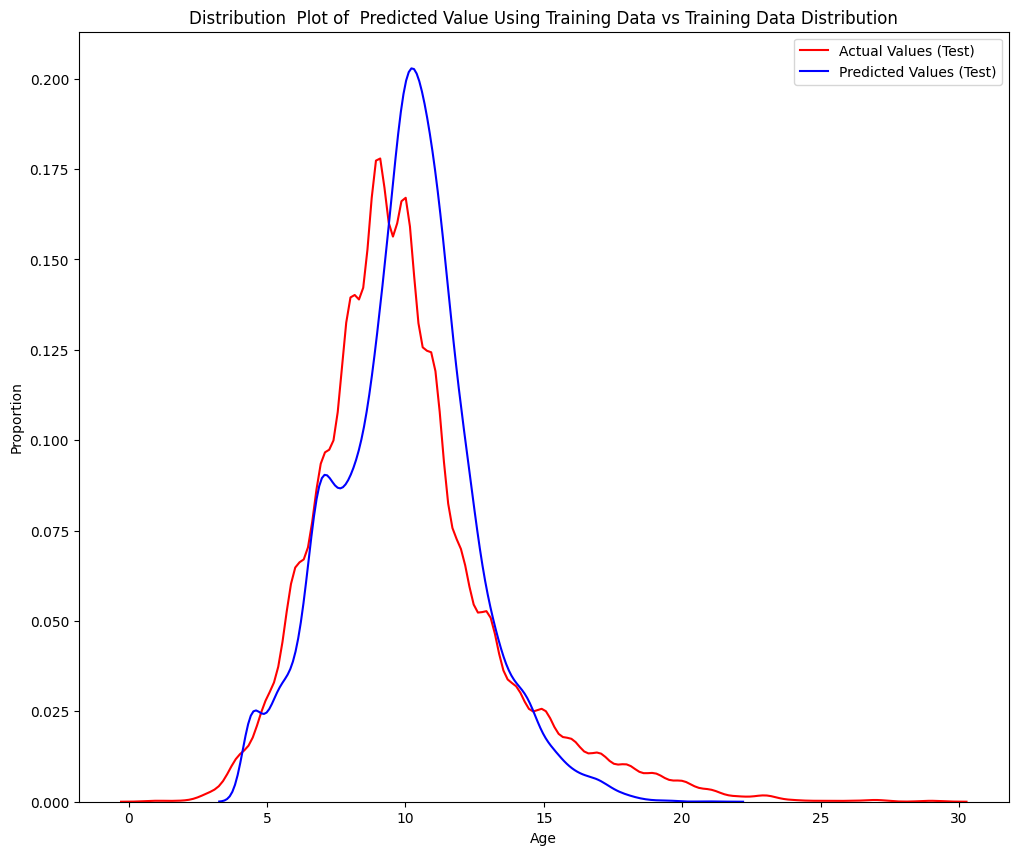

In [100]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, predpr, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [101]:
yhatpr = pipeline_xgb.predict(test)
df_id = pd.DataFrame({'id':df_test['id']})
df_pr = pd.DataFrame(yhatpr,columns=['Age'])  
df_pr = pd.concat([df_id, df_pr],axis=1)
df_pr.head()

,id,Age
0,74051,7.518247
1,74052,7.682188
2,74053,10.845874
3,74054,9.658308
4,74055,7.412100


In [102]:
df_pr.to_csv('Age_pr.csv',index=False)

### GridSearchCV on Gradient Boosting

In [46]:
GBR = GradientBoostingRegressor()
param_grid = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,200,300,400],
                  'max_depth'    : [4,6,8,10]
                 }

In [47]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = param_grid, cv = 5, scoring='neg_mean_absolute_error')
grid_GBR.fit(X_mm, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 200, 300, 400],
                         'subsample': [0.9, 0.5, 0.2, 0.1]},
             scoring='neg_mean_absolute_error')

In [48]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=6, n_estimators=400,
                          subsample=0.5)

 The best score across ALL searched params:
 -1.411130750460905

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 400, 'subsample': 0.5}


In [50]:
best_GBR = grid_GBR.best_estimator_
pred_gbr = best_GBR.predict(X_mmt)
pred_gbr = pred_gbr.round().astype(int)
print("R^2:",metrics.r2_score(y_test, pred_gbr))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred_gbr))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred_gbr))
print("MSE:",metrics.mean_squared_error(y_test, pred_gbr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_gbr)))

R^2: 0.5745367715158107
Adjusted R^2: 0.5743834997624053
MAE: 1.363071660064818
MSE: 4.215610370903853
RMSE: 2.0531951614261743


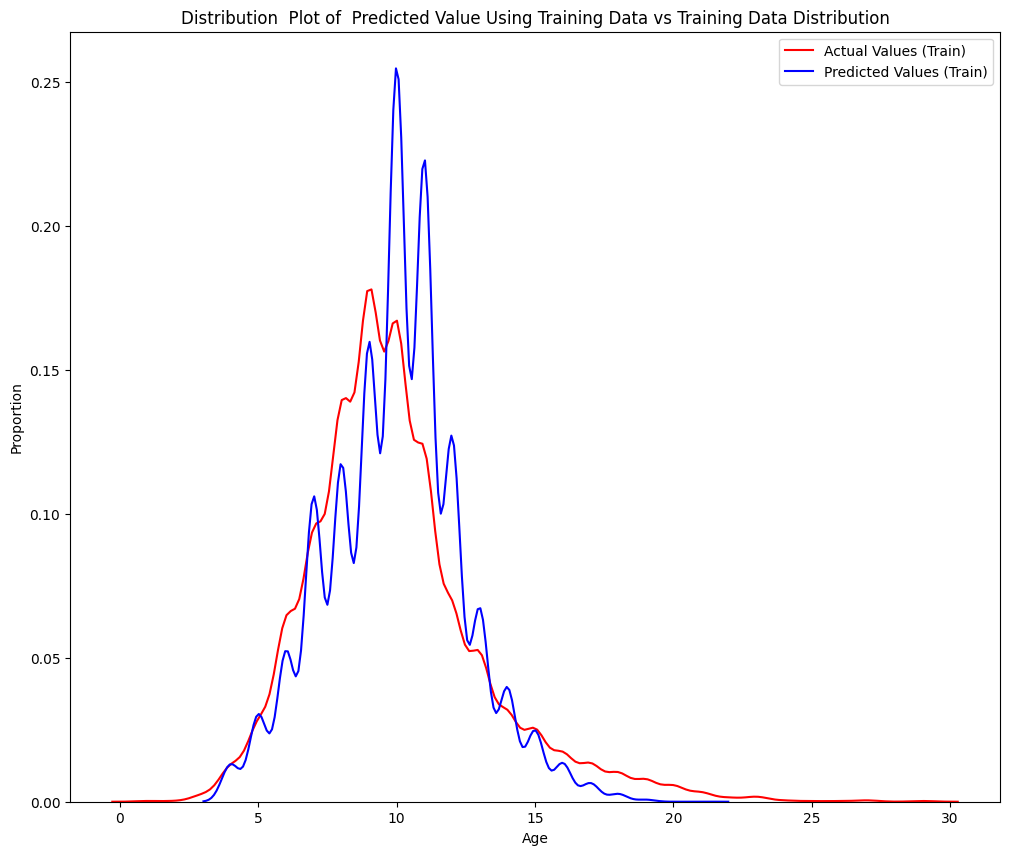

In [51]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, pred_gbr, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [52]:
pred_GBR = best_GBR.predict(test_mm)
pred_GBR = pred_GBR.round().astype(int)
df_id = pd.DataFrame({'id':df_test['id']})
df_GBR = pd.DataFrame(pred_GBR,columns=['Age'])  
df_GBR = pd.concat([df_id, df_GBR],axis=1)
df_GBR.head()

,id,Age
0,74051,8
1,74052,8
2,74053,11
3,74054,10
4,74055,8


In [53]:
df_GBR.to_csv('Age_GBR.csv',index=False)

In [60]:
pred_GBR1 = best_GBR.predict(test_mm)
pred_GBR1 = np.floor(pred_GBR1).astype(int)
df_id = pd.DataFrame({'id':df_test['id']})
df_GBR1 = pd.DataFrame(pred_GBR1,columns=['Age'])  
df_GBR1 = pd.concat([df_id, df_GBR1],axis=1)
df_GBR1.head()

,id,Age
0,74051,7
1,74052,7
2,74053,10
3,74054,9
4,74055,7


In [61]:
df_GBR1.to_csv('Age_GBR1.csv',index=False)

### RandomizedSearchCV on XGBRegressor

In [39]:
# Define the XGBoostRegressor model
xgb_model = XGBRegressor()

# Define the hyperparameters to be tuned and their possible values
param_grid = {'n_estimators': [100, 200, 300, 400],
              'learning_rate': [1.0, 0.1, 0.01],
              'max_depth': [3, 4, 5, 6, 8, 10],
             'subsample':[0.1,0.2,0.3,0.4,0.5]}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid = param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_mm, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=Non

In [40]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_search.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

 The best score across ALL searched params:
 -1.3862739892823264

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 400, 'subsam

In [41]:
best_xr = grid_search.best_estimator_
pred_grxr = best_xr.predict(X_mmt)
#pred_grxr = np.ceil(pred_grxr).astype(int)
print("R^2:",metrics.r2_score(y_test, pred_grxr))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred_grxr))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred_grxr))
print("MSE:",metrics.mean_squared_error(y_test, pred_grxr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_grxr)))

R^2: 0.5812172301642811
Adjusted R^2: 0.5810663650245195
MAE: 1.3639844373635865
MSE: 4.149418491381807
RMSE: 2.037012148069276


In [49]:
pred_grxr1 = best_xr.predict(test_mm)
#pred_grxr1 = np.floor(pred_grxr1).astype(int)
df_id = pd.DataFrame({'id':df_test['id']})
df_best_xr = pd.DataFrame(pred_grxr1,columns=['Age'])  
df_best_xr = pd.concat([df_id, df_best_xr],axis=1)
df_best_xr.head()

,id,Age
0,74051,7.464869
1,74052,7.622465
2,74053,10.268978
3,74054,9.637450
4,74055,7.403967


In [50]:
df_best_xr.to_csv('Age_RF1.csv',index=False)

### Using PYCARET

In [52]:
X1 = train.drop('id', axis=1)

In [53]:
from pycaret.regression import *
s = setup(data = X1, target = 'Age', session_id=123)
best = compare_models()

,Description,Value
0,Session id,123
1,Target,Age
2,Target type,Regression
3,Original data shape,"(74051, 9)"
4,Transformed data shape,"(74051, 9)"
5,Transformed train set shape,"(51835, 9)"
6,Transformed test set shape,"(22216, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.4049,4.2044,2.0503,0.5846,0.1621,0.1364,2.8480
lightgbm,Light Gradient Boosting Machine,1.4035,4.2122,2.0522,0.5838,0.1621,0.1363,0.9910
gbr,Gradient Boosting Regressor,1.4195,4.2698,2.0661,0.5781,0.1632,0.1379,5.2110
xgboost,Extreme Gradient Boosting,1.4223,4.3331,2.0814,0.5718,0.1644,0.1380,3.3990
rf,Random Forest Regressor,1.4704,4.4861,2.1179,0.5567,0.1689,0.1443,17.1920
et,Extra Trees Regressor,1.4786,4.5304,2.1283,0.5523,0.1700,0.1451,10.2900
lr,Linear Regression,1.5061,4.6201,2.1493,0.5435,0.1722,0.1477,1.2340
ridge,Ridge Regression,1.5060,4.6201,2.1493,0.5435,0.1722,0.1477,0.3270
lar,Least Angle Regression,1.5061,4.6201,2.1493,0.5435,0.1722,0.1477,0.3510
br,Bayesian Ridge,1.5061,4.6201,2.1493,0.5435,0.1722,0.1477,0.3270


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

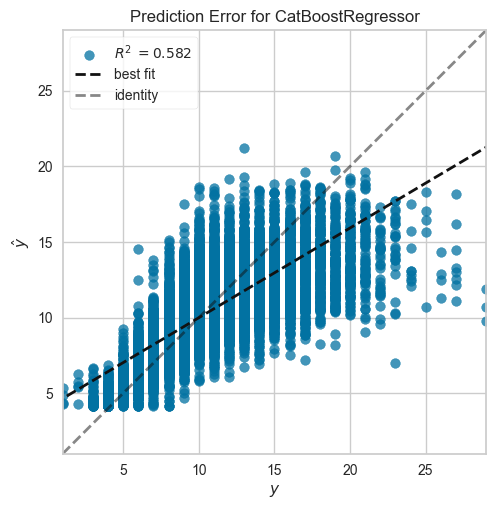

In [54]:
plot_model(best, plot = 'error')

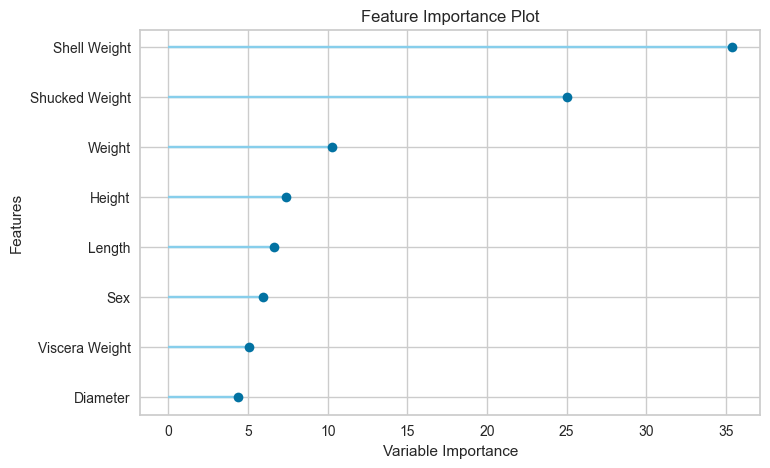

In [73]:
plot_model(best, plot='feature')

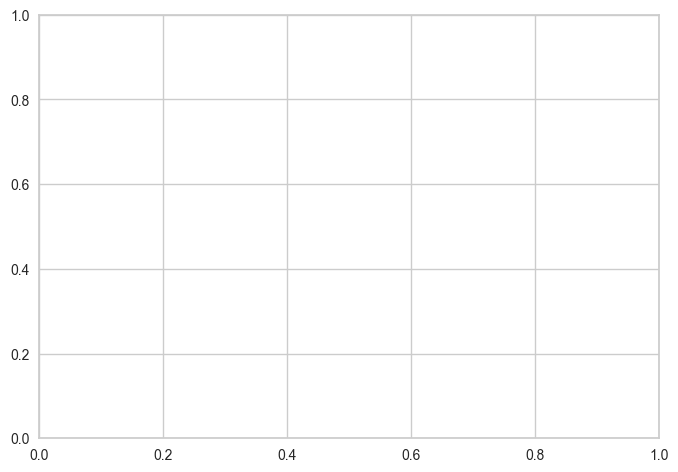

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

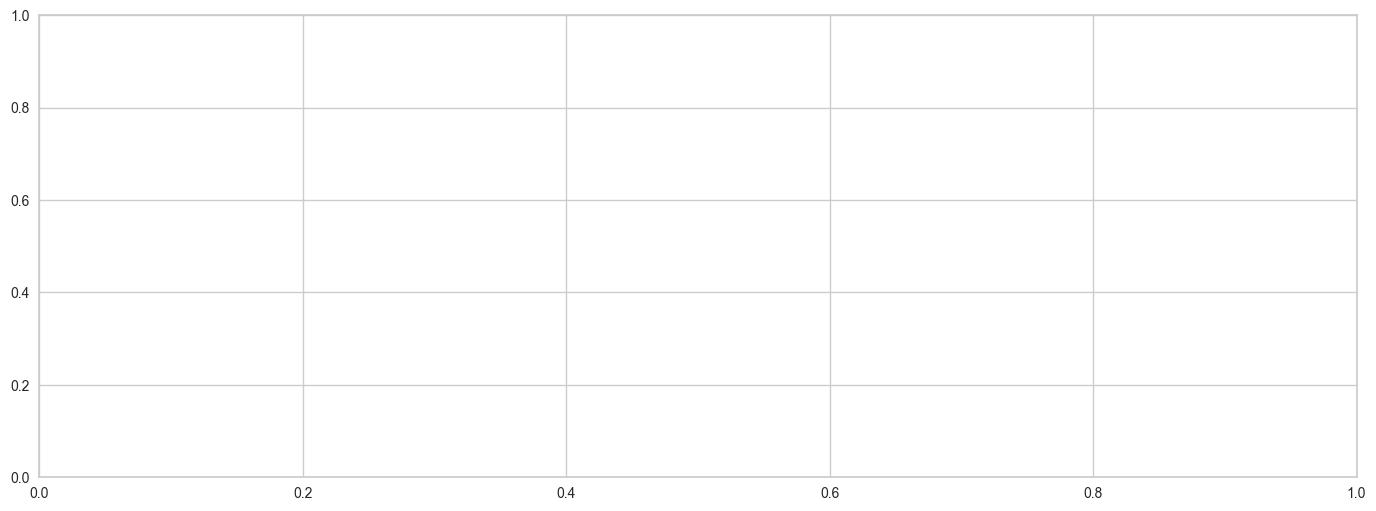

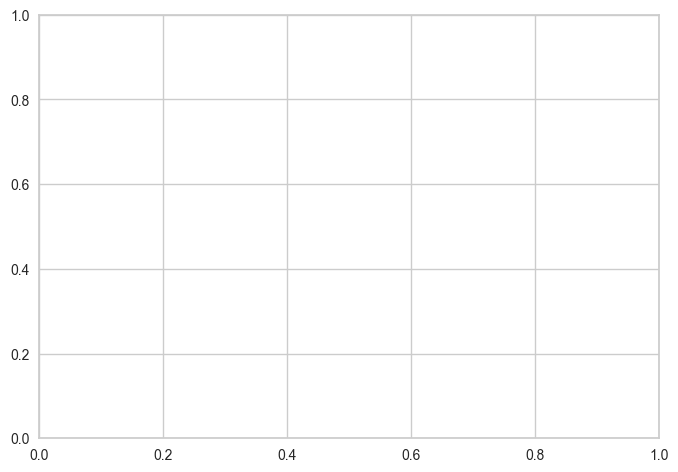

In [74]:
evaluate_model(best)

In [69]:
pred_py = predict_model(best, data=test)
pred_py.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,prediction_label
0,1,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552,7.559498
1,1,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930,7.695946
2,0,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415,10.935233
3,0,1.5500,0.9875,0.3875,28.377850,13.380964,6.548735,7.030676,9.663988
4,1,1.1125,0.8500,0.2625,11.765042,5.528152,2.466407,3.331066,7.514103


In [70]:
#pred_py['prediction_label'] = np.ceil(pred_py['prediction_label']).astype(int)
df_id = pd.DataFrame({'id':df_test['id']})
#df_dpp = pd.DataFrame(yhat_class,columns=['target'])  
df_py = pd.concat([df_id, pred_py['prediction_label']],axis=1)
df_py.rename({'prediction_label':'Age'}, axis=1, inplace=True)
df_py.head()

,id,Age
0,74051,7.559498
1,74052,7.695946
2,74053,10.935233
3,74054,9.663988
4,74055,7.514103


In [62]:
df_py.to_csv('Age_py.csv', index=False)

In [64]:
df_py.to_csv('Age_py_floor.csv', index=False) # to be submitted

In [68]:
df_py.to_csv('Age_py_ceil.csv', index=False) # to be submitted

### Using VotingRegressor

In [79]:
X1 = ss.fit_transform(X)
test_vc = ss.transform(test)

In [75]:
from catboost import CatBoostRegressor

In [77]:
GBR = GradientBoostingRegressor(learning_rate=0.02, max_depth=6, n_estimators=400, subsample=0.5)
XGB = XGBRegressor(learning_rate = 0.01, max_depth = 8, n_estimators = 400, subsample = 0.4)
CAT = CatBoostRegressor(learning_rate = 0.0764, max_depth = 6, iterations = 1000, subsample = 0.8)
LG = LGBMRegressor(learning_rate = 0.1, n_estimators = 100, num_leaves = 30)

In [78]:
classifiers = [('GradientBoost', GBR),('XGBoost',XGB),('CatBoost',CAT),('LIGHTGBM',LG)]

In [80]:
vc = VotingRegressor(estimators=classifiers)
vc.fit(X1,y)
y_predvc1 = vc.predict(test_vc)

0:	learn: 3.0648788	total: 24.1ms	remaining: 24.1s
1:	learn: 2.9673586	total: 46.5ms	remaining: 23.2s
2:	learn: 2.8821970	total: 67.2ms	remaining: 22.3s
3:	learn: 2.8047759	total: 88.4ms	remaining: 22s
4:	learn: 2.7343370	total: 110ms	remaining: 21.9s
5:	learn: 2.6737407	total: 131ms	remaining: 21.6s
6:	learn: 2.6175475	total: 152ms	remaining: 21.5s
7:	learn: 2.5691009	total: 172ms	remaining: 21.3s
8:	learn: 2.5229796	total: 193ms	remaining: 21.2s
9:	learn: 2.4829134	total: 214ms	remaining: 21.2s
10:	learn: 2.4470617	total: 237ms	remaining: 21.3s
11:	learn: 2.4171956	total: 252ms	remaining: 20.7s
12:	learn: 2.3883809	total: 269ms	remaining: 20.4s
13:	learn: 2.3620218	total: 285ms	remaining: 20.1s
14:	learn: 2.3376567	total: 306ms	remaining: 20.1s
15:	learn: 2.3181310	total: 326ms	remaining: 20.1s
16:	learn: 2.3006896	total: 346ms	remaining: 20s
17:	learn: 2.2834170	total: 367ms	remaining: 20s
18:	learn: 2.2677406	total: 388ms	remaining: 20s
19:	learn: 2.2547191	total: 409ms	remaining: 

165:	learn: 2.0345575	total: 3.24s	remaining: 16.3s
166:	learn: 2.0341149	total: 3.26s	remaining: 16.3s
167:	learn: 2.0336872	total: 3.27s	remaining: 16.2s
168:	learn: 2.0333871	total: 3.3s	remaining: 16.2s
169:	learn: 2.0330571	total: 3.31s	remaining: 16.2s
170:	learn: 2.0330306	total: 3.33s	remaining: 16.2s
171:	learn: 2.0325067	total: 3.35s	remaining: 16.1s
172:	learn: 2.0321455	total: 3.37s	remaining: 16.1s
173:	learn: 2.0317029	total: 3.4s	remaining: 16.1s
174:	learn: 2.0315541	total: 3.41s	remaining: 16.1s
175:	learn: 2.0311006	total: 3.43s	remaining: 16.1s
176:	learn: 2.0307438	total: 3.46s	remaining: 16.1s
177:	learn: 2.0304749	total: 3.47s	remaining: 16s
178:	learn: 2.0303821	total: 3.49s	remaining: 16s
179:	learn: 2.0300810	total: 3.51s	remaining: 16s
180:	learn: 2.0297096	total: 3.53s	remaining: 16s
181:	learn: 2.0293224	total: 3.55s	remaining: 16s
182:	learn: 2.0290131	total: 3.57s	remaining: 15.9s
183:	learn: 2.0285111	total: 3.59s	remaining: 15.9s
184:	learn: 2.0281004	to

329:	learn: 1.9947667	total: 6.46s	remaining: 13.1s
330:	learn: 1.9945023	total: 6.47s	remaining: 13.1s
331:	learn: 1.9943575	total: 6.49s	remaining: 13.1s
332:	learn: 1.9941349	total: 6.51s	remaining: 13s
333:	learn: 1.9940104	total: 6.53s	remaining: 13s
334:	learn: 1.9938233	total: 6.55s	remaining: 13s
335:	learn: 1.9936522	total: 6.57s	remaining: 13s
336:	learn: 1.9935678	total: 6.59s	remaining: 13s
337:	learn: 1.9932922	total: 6.61s	remaining: 13s
338:	learn: 1.9931733	total: 6.63s	remaining: 12.9s
339:	learn: 1.9929633	total: 6.66s	remaining: 12.9s
340:	learn: 1.9927629	total: 6.68s	remaining: 12.9s
341:	learn: 1.9927198	total: 6.69s	remaining: 12.9s
342:	learn: 1.9925295	total: 6.71s	remaining: 12.9s
343:	learn: 1.9923087	total: 6.73s	remaining: 12.8s
344:	learn: 1.9921998	total: 6.75s	remaining: 12.8s
345:	learn: 1.9919128	total: 6.77s	remaining: 12.8s
346:	learn: 1.9917054	total: 6.79s	remaining: 12.8s
347:	learn: 1.9915063	total: 6.81s	remaining: 12.8s
348:	learn: 1.9912136	to

495:	learn: 1.9670900	total: 9.72s	remaining: 9.88s
496:	learn: 1.9670147	total: 9.74s	remaining: 9.86s
497:	learn: 1.9668217	total: 9.75s	remaining: 9.83s
498:	learn: 1.9666426	total: 9.77s	remaining: 9.8s
499:	learn: 1.9665883	total: 9.78s	remaining: 9.78s
500:	learn: 1.9664802	total: 9.8s	remaining: 9.76s
501:	learn: 1.9663614	total: 9.82s	remaining: 9.74s
502:	learn: 1.9661816	total: 9.84s	remaining: 9.73s
503:	learn: 1.9659282	total: 9.87s	remaining: 9.71s
504:	learn: 1.9658498	total: 9.88s	remaining: 9.69s
505:	learn: 1.9656601	total: 9.9s	remaining: 9.67s
506:	learn: 1.9655869	total: 9.92s	remaining: 9.65s
507:	learn: 1.9654462	total: 9.94s	remaining: 9.63s
508:	learn: 1.9653093	total: 9.96s	remaining: 9.61s
509:	learn: 1.9651970	total: 9.98s	remaining: 9.59s
510:	learn: 1.9649900	total: 10s	remaining: 9.57s
511:	learn: 1.9649205	total: 10s	remaining: 9.55s
512:	learn: 1.9648259	total: 10s	remaining: 9.53s
513:	learn: 1.9645848	total: 10.1s	remaining: 9.51s
514:	learn: 1.9644357

660:	learn: 1.9445878	total: 12.9s	remaining: 6.64s
661:	learn: 1.9443542	total: 13s	remaining: 6.62s
662:	learn: 1.9442908	total: 13s	remaining: 6.59s
663:	learn: 1.9441579	total: 13s	remaining: 6.58s
664:	learn: 1.9441066	total: 13s	remaining: 6.55s
665:	learn: 1.9438694	total: 13s	remaining: 6.54s
666:	learn: 1.9437317	total: 13.1s	remaining: 6.52s
667:	learn: 1.9435570	total: 13.1s	remaining: 6.5s
668:	learn: 1.9434722	total: 13.1s	remaining: 6.48s
669:	learn: 1.9434272	total: 13.1s	remaining: 6.46s
670:	learn: 1.9433237	total: 13.1s	remaining: 6.44s
671:	learn: 1.9431083	total: 13.2s	remaining: 6.42s
672:	learn: 1.9429678	total: 13.2s	remaining: 6.4s
673:	learn: 1.9428540	total: 13.2s	remaining: 6.39s
674:	learn: 1.9426901	total: 13.2s	remaining: 6.37s
675:	learn: 1.9425301	total: 13.2s	remaining: 6.35s
676:	learn: 1.9424191	total: 13.3s	remaining: 6.33s
677:	learn: 1.9422462	total: 13.3s	remaining: 6.31s
678:	learn: 1.9422184	total: 13.3s	remaining: 6.29s
679:	learn: 1.9421487	to

822:	learn: 1.9246606	total: 16.1s	remaining: 3.47s
823:	learn: 1.9245948	total: 16.1s	remaining: 3.45s
824:	learn: 1.9245206	total: 16.2s	remaining: 3.43s
825:	learn: 1.9243804	total: 16.2s	remaining: 3.4s
826:	learn: 1.9243002	total: 16.2s	remaining: 3.38s
827:	learn: 1.9242598	total: 16.2s	remaining: 3.37s
828:	learn: 1.9241398	total: 16.2s	remaining: 3.35s
829:	learn: 1.9240767	total: 16.3s	remaining: 3.33s
830:	learn: 1.9239244	total: 16.3s	remaining: 3.31s
831:	learn: 1.9237682	total: 16.3s	remaining: 3.29s
832:	learn: 1.9236160	total: 16.3s	remaining: 3.27s
833:	learn: 1.9235482	total: 16.3s	remaining: 3.25s
834:	learn: 1.9234409	total: 16.4s	remaining: 3.23s
835:	learn: 1.9233542	total: 16.4s	remaining: 3.21s
836:	learn: 1.9232280	total: 16.4s	remaining: 3.19s
837:	learn: 1.9232051	total: 16.4s	remaining: 3.17s
838:	learn: 1.9230570	total: 16.4s	remaining: 3.15s
839:	learn: 1.9229945	total: 16.5s	remaining: 3.13s
840:	learn: 1.9228081	total: 16.5s	remaining: 3.12s
841:	learn: 1

986:	learn: 1.9074085	total: 19.3s	remaining: 254ms
987:	learn: 1.9072995	total: 19.3s	remaining: 235ms
988:	learn: 1.9072444	total: 19.3s	remaining: 215ms
989:	learn: 1.9070749	total: 19.4s	remaining: 196ms
990:	learn: 1.9070115	total: 19.4s	remaining: 176ms
991:	learn: 1.9068739	total: 19.4s	remaining: 157ms
992:	learn: 1.9068304	total: 19.4s	remaining: 137ms
993:	learn: 1.9066881	total: 19.4s	remaining: 117ms
994:	learn: 1.9065834	total: 19.5s	remaining: 97.8ms
995:	learn: 1.9065102	total: 19.5s	remaining: 78.3ms
996:	learn: 1.9064076	total: 19.5s	remaining: 58.7ms
997:	learn: 1.9063588	total: 19.5s	remaining: 39.1ms
998:	learn: 1.9063289	total: 19.5s	remaining: 19.6ms
999:	learn: 1.9062277	total: 19.6s	remaining: 0us


In [89]:
l_id = pd.DataFrame({'id':df_test['id']})
l_predvc = pd.DataFrame(y_predvc1,columns=['Age'])
l_vc = pd.concat([l_id,l_predvc],axis=1)
#l_vc['Age'] = np.floor(l_vc['Age']).astype(int)
l_vc.head()

,id,Age
0,74051,7.542053
1,74052,7.738168
2,74053,10.798650
3,74054,9.537602
4,74055,7.497031


In [84]:
l_vc.to_csv('Age_vc.csv',index=False) 

In [86]:
l_vc.to_csv('Age_vc_ceil.csv',index=False) # to be submitted

In [88]:
l_vc.to_csv('Age_vc_floor.csv',index=False) # to be submitted

### Lets try PCA

In [90]:
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

In [91]:
X.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395


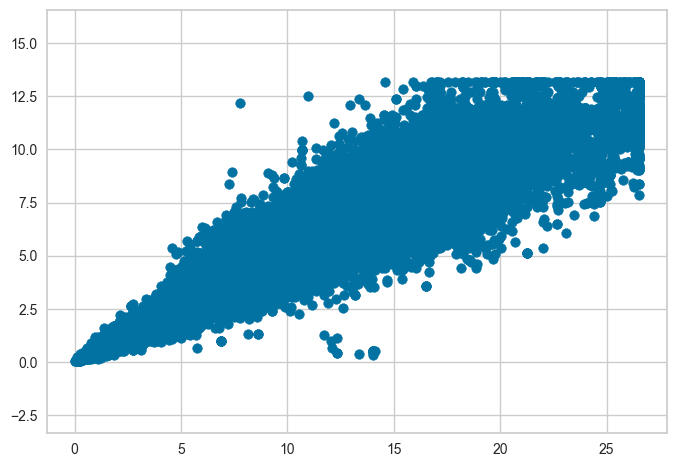

correlation between feat1 and feat2 is: 0.9442048464853239
the pvalue between feat1 and feat2 is: 0.0


In [92]:
# Assign the 0th column 
feat1 = X.iloc[:,5]

# Assign the 1st column 
feat2 = X.iloc[:,6]

# Scatter plot width vs length
plt.scatter(feat1, feat2)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(feat1, feat2)

# Display the correlation
print(f'correlation between feat1 and feat2 is: {correlation}')
print(f'the pvalue between feat1 and feat2 is: {pvalue}')

### The features are highly correlated with each other

### Lets do PCA on the features

In [93]:
df4 = ss.fit_transform(X)

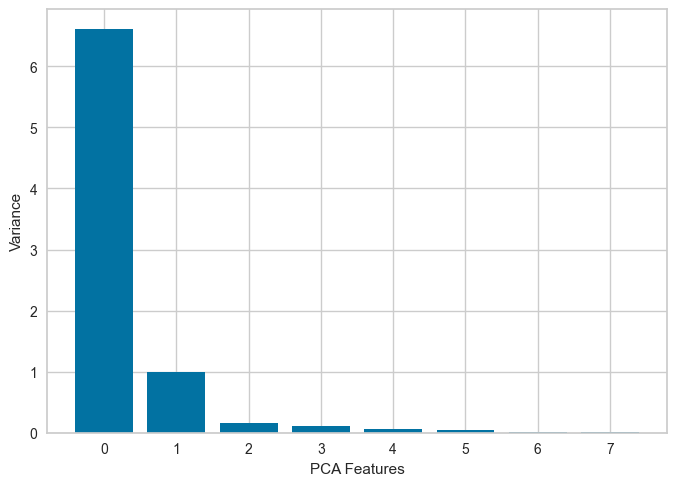

In [94]:
# Create a PCA object
pca = PCA()
pca.fit(df4)
X_p = pca.transform(df4)
features = range(pca.n_components_)

# Plotting the features vs Explained Variance
plt.bar(features,pca.explained_variance_)
plt.xticks(features)
plt.ylabel('Variance')
plt.xlabel('PCA Features')
plt.show()

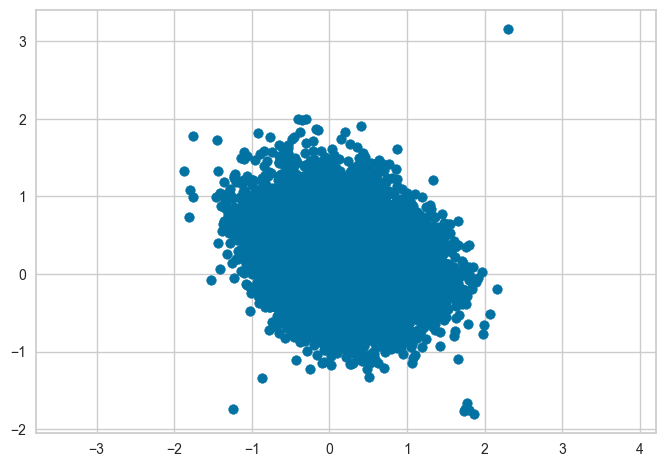

correlation between feat1 and feat2 is: 2.445960101127298e-16
the pvalue between feat1 and feat2 is: 0.9999999999999577


In [96]:
model = PCA(n_components=4)
model.fit(df4)
X_pca = model.transform(df4)
# Assign 0th column of pca_features: xs
xs = X_pca[:,2]

# Assign 1st column of pca_features: ys
ys = X_pca[:,3]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(f'correlation between feat1 and feat2 is: {correlation}')
print(f'the pvalue between feat1 and feat2 is: {pvalue}')

In [103]:
vc = VotingRegressor(estimators=classifiers)
vc.fit(X_pca,y)

0:	learn: 3.0638087	total: 21ms	remaining: 20.9s
1:	learn: 2.9641439	total: 44.6ms	remaining: 22.3s
2:	learn: 2.8730047	total: 66.8ms	remaining: 22.2s
3:	learn: 2.7933212	total: 87.7ms	remaining: 21.8s
4:	learn: 2.7234231	total: 107ms	remaining: 21.4s
5:	learn: 2.6606245	total: 125ms	remaining: 20.8s
6:	learn: 2.6057954	total: 144ms	remaining: 20.4s
7:	learn: 2.5565602	total: 161ms	remaining: 20s
8:	learn: 2.5139334	total: 180ms	remaining: 19.8s
9:	learn: 2.4748241	total: 198ms	remaining: 19.6s
10:	learn: 2.4411306	total: 217ms	remaining: 19.5s
11:	learn: 2.4111930	total: 240ms	remaining: 19.8s
12:	learn: 2.3856008	total: 259ms	remaining: 19.7s
13:	learn: 2.3630747	total: 277ms	remaining: 19.5s
14:	learn: 2.3426412	total: 296ms	remaining: 19.5s
15:	learn: 2.3254220	total: 315ms	remaining: 19.4s
16:	learn: 2.3091333	total: 334ms	remaining: 19.3s
17:	learn: 2.2960264	total: 352ms	remaining: 19.2s
18:	learn: 2.2837546	total: 370ms	remaining: 19.1s
19:	learn: 2.2729962	total: 388ms	remaini

171:	learn: 2.1506692	total: 3.17s	remaining: 15.3s
172:	learn: 2.1504461	total: 3.19s	remaining: 15.3s
173:	learn: 2.1502569	total: 3.21s	remaining: 15.2s
174:	learn: 2.1500730	total: 3.23s	remaining: 15.2s
175:	learn: 2.1498266	total: 3.25s	remaining: 15.2s
176:	learn: 2.1495421	total: 3.26s	remaining: 15.2s
177:	learn: 2.1491792	total: 3.28s	remaining: 15.2s
178:	learn: 2.1487405	total: 3.3s	remaining: 15.1s
179:	learn: 2.1484443	total: 3.32s	remaining: 15.1s
180:	learn: 2.1482439	total: 3.33s	remaining: 15.1s
181:	learn: 2.1479473	total: 3.35s	remaining: 15.1s
182:	learn: 2.1476156	total: 3.37s	remaining: 15s
183:	learn: 2.1472489	total: 3.39s	remaining: 15s
184:	learn: 2.1469294	total: 3.41s	remaining: 15s
185:	learn: 2.1467035	total: 3.42s	remaining: 15s
186:	learn: 2.1464329	total: 3.44s	remaining: 15s
187:	learn: 2.1461433	total: 3.46s	remaining: 14.9s
188:	learn: 2.1459973	total: 3.48s	remaining: 14.9s
189:	learn: 2.1456804	total: 3.5s	remaining: 14.9s
190:	learn: 2.1453473	to

331:	learn: 2.1154118	total: 6.04s	remaining: 12.2s
332:	learn: 2.1152338	total: 6.06s	remaining: 12.1s
333:	learn: 2.1150589	total: 6.08s	remaining: 12.1s
334:	learn: 2.1148366	total: 6.1s	remaining: 12.1s
335:	learn: 2.1147284	total: 6.12s	remaining: 12.1s
336:	learn: 2.1145024	total: 6.14s	remaining: 12.1s
337:	learn: 2.1142632	total: 6.15s	remaining: 12.1s
338:	learn: 2.1141244	total: 6.17s	remaining: 12s
339:	learn: 2.1139430	total: 6.19s	remaining: 12s
340:	learn: 2.1137109	total: 6.21s	remaining: 12s
341:	learn: 2.1135966	total: 6.22s	remaining: 12s
342:	learn: 2.1133927	total: 6.24s	remaining: 12s
343:	learn: 2.1132553	total: 6.26s	remaining: 11.9s
344:	learn: 2.1130600	total: 6.28s	remaining: 11.9s
345:	learn: 2.1128307	total: 6.3s	remaining: 11.9s
346:	learn: 2.1127310	total: 6.32s	remaining: 11.9s
347:	learn: 2.1125938	total: 6.33s	remaining: 11.9s
348:	learn: 2.1123960	total: 6.35s	remaining: 11.8s
349:	learn: 2.1122787	total: 6.37s	remaining: 11.8s
350:	learn: 2.1121572	to

494:	learn: 2.0899678	total: 8.99s	remaining: 9.18s
495:	learn: 2.0898459	total: 9.01s	remaining: 9.16s
496:	learn: 2.0897057	total: 9.03s	remaining: 9.14s
497:	learn: 2.0895870	total: 9.05s	remaining: 9.12s
498:	learn: 2.0894371	total: 9.07s	remaining: 9.1s
499:	learn: 2.0892576	total: 9.09s	remaining: 9.09s
500:	learn: 2.0890706	total: 9.11s	remaining: 9.07s
501:	learn: 2.0888584	total: 9.12s	remaining: 9.05s
502:	learn: 2.0887522	total: 9.14s	remaining: 9.03s
503:	learn: 2.0886314	total: 9.16s	remaining: 9.01s
504:	learn: 2.0884725	total: 9.18s	remaining: 8.99s
505:	learn: 2.0883142	total: 9.19s	remaining: 8.98s
506:	learn: 2.0881079	total: 9.21s	remaining: 8.96s
507:	learn: 2.0880021	total: 9.23s	remaining: 8.94s
508:	learn: 2.0879102	total: 9.25s	remaining: 8.92s
509:	learn: 2.0878090	total: 9.27s	remaining: 8.9s
510:	learn: 2.0876585	total: 9.28s	remaining: 8.88s
511:	learn: 2.0875260	total: 9.3s	remaining: 8.87s
512:	learn: 2.0873620	total: 9.32s	remaining: 8.85s
513:	learn: 2.0

656:	learn: 2.0697529	total: 11.9s	remaining: 6.22s
657:	learn: 2.0696654	total: 11.9s	remaining: 6.2s
658:	learn: 2.0695512	total: 12s	remaining: 6.18s
659:	learn: 2.0694426	total: 12s	remaining: 6.17s
660:	learn: 2.0693434	total: 12s	remaining: 6.15s
661:	learn: 2.0692870	total: 12s	remaining: 6.13s
662:	learn: 2.0691727	total: 12s	remaining: 6.11s
663:	learn: 2.0690506	total: 12s	remaining: 6.09s
664:	learn: 2.0688509	total: 12.1s	remaining: 6.08s
665:	learn: 2.0687743	total: 12.1s	remaining: 6.06s
666:	learn: 2.0686278	total: 12.1s	remaining: 6.04s
667:	learn: 2.0685478	total: 12.1s	remaining: 6.02s
668:	learn: 2.0684086	total: 12.1s	remaining: 6s
669:	learn: 2.0683068	total: 12.2s	remaining: 5.98s
670:	learn: 2.0681789	total: 12.2s	remaining: 5.96s
671:	learn: 2.0680748	total: 12.2s	remaining: 5.95s
672:	learn: 2.0679544	total: 12.2s	remaining: 5.93s
673:	learn: 2.0678086	total: 12.2s	remaining: 5.91s
674:	learn: 2.0676569	total: 12.2s	remaining: 5.89s
675:	learn: 2.0675421	total:

820:	learn: 2.0518760	total: 14.9s	remaining: 3.24s
821:	learn: 2.0517567	total: 14.9s	remaining: 3.23s
822:	learn: 2.0516357	total: 14.9s	remaining: 3.21s
823:	learn: 2.0515846	total: 14.9s	remaining: 3.19s
824:	learn: 2.0515044	total: 14.9s	remaining: 3.17s
825:	learn: 2.0513570	total: 15s	remaining: 3.15s
826:	learn: 2.0512521	total: 15s	remaining: 3.13s
827:	learn: 2.0511211	total: 15s	remaining: 3.12s
828:	learn: 2.0509992	total: 15s	remaining: 3.1s
829:	learn: 2.0508766	total: 15s	remaining: 3.08s
830:	learn: 2.0507407	total: 15.1s	remaining: 3.06s
831:	learn: 2.0506555	total: 15.1s	remaining: 3.04s
832:	learn: 2.0505655	total: 15.1s	remaining: 3.03s
833:	learn: 2.0505256	total: 15.1s	remaining: 3.01s
834:	learn: 2.0504628	total: 15.1s	remaining: 2.99s
835:	learn: 2.0503835	total: 15.1s	remaining: 2.97s
836:	learn: 2.0502815	total: 15.2s	remaining: 2.95s
837:	learn: 2.0501861	total: 15.2s	remaining: 2.94s
838:	learn: 2.0500529	total: 15.2s	remaining: 2.92s
839:	learn: 2.0499321	t

981:	learn: 2.0360583	total: 17.8s	remaining: 326ms
982:	learn: 2.0359291	total: 17.8s	remaining: 308ms
983:	learn: 2.0358110	total: 17.8s	remaining: 290ms
984:	learn: 2.0357077	total: 17.9s	remaining: 272ms
985:	learn: 2.0356068	total: 17.9s	remaining: 254ms
986:	learn: 2.0354848	total: 17.9s	remaining: 236ms
987:	learn: 2.0354366	total: 17.9s	remaining: 217ms
988:	learn: 2.0353933	total: 17.9s	remaining: 199ms
989:	learn: 2.0352886	total: 17.9s	remaining: 181ms
990:	learn: 2.0352042	total: 18s	remaining: 163ms
991:	learn: 2.0351209	total: 18s	remaining: 145ms
992:	learn: 2.0349719	total: 18s	remaining: 127ms
993:	learn: 2.0348823	total: 18s	remaining: 109ms
994:	learn: 2.0347375	total: 18s	remaining: 90.6ms
995:	learn: 2.0346008	total: 18s	remaining: 72.5ms
996:	learn: 2.0345181	total: 18.1s	remaining: 54.4ms
997:	learn: 2.0343792	total: 18.1s	remaining: 36.2ms
998:	learn: 2.0343145	total: 18.1s	remaining: 18.1ms
999:	learn: 2.0342460	total: 18.1s	remaining: 0us


VotingRegressor(estimators=[('GradientBoost',
                             GradientBoostingRegressor(learning_rate=0.02,
                                                       max_depth=6,
                                                       n_estimators=400,
                                                       subsample=0.5)),
                            ('XGBoost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_typ...
                                          max_cat_threshold=None,
                    

In [105]:
test_vc1 = model.transform(test_vc)
y_predvc2 = vc.predict(test_vc1)

In [114]:
l_id = pd.DataFrame({'id':df_test['id']})
l_predvc = pd.DataFrame(y_predvc2,columns=['Age'])
l_vc1 = pd.concat([l_id,l_predvc],axis=1)
#l_vc1['Age'] = np.ceil(l_vc1['Age']).astype(int)
l_vc1.head()

,id,Age
0,74051,7.579226
1,74052,7.735159
2,74053,10.484944
3,74054,10.028018
4,74055,7.600091


In [107]:
l_vc1.to_csv('Age_pca.csv',index=False) #to be submitted

In [110]:
l_vc1.to_csv('Age_pca_floor.csv',index=False) #to be submitted

In [113]:
l_vc1.to_csv('Age_pca_ceil.csv',index=False) #to be submitted